# Import Imp Libraries

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#read the csv file
df=pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
#view the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# 1. Filter high-value customers

In [6]:
# Calculate the average recharge amount for June and July
df['avg_rech_amt_good_phase']=(df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

# Determine the 70th percentile of the average recharge amount
percentile_70=df['avg_rech_amt_good_phase'].quantile(0.7)

#Filter high-value customers (top 30%)
high_value_customers=df[df['avg_rech_amt_good_phase']>=percentile_70]

# Check the size of high-value customers
print(f"Number of high-value customers: {high_value_customers.shape[0]}")

high_value_customers.head()

Number of high-value customers: 30011


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  fb_user_6  fb_user_7  fb_user_8  \
7             9/30/2014  1069.180  ...        NaN        NaN        NaN   
8             9/30/2014   378.721  ...        NaN        1.0        1.0   
13            9/30/2014   492.846  ...        NaN        NaN        1.0   
16            9/30/2014   430.975  ...        NaN        NaN        NaN   
17            9/30/2014   690.008  ...        NaN        NaN        NaN   

    fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7         NaN   802       57.74       19.38       18.74         0.0   
8         NaN   315       21.03      910.65      122.16         0.0   
13        NaN  2607        0.00        0.00        0.00         0.0   
16        NaN   511        0.00        2.45       21.89         0.0   
17        NaN   667        0.00        0.00        0.00         0.0   

    avg_rech_amt_good_phase  
7                    1185.0  
8                     519.0  
13                    380.0  
16                    459.0  
17                    408.0  

[5 rows x 227 columns]

# 2. Tag customers as churned or not

In [8]:

# Churn condition: Zero calls and zero internet usage in the churn phase (September)
high_value_customers['churn'] = (
    (high_value_customers['total_ic_mou_9'] == 0) &
    (high_value_customers['total_og_mou_9'] == 0) &
    (high_value_customers['vol_2g_mb_9'] == 0) &
    (high_value_customers['vol_3g_mb_9'] == 0)
).astype(int)


# Verify the distribution of churned vs non-churned customers
print(high_value_customers['churn'].value_counts())

churn
0    27418
1     2593
Name: count, dtype: int64


In [9]:

# Drop all columns related to month 9
columns_to_drop=[col for col in high_value_customers.columns if '_9' in col]
high_value_customers=high_value_customers.drop(columns=columns_to_drop, axis=1)

high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      arpu_7  ...  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
7   1349.850  ...        NaN        NaN        NaN   802       57.74   
8    492.223  ...        NaN        1.0        1.0   315       21.03   
13   205.671  ...        NaN        NaN        1.0  2607        0.00   
16   299.869  ...        NaN        NaN        NaN   511        0.00   
17    18.980  ...        NaN        NaN        NaN   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rech_amt_good_phase  churn  
7        19.38       18.74         0.0                   1185.0      1  
8       910.65      122.16         0.0                    519.0      0  
13        0.00        0.00         0.0                    380.0      0  
16        2.45       21.89         0.0                    459.0      0  
17        0.00        0.00         0.0                    408.0      0  

[5 rows x 174 columns]

# 3. Data cleaning

In [11]:

#Check for duplicate values
high_value_customers.duplicated().sum()

0

In [12]:
#Count the churn
high_value_customers.churn.value_counts()

churn
0    27418
1     2593
Name: count, dtype: int64

In [13]:
# Calculate the percentage of null values
null_percentage = high_value_customers.isnull().mean() * 100


# Set pandas option to display all columns
pd.set_option('display.max_rows', None)
# Sort columns by null percentage in descending order
print(null_percentage[null_percentage > 0].sort_values(ascending=False))


max_rech_data_6             62.023925
date_of_last_rech_data_6    62.023925
count_rech_3g_6             62.023925
av_rech_amt_data_6          62.023925
arpu_3g_6                   62.023925
count_rech_2g_6             62.023925
arpu_2g_6                   62.023925
night_pck_user_6            62.023925
fb_user_6                   62.023925
total_rech_data_6           62.023925
arpu_2g_7                   61.140915
count_rech_3g_7             61.140915
night_pck_user_7            61.140915
date_of_last_rech_data_7    61.140915
arpu_3g_7                   61.140915
max_rech_data_7             61.140915
total_rech_data_7           61.140915
count_rech_2g_7             61.140915
av_rech_amt_data_7          61.140915
fb_user_7                   61.140915
total_rech_data_8           60.834361
max_rech_data_8             60.834361
count_rech_2g_8             60.834361
fb_user_8                   60.834361
count_rech_3g_8             60.834361
date_of_last_rech_data_8    60.834361
arpu_3g_8   

In [14]:
# Set the cutoff value for the percentage of missing values
cutoff = 30

# Create a list of column names where the percentage of missing values is greater than the cutoff
cols = list(high_value_customers.columns[high_value_customers.isnull().mean() * 100 > cutoff])

# Display the list of columns
print(cols)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [15]:
# Create a copy
high_value_customers_old=high_value_customers.copy()

In [16]:
# Drop the columns specified in the 'cols' list from the DataFrame 'high_value_customers'
high_value_customers = high_value_customers.drop(cols, axis=1)

high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7   1349.850  ...            0            0            0   802       57.74   
8    492.223  ...            0            0            0   315       21.03   
13   205.671  ...            0            0            0  2607        0.00   
16   299.869  ...            0            0            0   511        0.00   
17    18.980  ...            0            0            0   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rech_amt_good_phase  churn  
7        19.38       18.74         0.0                   1185.0      1  
8       910.65      122.16         0.0                    519.0      0  
13        0.00        0.00         0.0                    380.0      0  
16        2.45       21.89         0.0                    459.0      0  
17        0.00        0.00         0.0                    408.0      0  

[5 rows x 144 columns]

In [17]:
high_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Columns: 144 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(27), object(6)
memory usage: 33.1+ MB


In [18]:
# # Remove rows with any null values
# high_value_customers.dropna(inplace=True)

# # Display updated DataFrame info
# print(high_value_customers.info())

import numpy as np

# Handle missing values in numerical columns
numerical_columns = high_value_customers.select_dtypes(include=[np.number]).columns
high_value_customers[numerical_columns] = high_value_customers[numerical_columns].fillna(
    high_value_customers[numerical_columns].median()
)

# Handle missing values in object columns
object_columns = high_value_customers.select_dtypes(include=['object']).columns
for col in object_columns:
    high_value_customers[col] = high_value_customers[col].fillna(
        high_value_customers[col].mode()[0]
    )

# Display updated DataFrame info
print(high_value_customers.info())


<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Columns: 144 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(27), object(6)
memory usage: 33.1+ MB
None


In [19]:
high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7   1349.850  ...            0            0            0   802       57.74   
8    492.223  ...            0            0            0   315       21.03   
13   205.671  ...            0            0            0  2607        0.00   
16   299.869  ...            0            0            0   511        0.00   
17    18.980  ...            0            0            0   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rech_amt_good_phase  churn  
7        19.38       18.74         0.0                   1185.0      1  
8       910.65      122.16         0.0                    519.0      0  
13        0.00        0.00         0.0                    380.0      0  
16        2.45       21.89         0.0                    459.0      0  
17        0.00        0.00         0.0                    408.0      0  

[5 rows x 144 columns]

In [20]:
# display the basic statistical analysis
high_value_customers.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.001100e+04    30011.0         30011.0         30011.0   
mean    7.001223e+09      109.0             0.0             0.0   
std     6.846405e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001232e+09      109.0             0.0             0.0   
75%     7.001814e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         30011.0  30011.000000  30011.000000  30011.000000  30011.000000   
mean              0.0    587.284404    589.135427    534.857433    297.385708   
std               0.0    442.722413    462.897814    492.259586    460.093114   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    364.161000    365.004500    289.609500     43.510000   
50%               0.0    495.682000    493.561000    452.091000    128.330000   
75%               0.0    703.922000    700.788000    671.150000    353.310000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  30011.000000  ...  30011.000000  30011.000000  30011.000000   
mean     305.635027  ...      0.137916      0.150212      0.140415   
std      481.133789  ...      0.875528      0.969286      0.974727   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%       43.260000  ...      0.000000      0.000000      0.000000   
50%      127.950000  ...      0.000000      0.000000      0.000000   
75%      359.925000  ...      0.000000      0.000000      0.000000   
max     8157.780000  ...     29.000000     35.000000     41.000000   

                aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean    1264.064776    129.439626    135.127102    121.360548      6.562685   
std      975.263117    390.478591    408.024394    389.726031     48.638658   
min      180.000000      0.000000      0.000000      0.000000      0.000000   
25%      480.000000      0.000000      0.000000      0.000000      0.000000   
50%      914.000000      0.000000      0.000000      0.000000      0.000000   
75%     1924.000000      1.600000      1.990000      0.000000      0.000000   
max     4321.000000  12916.220000   9165.600000  11166.210000   2618.570000   

       avg_rech_amt_good_phase         churn  
count             30011.000000  30011.000000  
mean                696.664356      0.086402  
std                 488.782088      0.280961  
min                 368.500000      0.000000  
25%                 450.000000      0.000000  
50%                 568.500000      0.000000  
75%                 795.500000      0.000000  
max               37762.500000      1.000000  

[8 rows x 138 columns]

In [21]:
#value count for churn
high_value_customers.churn.value_counts()

churn
0    27418
1     2593
Name: count, dtype: int64

In [22]:

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Convert columns to a list and print them
print(list(high_value_customers.columns))


['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mo

In [23]:

# Drop identifiers, date fields, and other irrelevant columns
columns_to_drop = [
    'mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
    'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
    'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g'
]

high_value_customers = high_value_customers.drop(columns=columns_to_drop, axis=1)
high_value_customers.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

# 4. Derive new features

In [25]:
# Merging data usage for each month
high_value_customers['vol_2g@3g_mb_6'] = high_value_customers['vol_2g_mb_6'] + high_value_customers['vol_3g_mb_6']
high_value_customers['vol_2g@3g_mb_7'] = high_value_customers['vol_2g_mb_7'] + high_value_customers['vol_3g_mb_7']
high_value_customers['vol_2g@3g_mb_8'] = high_value_customers['vol_2g_mb_8'] + high_value_customers['vol_3g_mb_8']

# Dropping old 2G and 3G columns
high_value_customers.drop(columns=[
    'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
    'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'
], inplace=True)


In [26]:
high_value_customers.reset_index(drop=True, inplace=True)

high_value_customers.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  1069.180  1349.850  3171.480        57.84        54.68        52.29   
1   378.721   492.223   137.362       413.69       351.03        35.08   
2   492.846   205.671   593.260       501.76       108.39       534.24   
3   430.975   299.869   187.894        50.51        74.01        70.61   
4   690.008    18.980    25.499      1185.91         9.28         7.79   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        453.43        567.16        325.91          16.23          33.49   
1         94.66         80.63        136.48           0.00           0.00   
2        413.31        119.28        482.46          23.53         144.24   
3        296.29        229.74        162.76           0.00           2.83   
4         61.64          0.00          5.54           0.00           4.76   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          31.64          23.74          12.59          38.06   
1           0.00           0.00           0.00           0.00   
2          72.11           7.98          35.26           1.44   
3           0.00           0.00          17.74           0.00   
4           4.81           0.00           8.46          13.34   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             51.39             31.38             40.28            308.63   
1            297.13            217.59             12.49             80.96   
2             49.63              6.19             36.01            151.13   
3             42.61             65.16             67.38            273.29   
4             38.99              0.00              0.00             58.54   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            447.38            162.28             62.13             55.14   
1             70.58             50.54              0.00              0.00   
2             47.28            294.46              4.54              0.00   
3            145.99            128.28              0.00              4.48   
4              0.00              0.00              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             53.23               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2             23.51               0.0               0.0              0.49   
3             10.26               0.0               0.0              0.00   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        422.16        533.91        255.79              4.30   
1        378.09        288.18         63.04            116.56   
2        205.31         53.48        353.99            446.41   
3        315.91        215.64        205.93              7.89   
4         97.54          0.00          0.00           1146.91   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             23.29             12.01             49.89             31.76   
1            133.43             22.58             13.69             10.04   
2             85.98            498.23            255.36             52.94   
3              2.58              3.23             22.99             64.51   
4              0.81              0.00              1.55              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             49.14              6.66             20.08             16.68   
1             75.69              0.00              0.00              0.00   
2            156.94              0.00              0.00              0.00   
3             18.29              0.00              0.00              0.00   
4              0.00              0.00              0.00              0.00   



In [27]:
#Correlation Check:
correlation = high_value_customers.corr()
print(correlation['churn'][['monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6','sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8','monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
                           'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']])


monthly_2g_6   -0.053122
sachet_2g_6    -0.011478
monthly_3g_6   -0.021051
sachet_2g_6    -0.011478
sachet_2g_7    -0.026496
sachet_2g_8    -0.069545
monthly_3g_6   -0.021051
monthly_3g_7   -0.041300
monthly_3g_8   -0.073471
sachet_3g_6    -0.001574
sachet_3g_7    -0.001896
sachet_3g_8    -0.030309
Name: churn, dtype: float64


In [28]:
# droping this columns becoz most of the values are zero
cols_to_drop = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
                'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
                'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
                'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
high_value_customers.drop(columns=cols_to_drop, inplace=True)

print(high_value_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Columns: 114 entries, arpu_6 to vol_2g@3g_mb_8
dtypes: float64(100), int32(1), int64(13)
memory usage: 26.0 MB
None


In [29]:
high_value_customers.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  1069.180  1349.850  3171.480        57.84        54.68        52.29   
1   378.721   492.223   137.362       413.69       351.03        35.08   
2   492.846   205.671   593.260       501.76       108.39       534.24   
3   430.975   299.869   187.894        50.51        74.01        70.61   
4   690.008    18.980    25.499      1185.91         9.28         7.79   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        453.43        567.16        325.91          16.23          33.49   
1         94.66         80.63        136.48           0.00           0.00   
2        413.31        119.28        482.46          23.53         144.24   
3        296.29        229.74        162.76           0.00           2.83   
4         61.64          0.00          5.54           0.00           4.76   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          31.64          23.74          12.59          38.06   
1           0.00           0.00           0.00           0.00   
2          72.11           7.98          35.26           1.44   
3           0.00           0.00          17.74           0.00   
4           4.81           0.00           8.46          13.34   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             51.39             31.38             40.28            308.63   
1            297.13            217.59             12.49             80.96   
2             49.63              6.19             36.01            151.13   
3             42.61             65.16             67.38            273.29   
4             38.99              0.00              0.00             58.54   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            447.38            162.28             62.13             55.14   
1             70.58             50.54              0.00              0.00   
2             47.28            294.46              4.54              0.00   
3            145.99            128.28              0.00              4.48   
4              0.00              0.00              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             53.23               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2             23.51               0.0               0.0              0.49   
3             10.26               0.0               0.0              0.00   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        422.16        533.91        255.79              4.30   
1        378.09        288.18         63.04            116.56   
2        205.31         53.48        353.99            446.41   
3        315.91        215.64        205.93              7.89   
4         97.54          0.00          0.00           1146.91   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             23.29             12.01             49.89             31.76   
1            133.43             22.58             13.69             10.04   
2             85.98            498.23            255.36             52.94   
3              2.58              3.23             22.99             64.51   
4              0.81              0.00              1.55              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             49.14              6.66             20.08             16.68   
1             75.69              0.00              0.00              0.00   
2            156.94              0.00              0.00              0.00   
3             18.29              0.00              0.00              0.00   
4              0.00              0.00              0.00              0.00   



In [30]:
# Calculate the percentage of zeros in each column
zero_percentage = (high_value_customers == 0).mean() * 100

# Filter columns with more than 85% zeros
columns_with_high_zeros = zero_percentage[zero_percentage > 30]

# Display the result
print("Columns with more than 30% zeros:")
print(columns_with_high_zeros)


Columns with more than 30% zeros:
roam_ic_mou_6        76.618573
roam_ic_mou_7        80.880344
roam_ic_mou_8        80.163940
roam_og_mou_6        76.335344
roam_og_mou_7        80.613775
roam_og_mou_8        80.103962
loc_og_t2f_mou_6     46.336343
loc_og_t2f_mou_7     45.140115
loc_og_t2f_mou_8     45.996468
loc_og_t2c_mou_6     75.665589
loc_og_t2c_mou_7     74.006198
loc_og_t2c_mou_8     74.519343
std_og_t2t_mou_6     34.380727
std_og_t2t_mou_7     34.437373
std_og_t2t_mou_8     37.296325
std_og_t2f_mou_6     83.456066
std_og_t2f_mou_7     83.782613
std_og_t2f_mou_8     84.702276
std_og_t2c_mou_6    100.000000
std_og_t2c_mou_7    100.000000
std_og_t2c_mou_8    100.000000
isd_og_mou_6         91.209890
isd_og_mou_7         91.649728
isd_og_mou_8         93.002566
spl_og_mou_6         46.019793
spl_og_mou_7         41.861318
spl_og_mou_8         42.007930
og_others_6          76.868482
og_others_7          99.453534
og_others_8          99.400220
loc_ic_t2f_mou_6     32.451434
loc_i

In [31]:
# Exclude the target column 'churn' and other specified columns
columns_to_exclude = ['vol_2g@3g_mb_6', 'vol_2g@3g_mb_7', 'vol_2g@3g_mb_8', 'churn']
columns_to_drop = zero_percentage[
    (zero_percentage > 30) & (~zero_percentage.index.isin(columns_to_exclude))
].index

# Drop the columns from the DataFrame
high_value_customers.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(f"Dropped {len(columns_to_drop)} columns with more than 30% zeros.")


Dropped 51 columns with more than 30% zeros.


In [32]:
high_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arpu_6                   30011 non-null  float64
 1   arpu_7                   30011 non-null  float64
 2   arpu_8                   30011 non-null  float64
 3   onnet_mou_6              30011 non-null  float64
 4   onnet_mou_7              30011 non-null  float64
 5   onnet_mou_8              30011 non-null  float64
 6   offnet_mou_6             30011 non-null  float64
 7   offnet_mou_7             30011 non-null  float64
 8   offnet_mou_8             30011 non-null  float64
 9   loc_og_t2t_mou_6         30011 non-null  float64
 10  loc_og_t2t_mou_7         30011 non-null  float64
 11  loc_og_t2t_mou_8         30011 non-null  float64
 12  loc_og_t2m_mou_6         30011 non-null  float64
 13  loc_og_t2m_mou_7         30011 non-null  float64
 14  loc_og_t2m_mou_8      

# EDA

In [34]:
import pandas as pd

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Convert columns to a list and print them
print(list(high_value_customers.columns))


['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7'

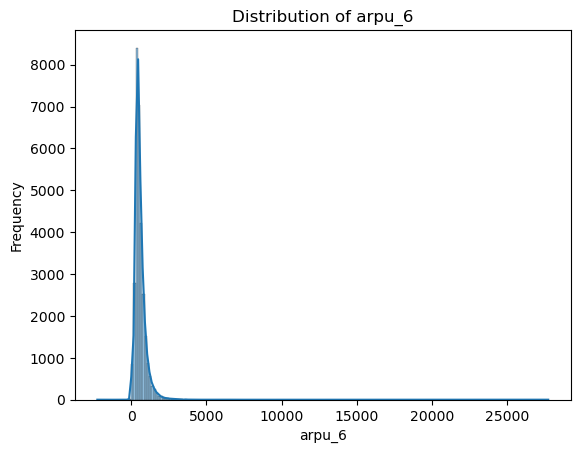

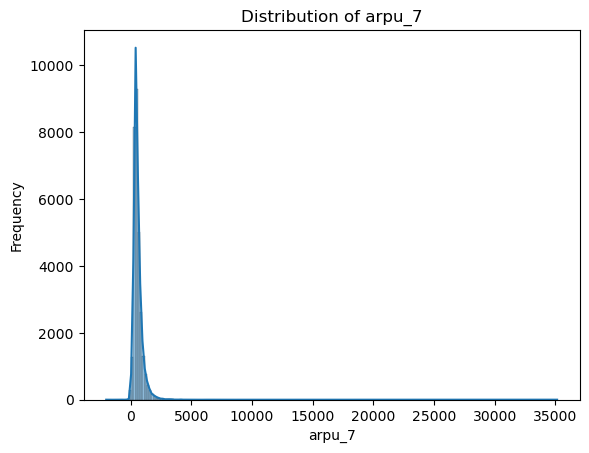

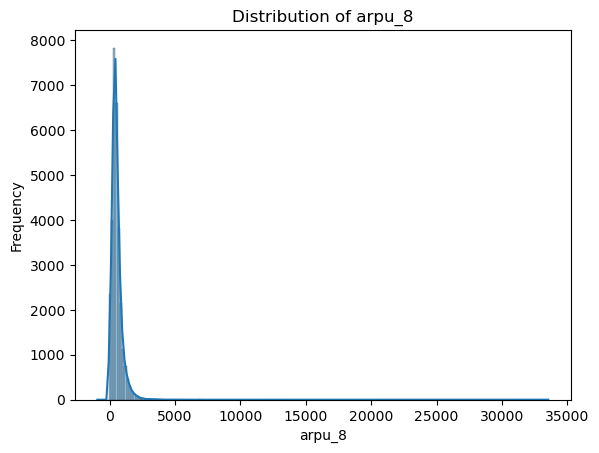

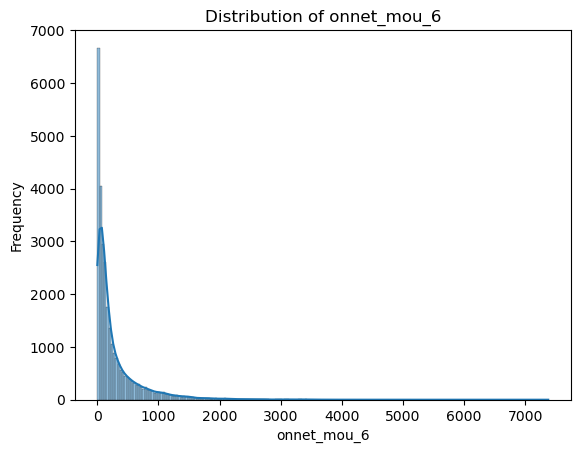

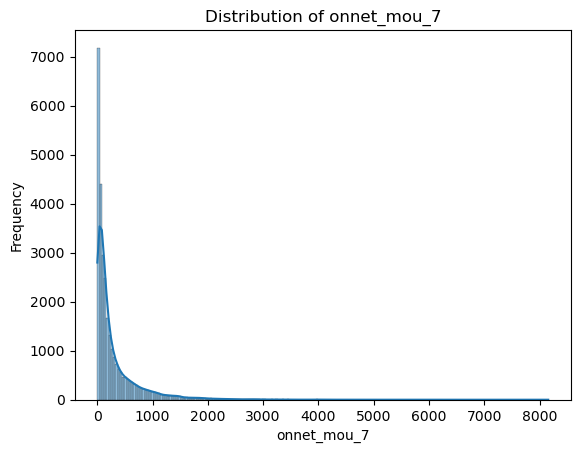

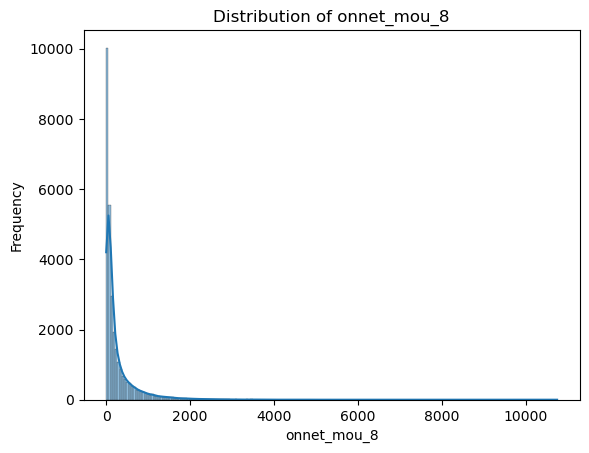

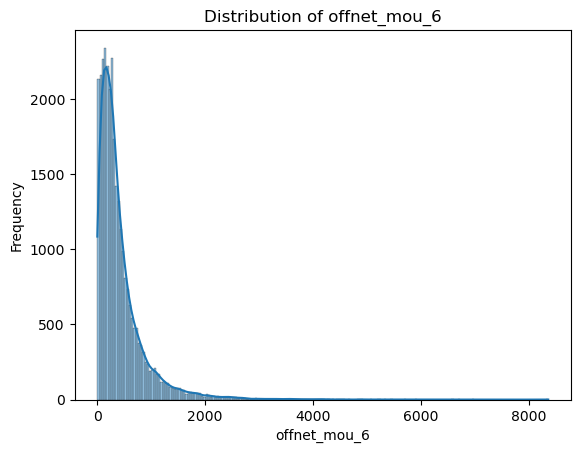

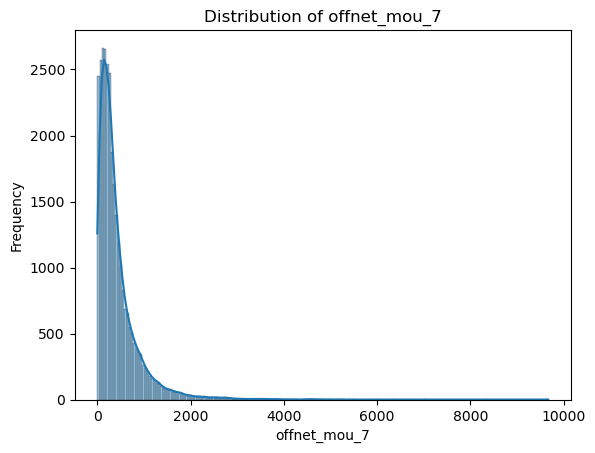

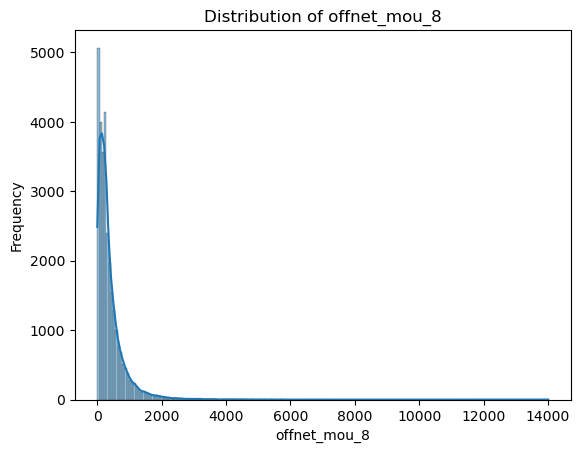

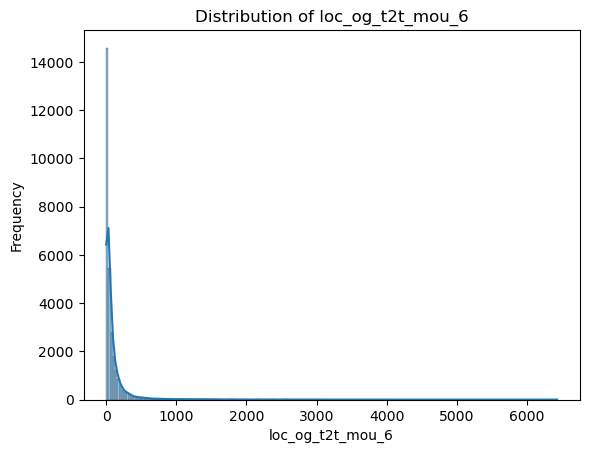

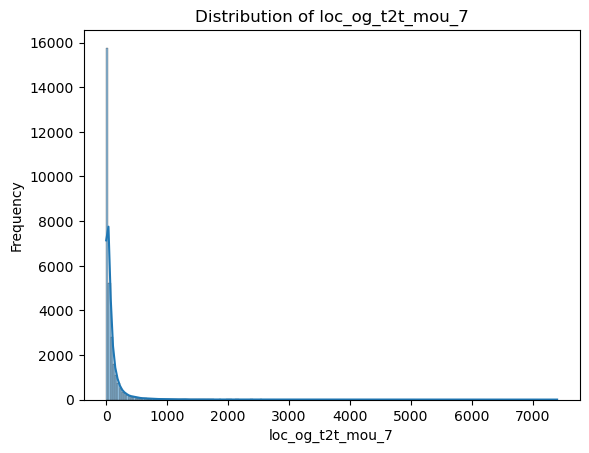

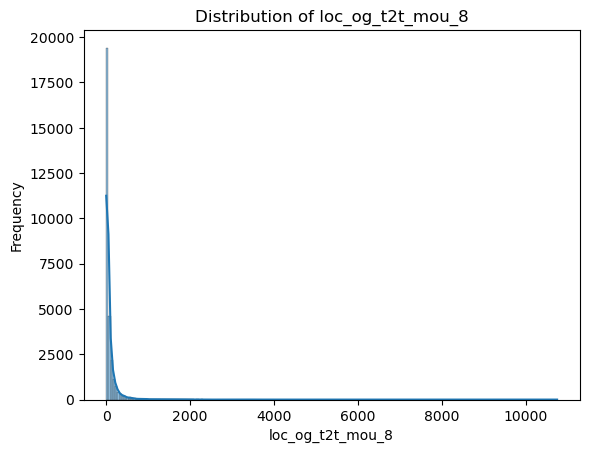

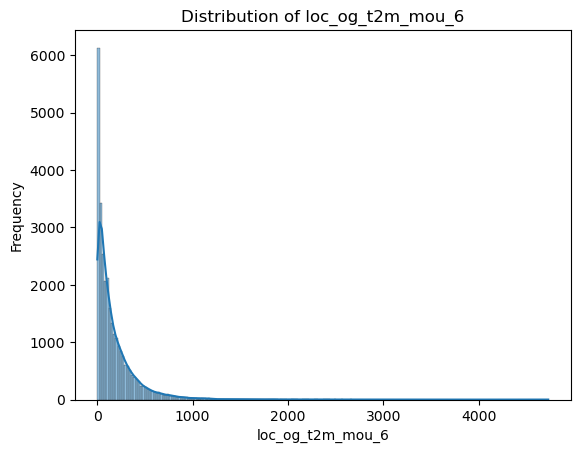

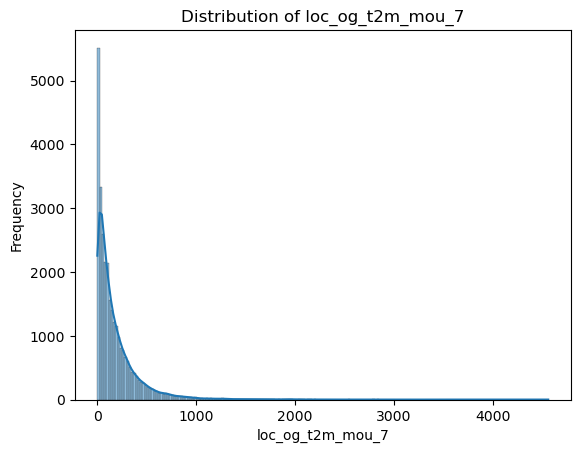

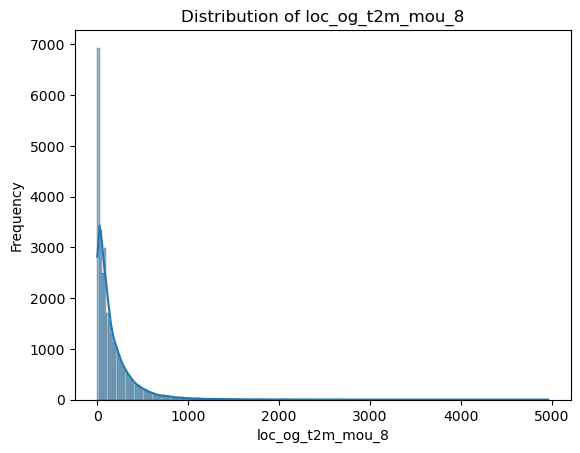

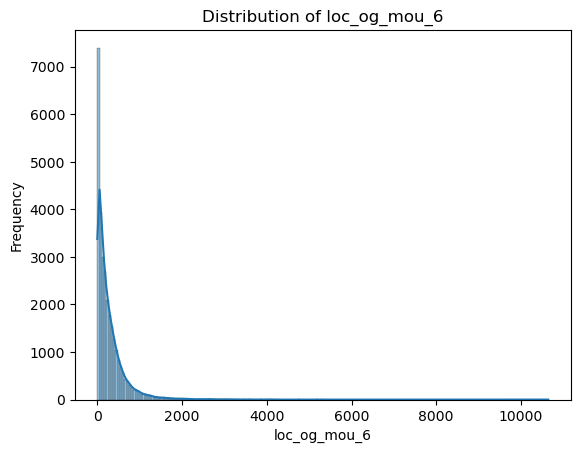

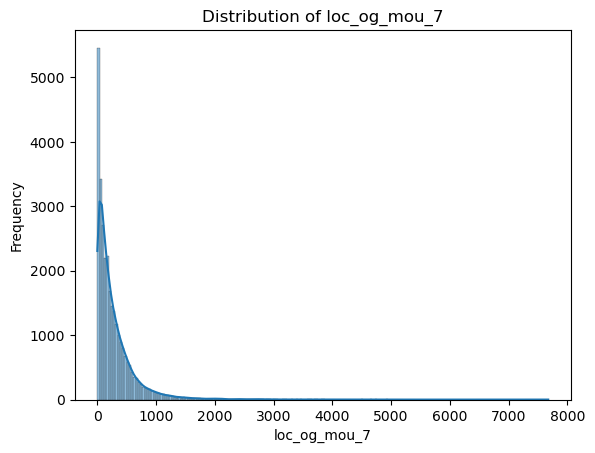

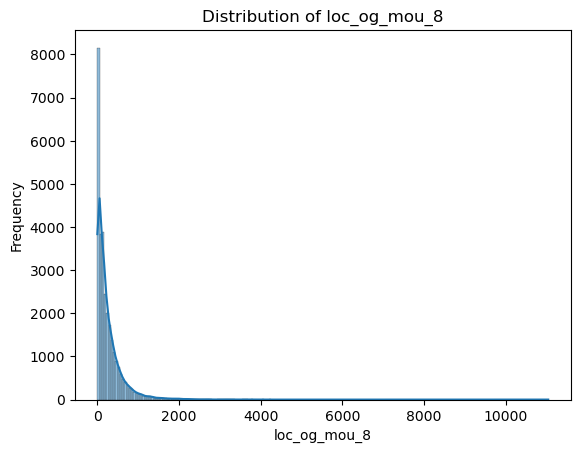

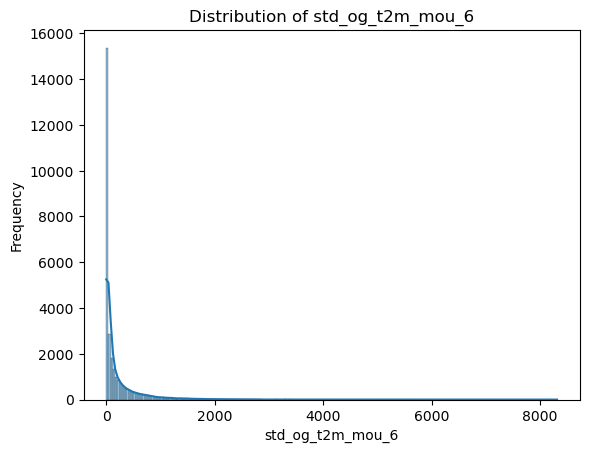

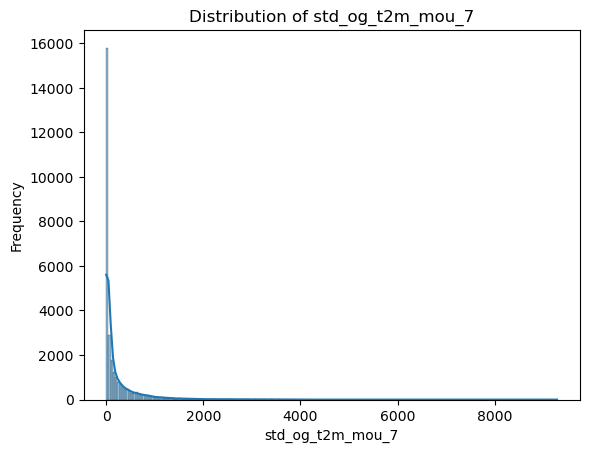

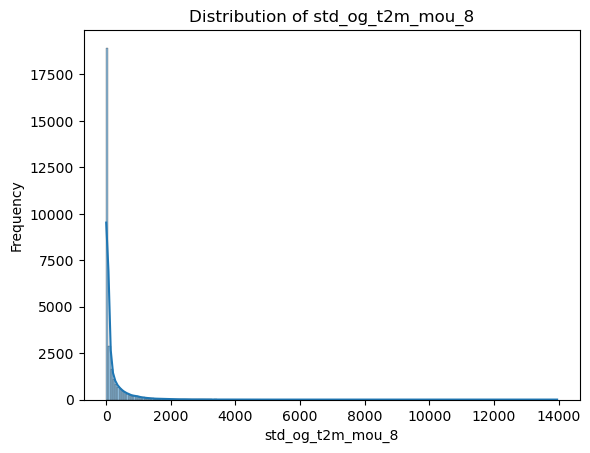

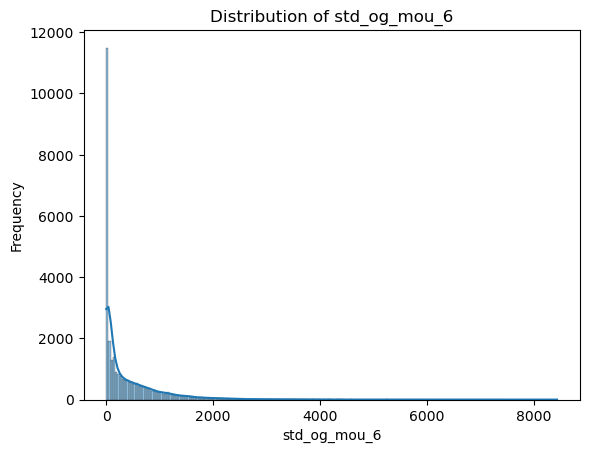

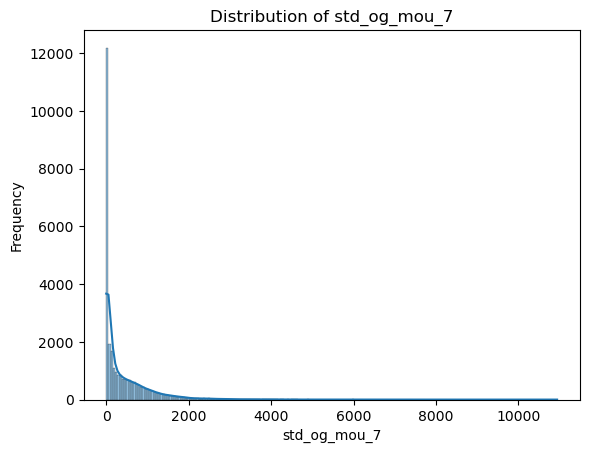

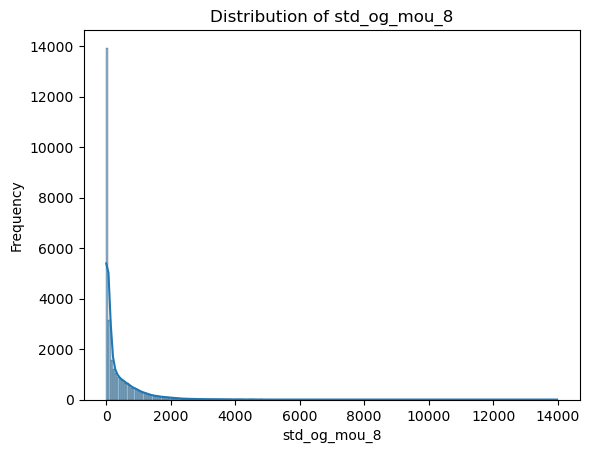

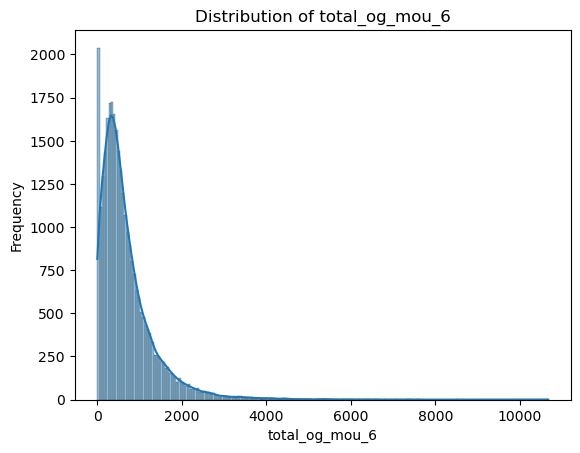

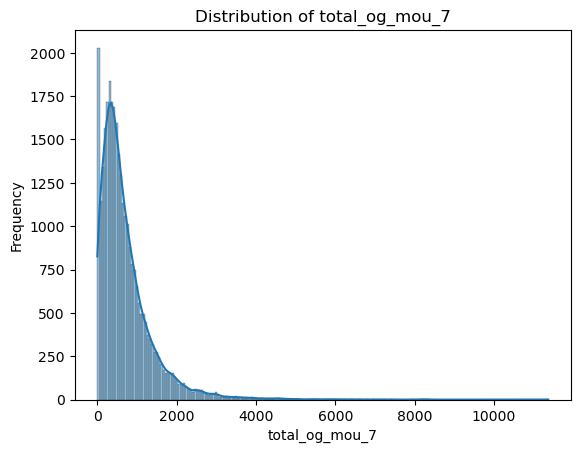

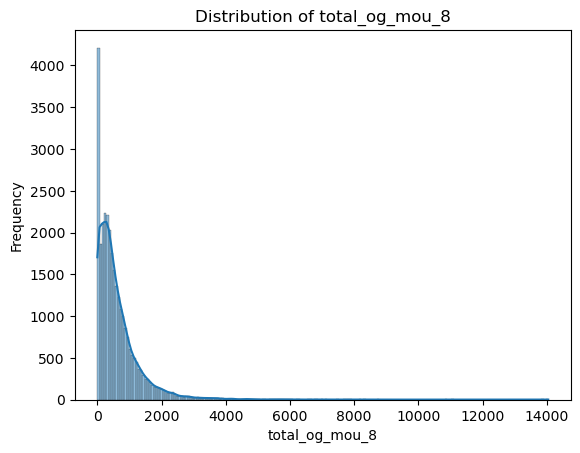

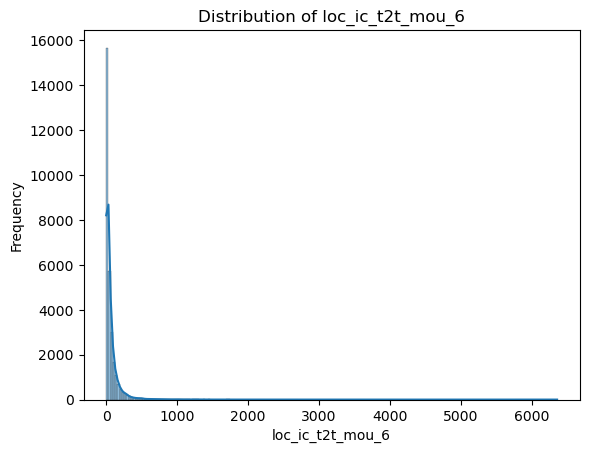

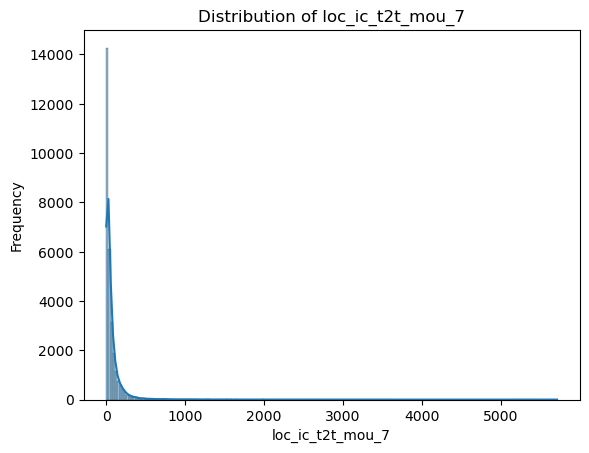

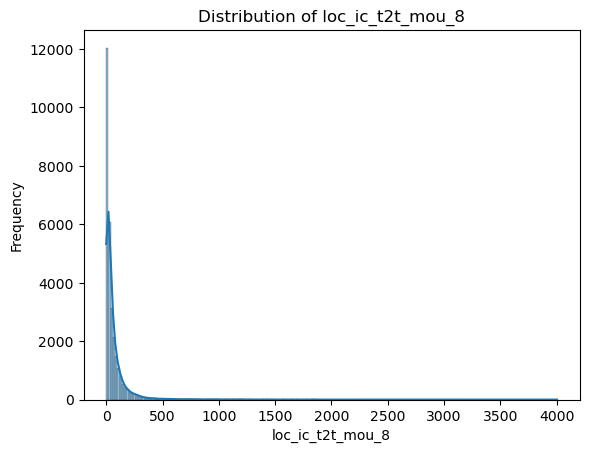

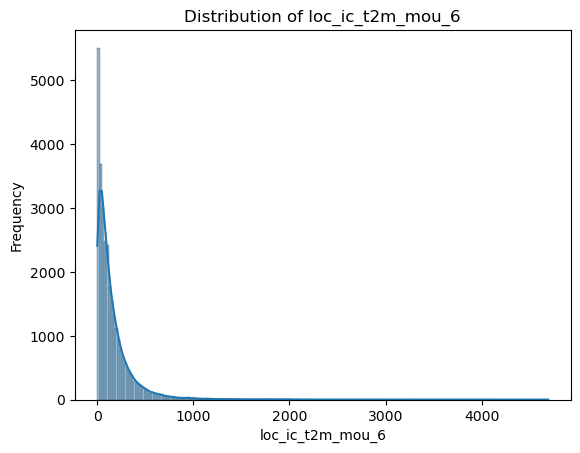

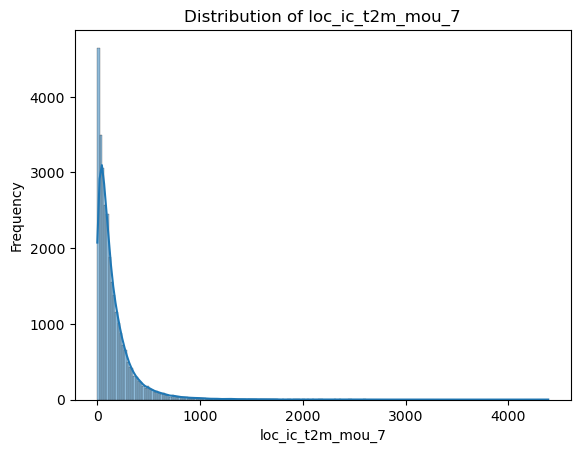

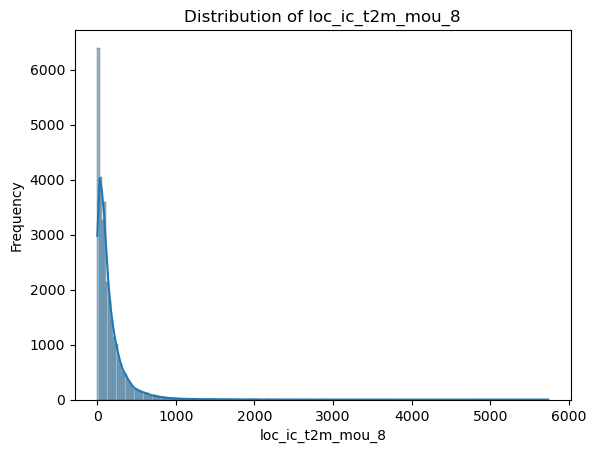

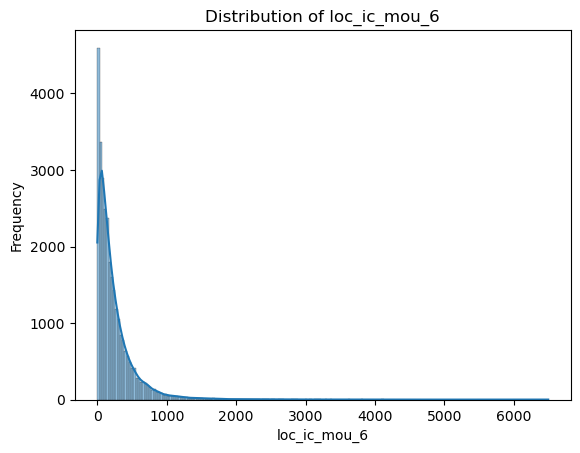

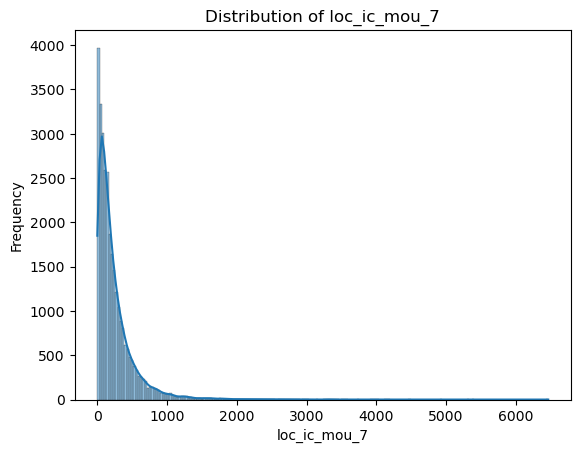

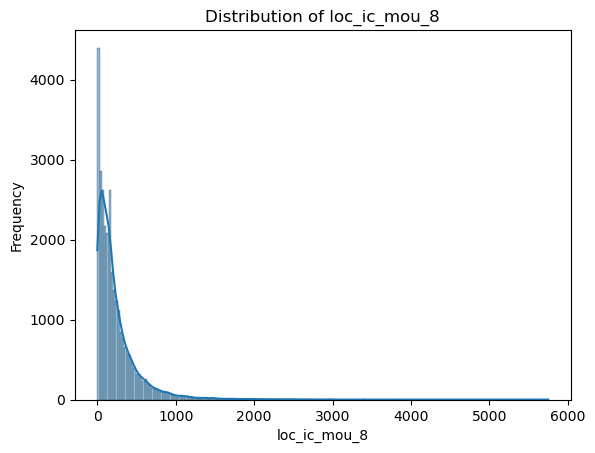

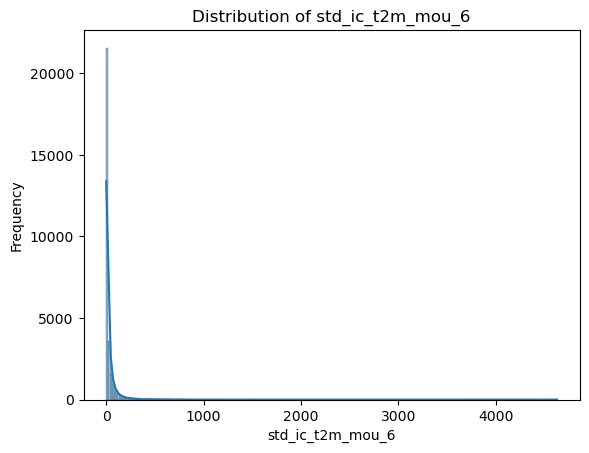

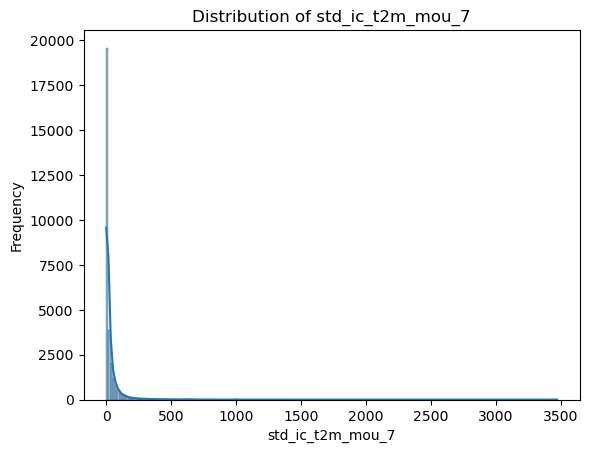

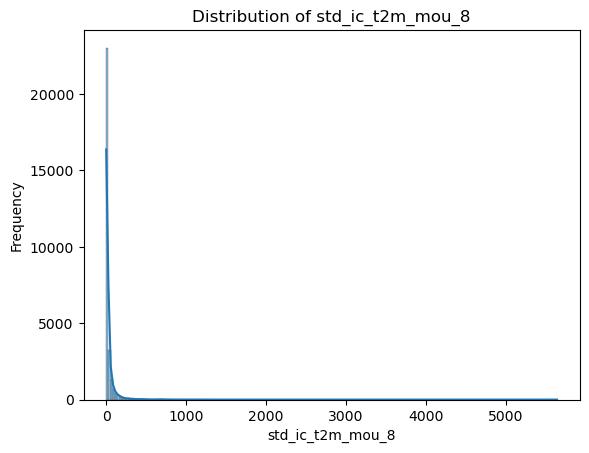

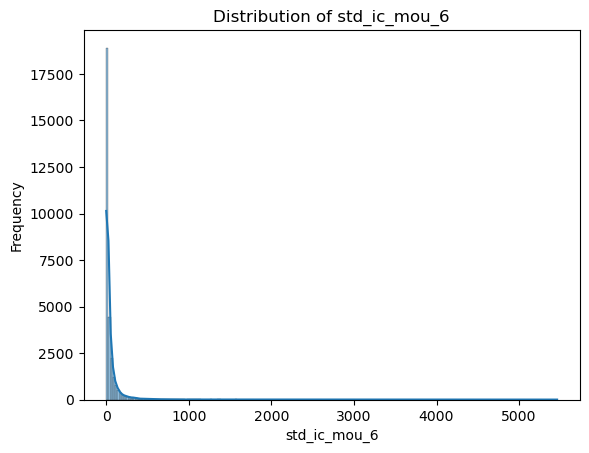

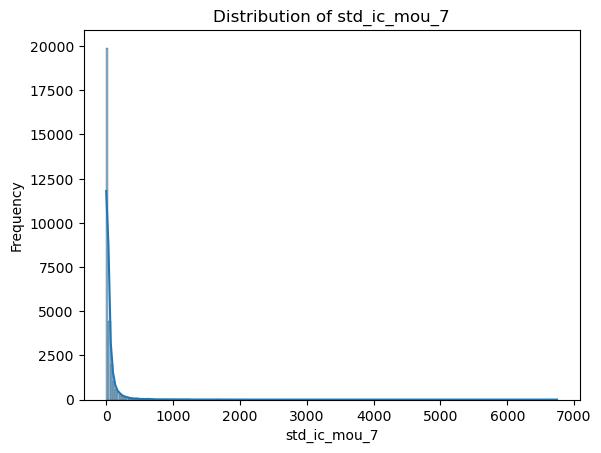

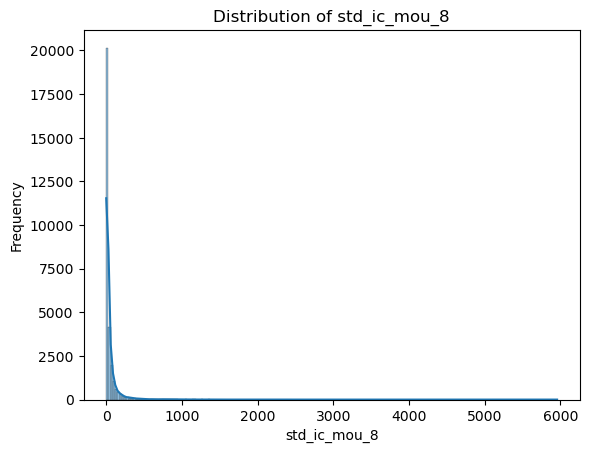

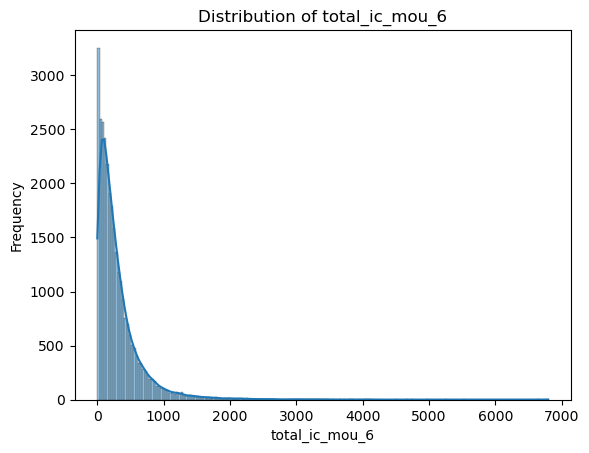

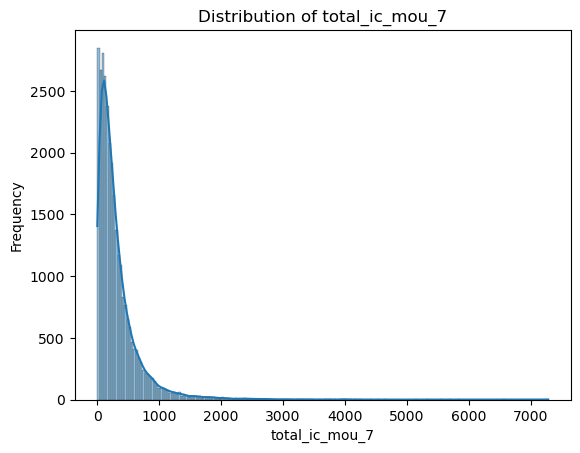

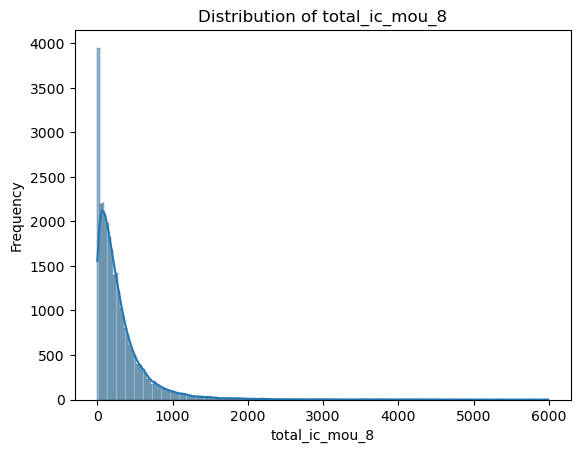

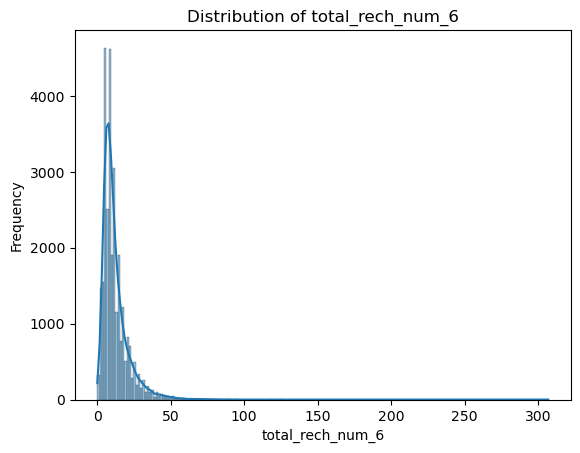

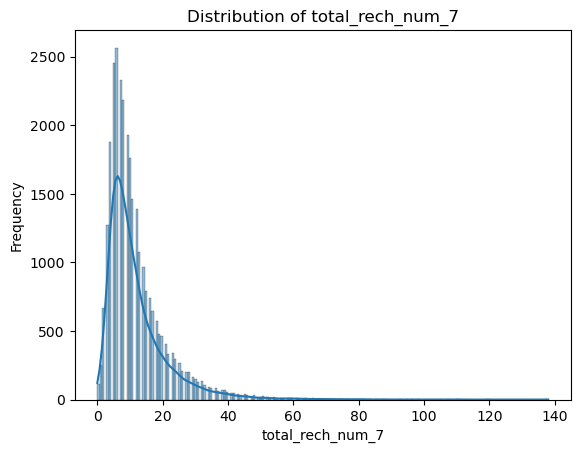

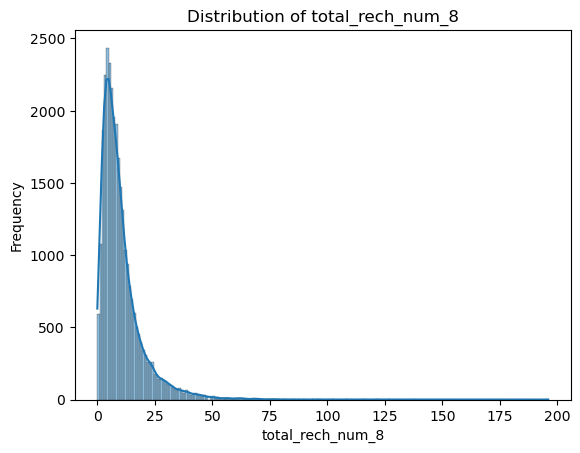

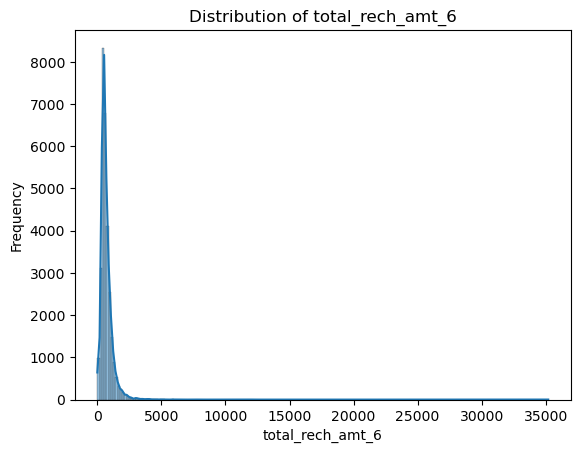

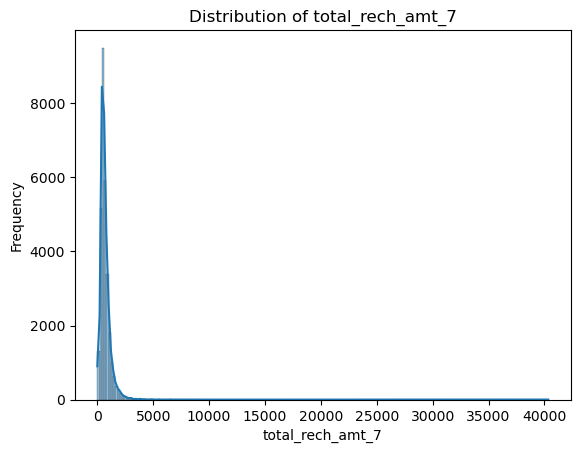

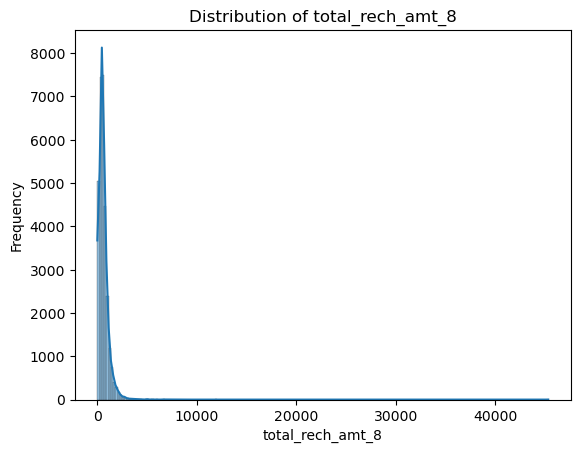

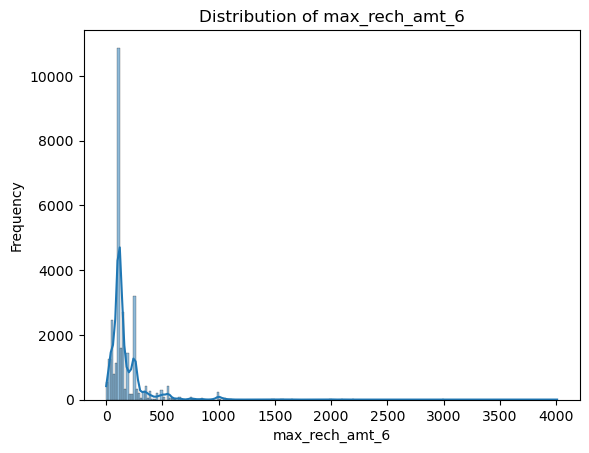

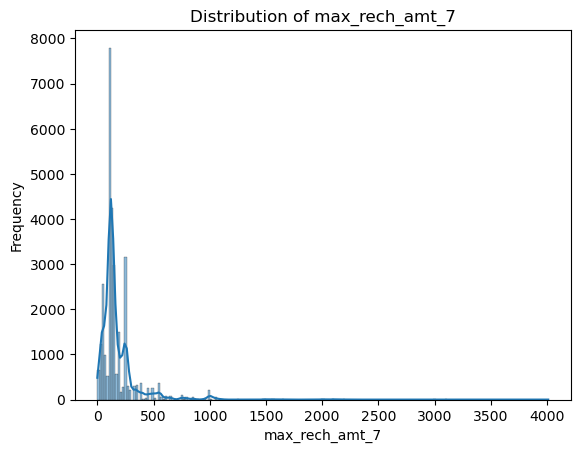

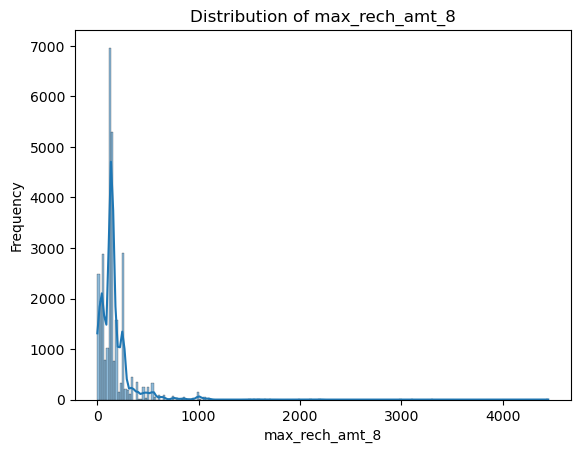

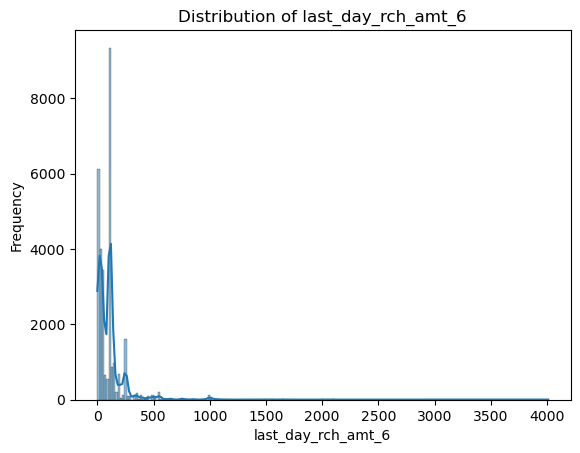

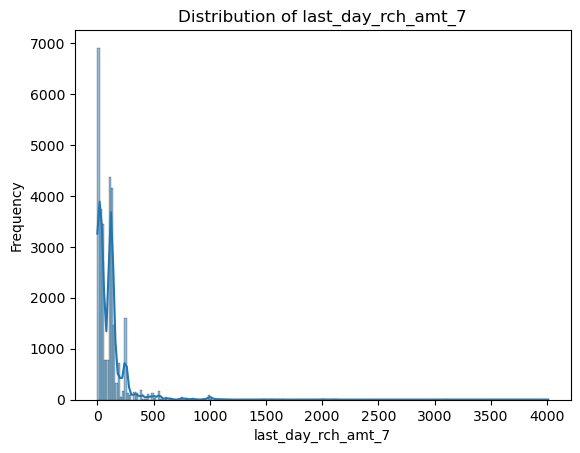

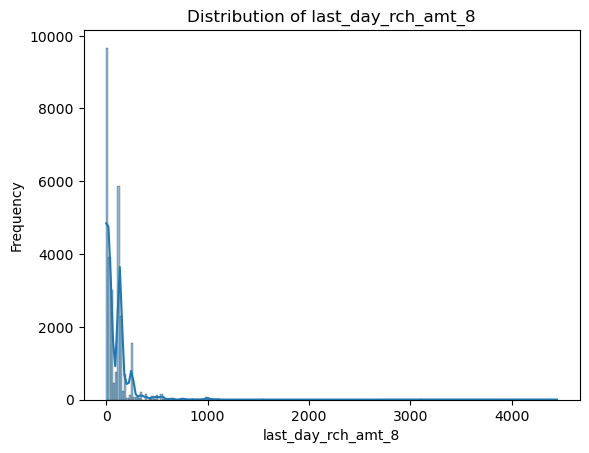

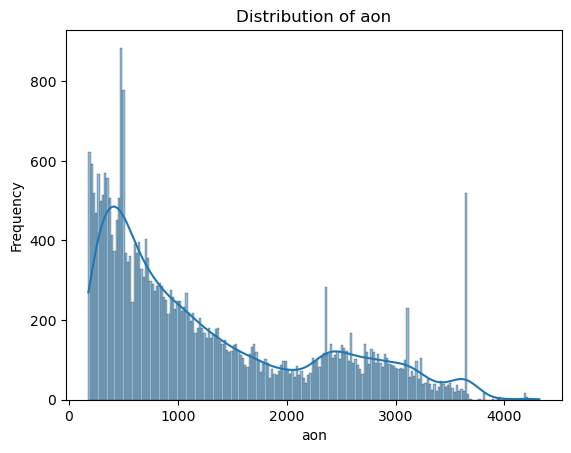

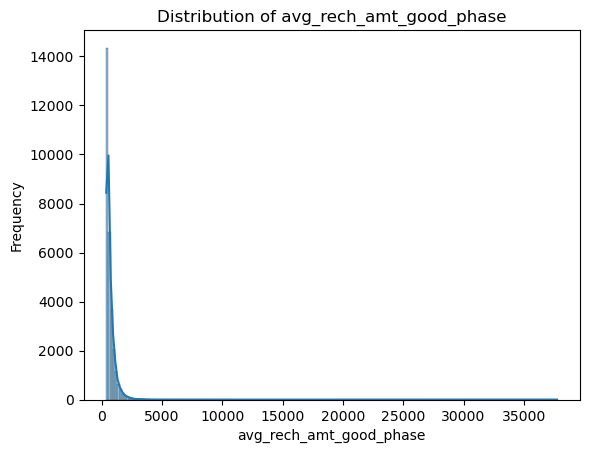

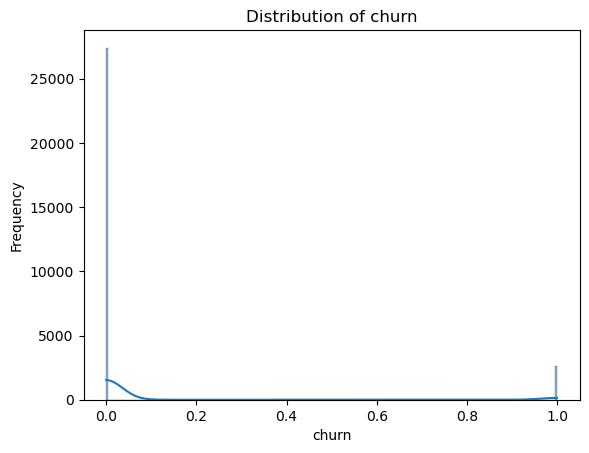

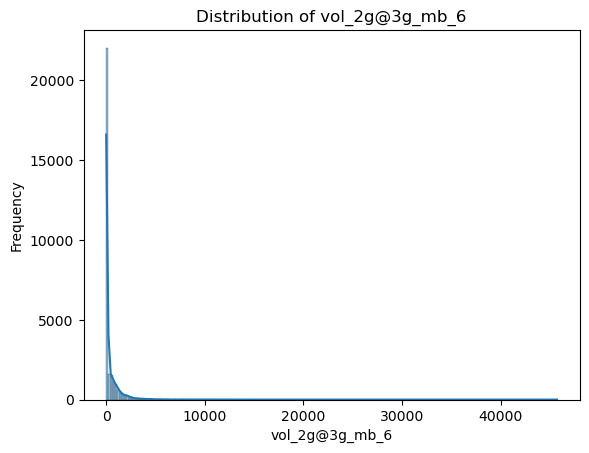

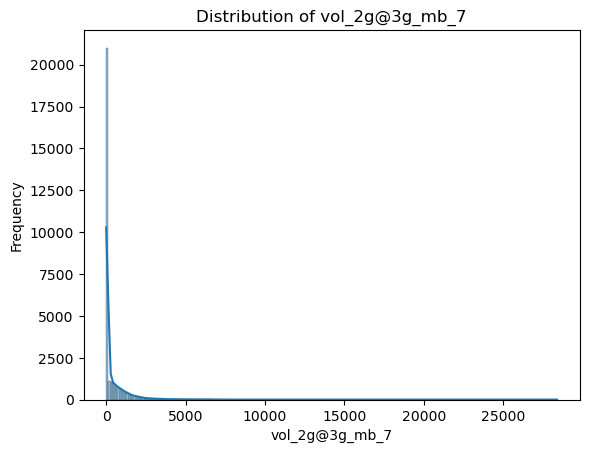

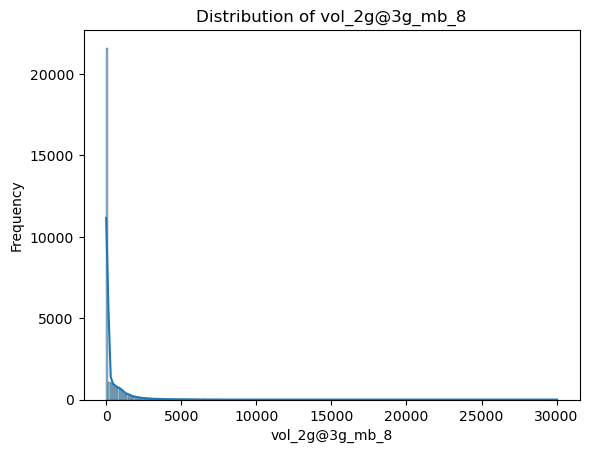

In [35]:
# Distribution plots for numerical columns
numerical_cols = high_value_customers.select_dtypes(include=[np.number]).columns
# numerical_cols=['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
for col in numerical_cols:
    sns.histplot(high_value_customers[col], kde=True, bins=200)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


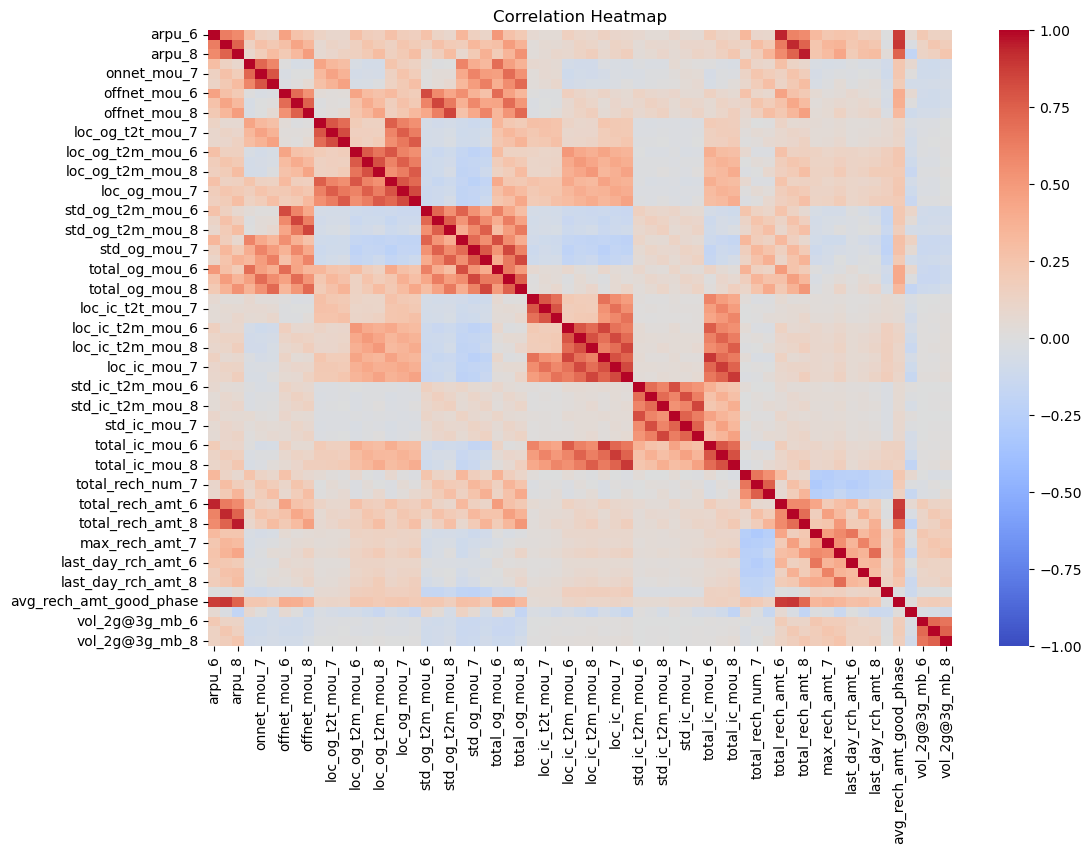

In [36]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = high_value_customers.corr()
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


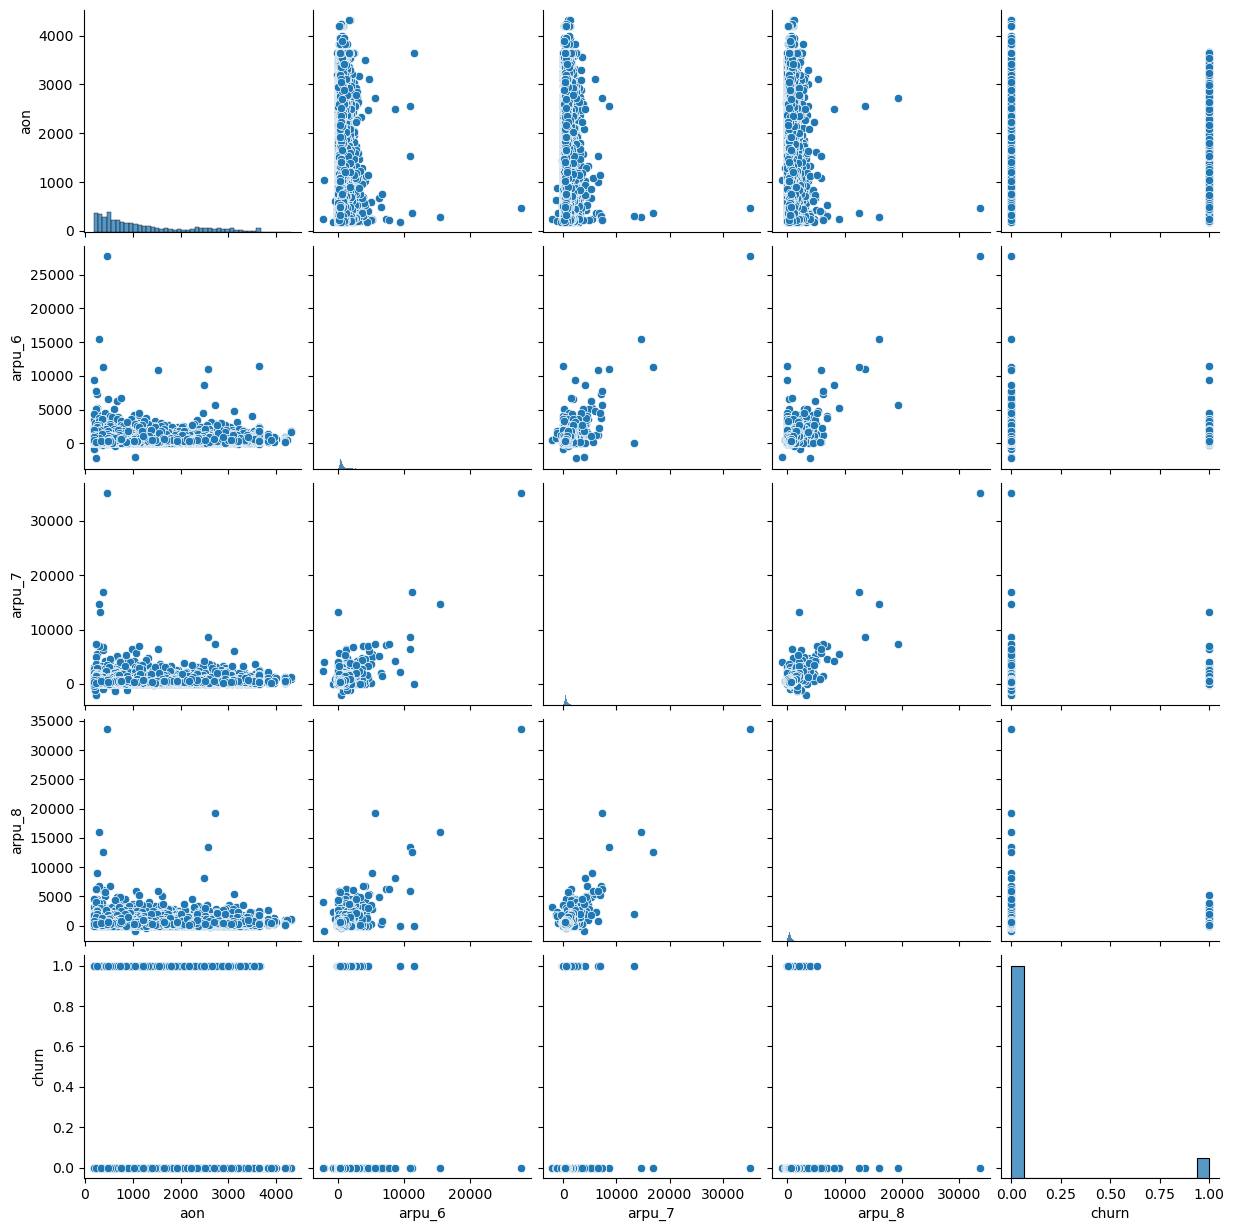

In [37]:
# Pairplot for key features
sns.pairplot(high_value_customers[['aon','arpu_6', 'arpu_7', 'arpu_8', 'churn']])
# plt.title("Pairplot of ARPU and Churn")
plt.show()


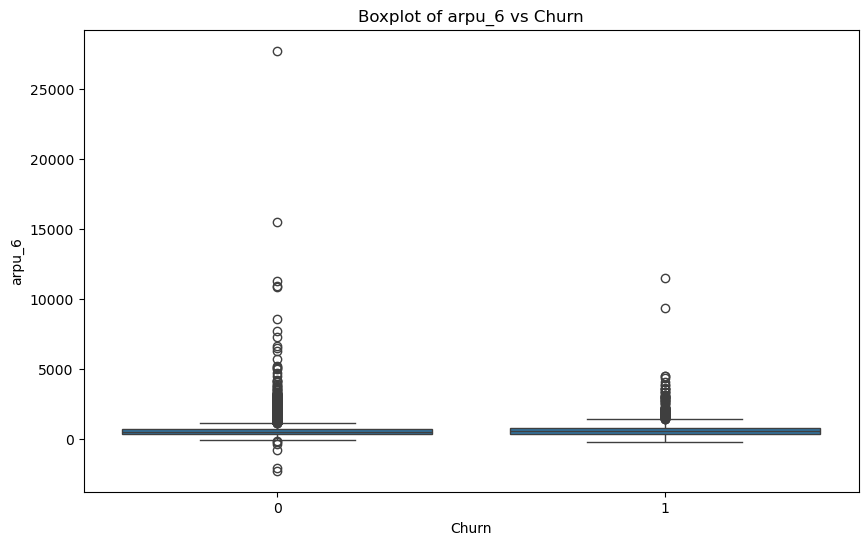

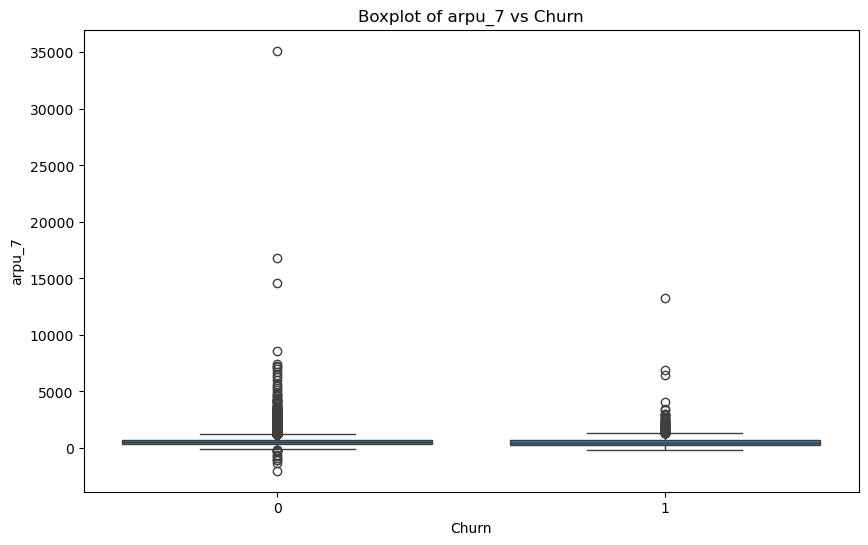

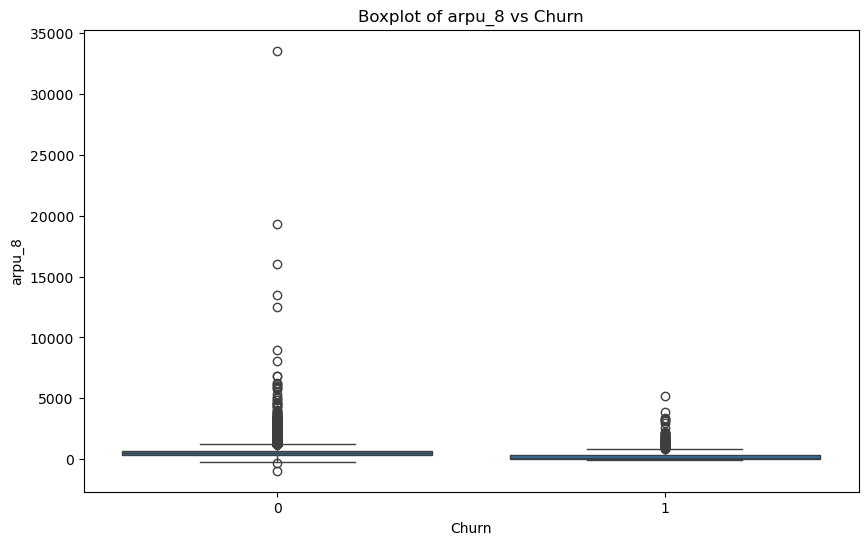

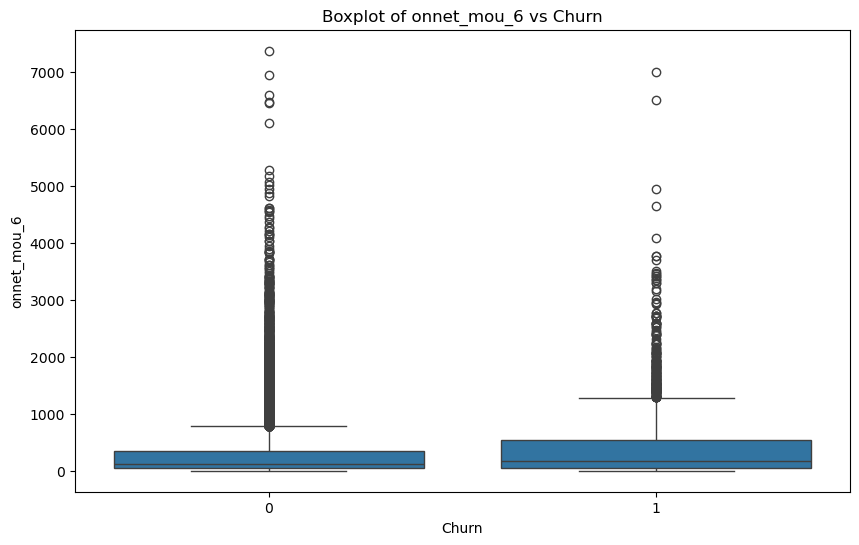

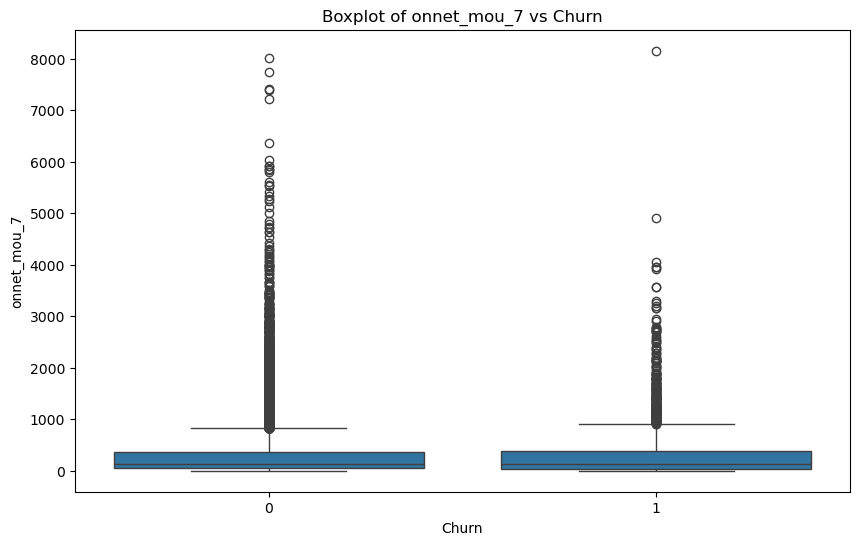

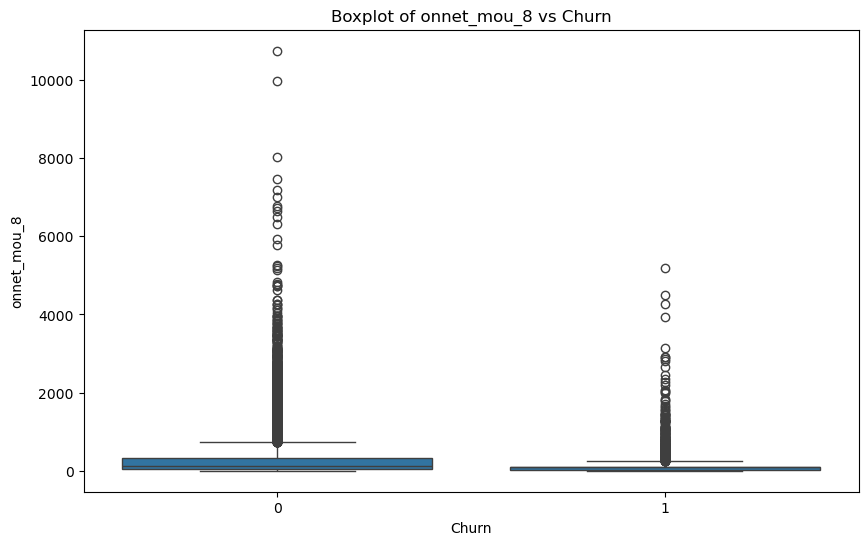

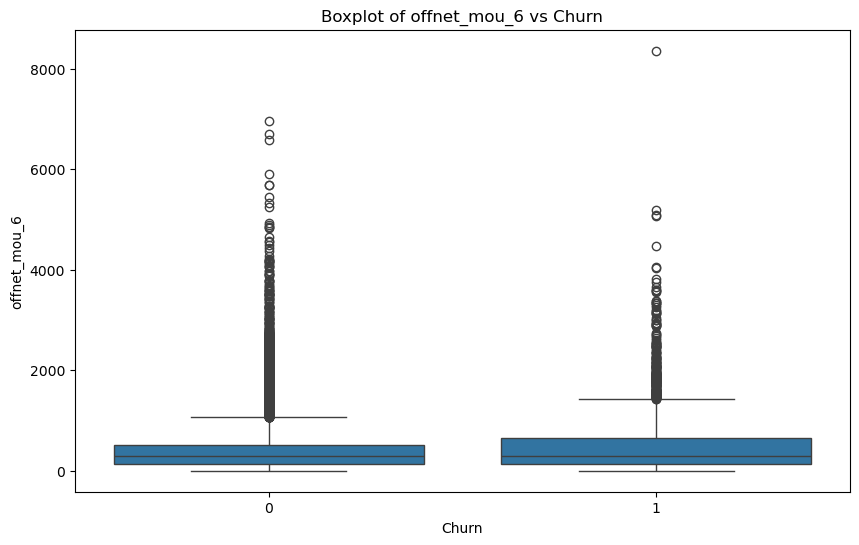

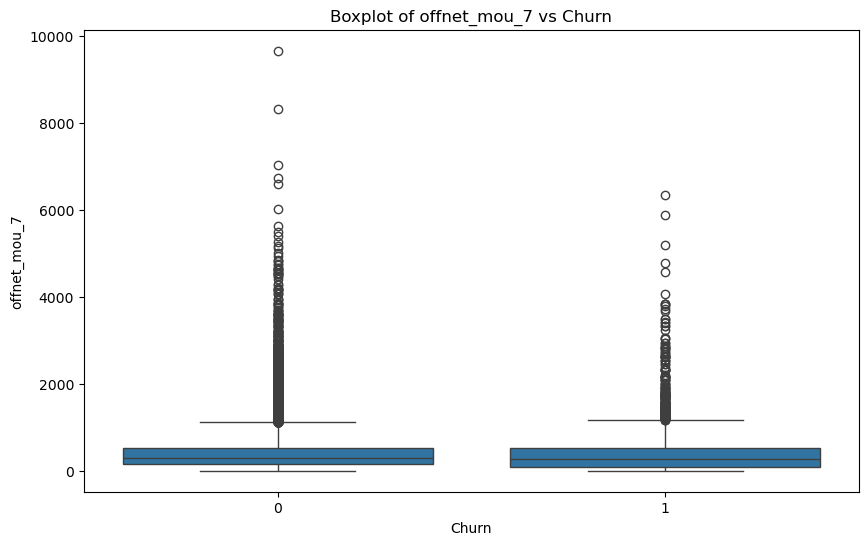

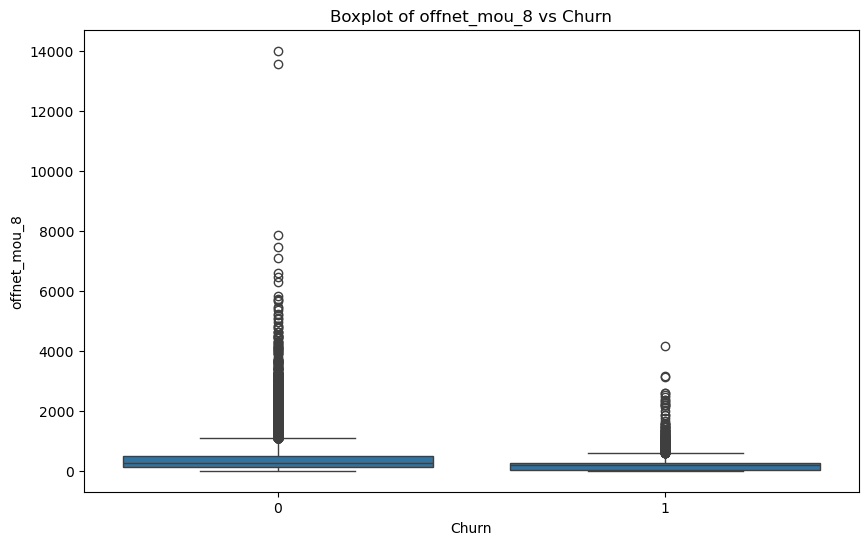

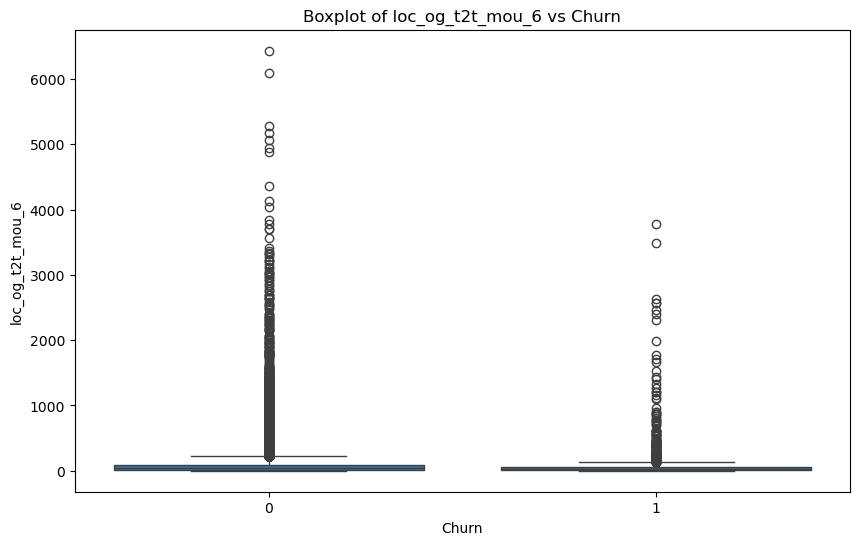

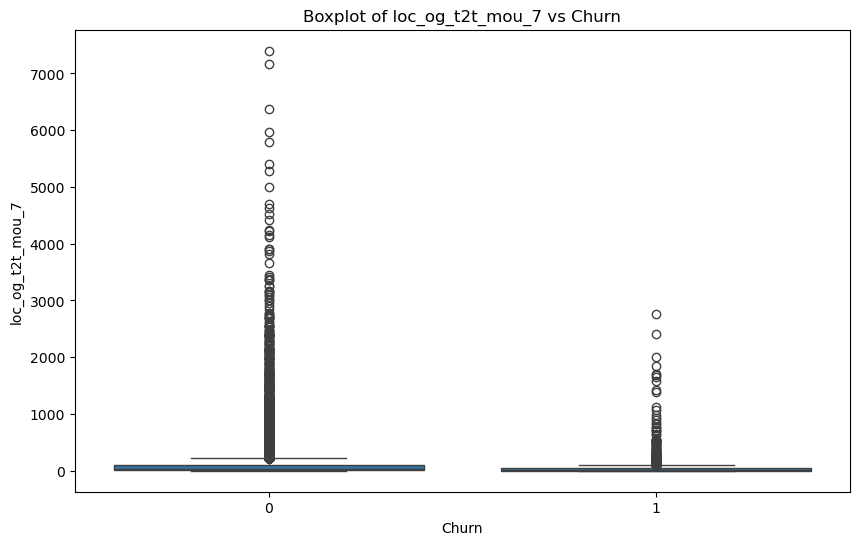

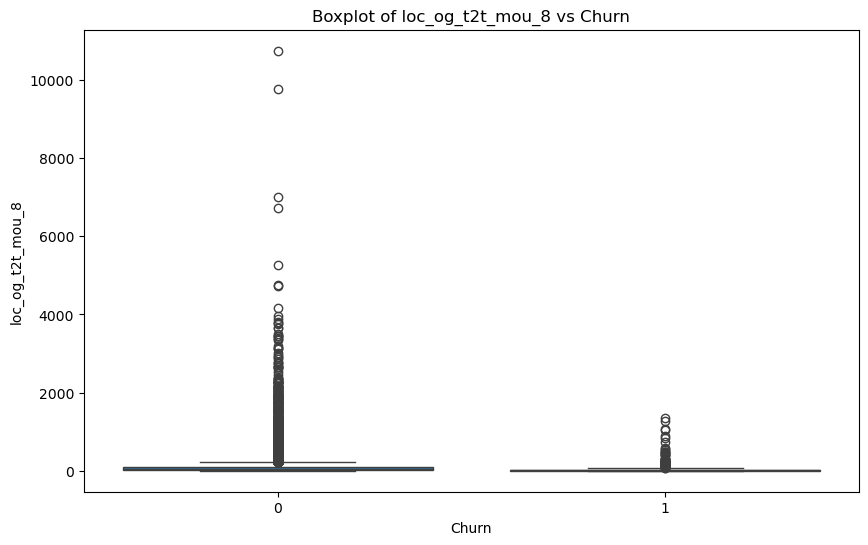

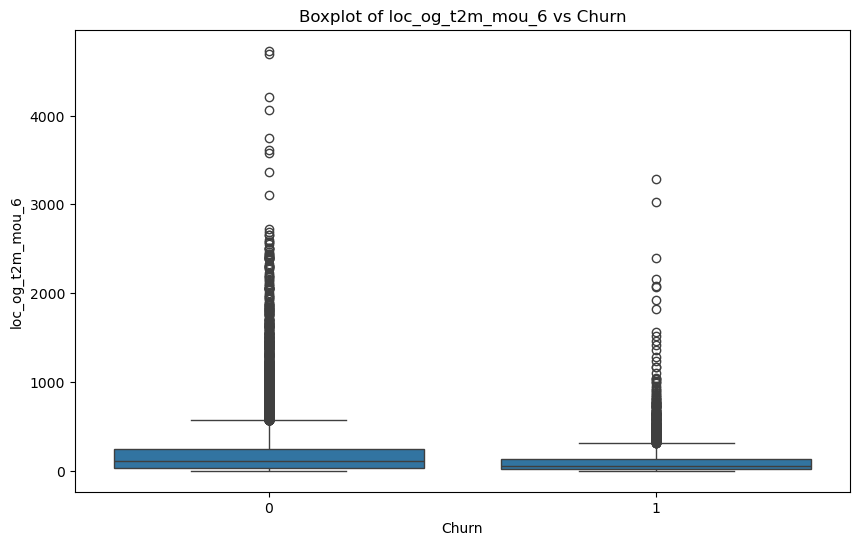

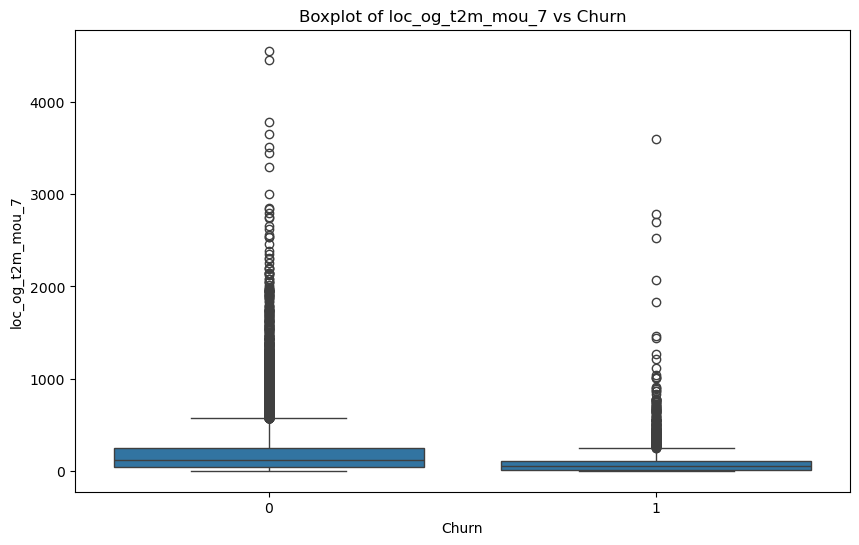

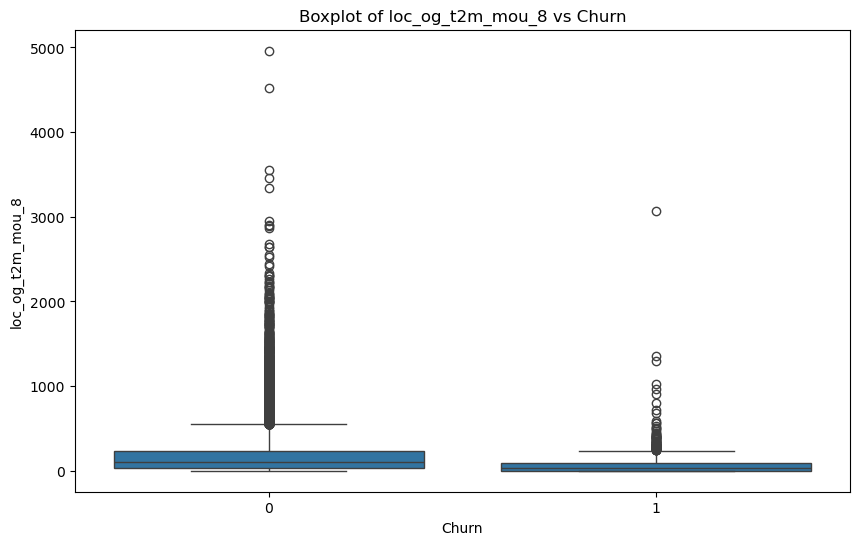

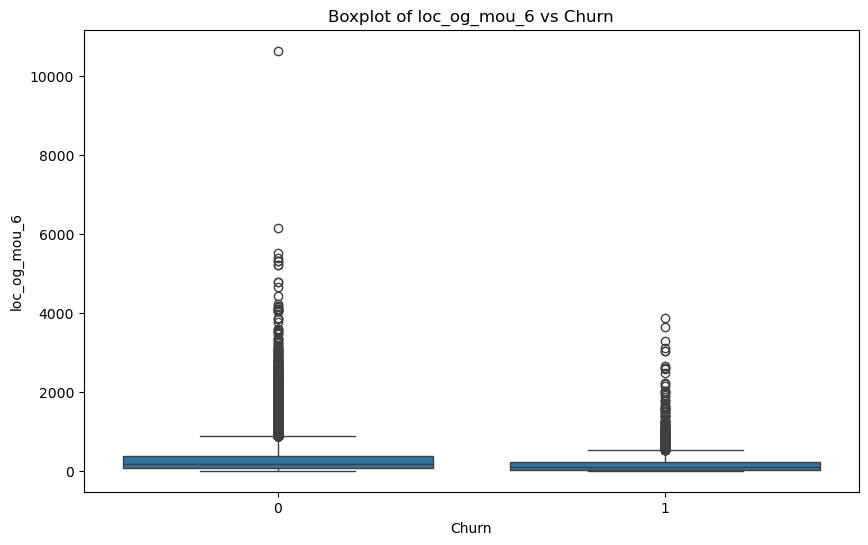

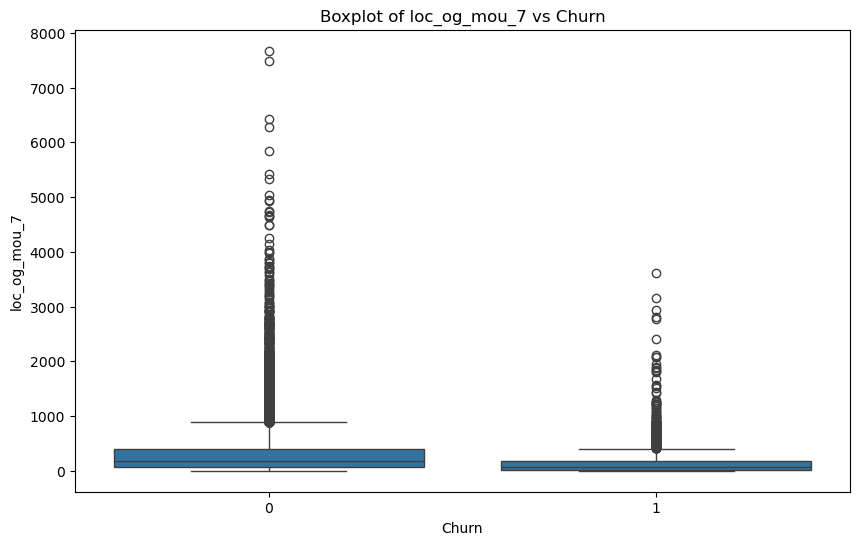

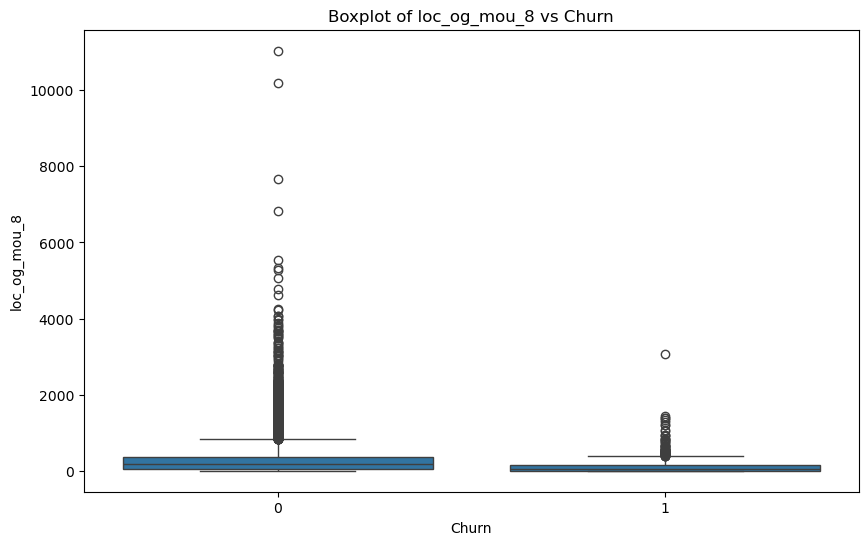

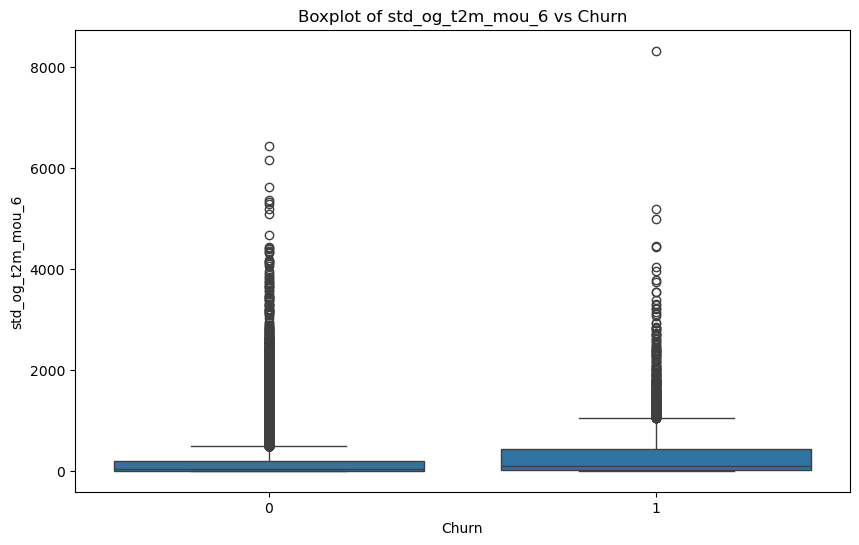

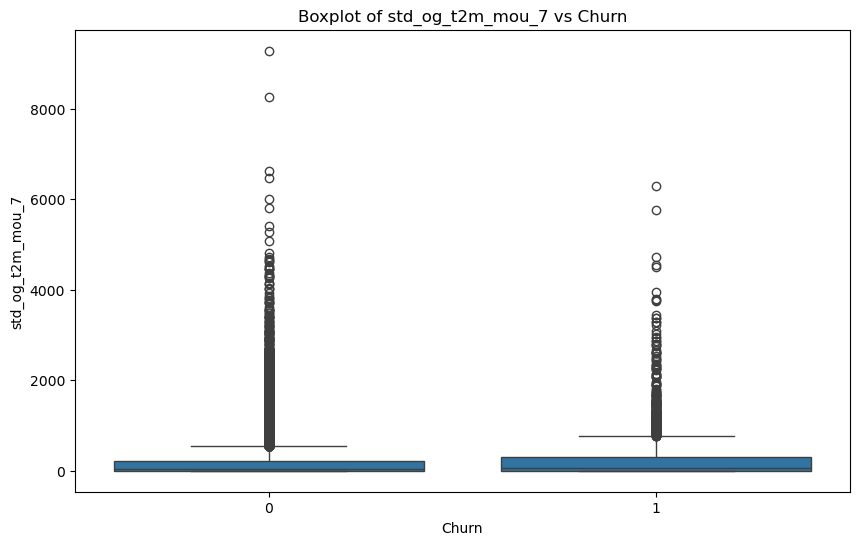

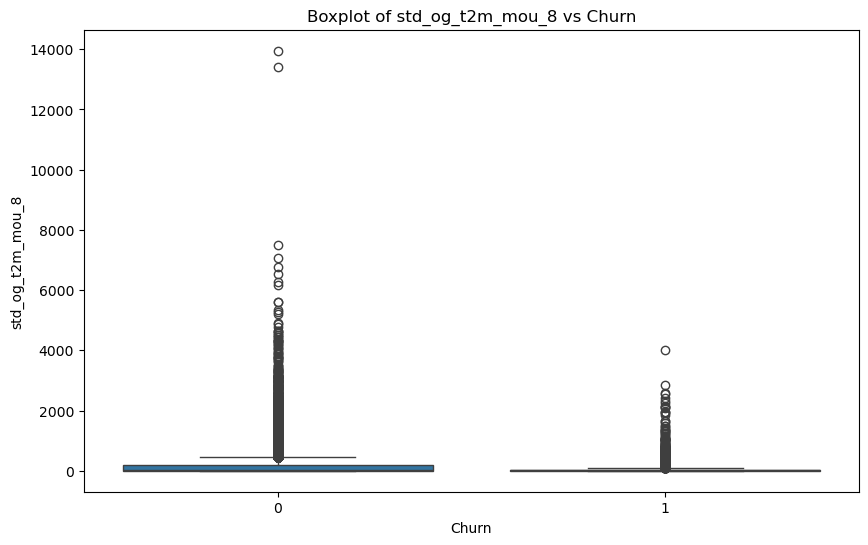

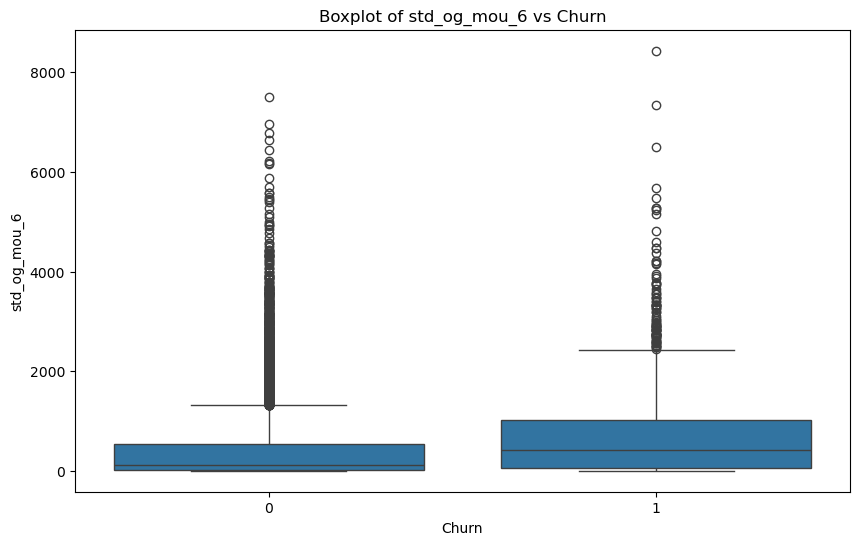

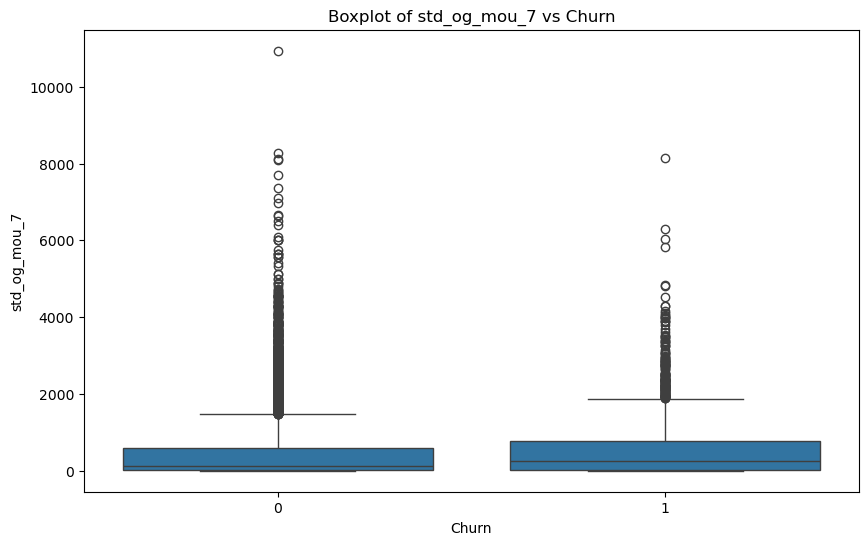

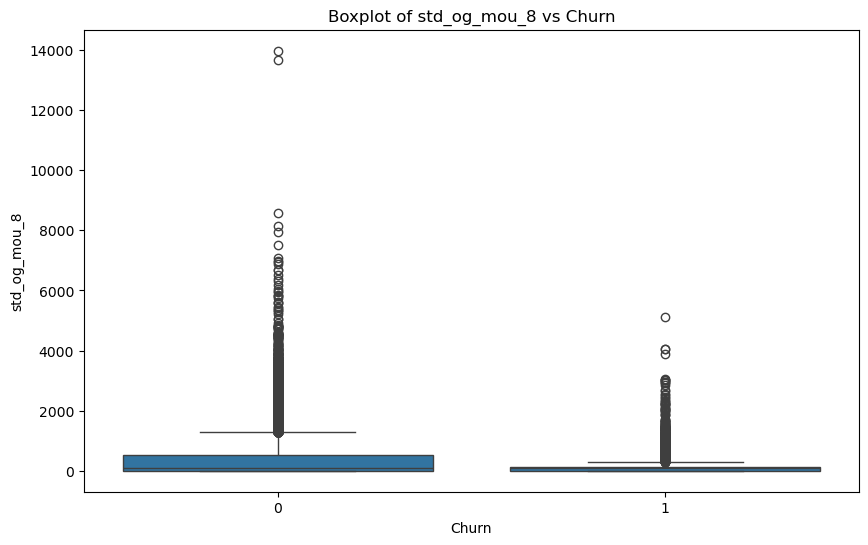

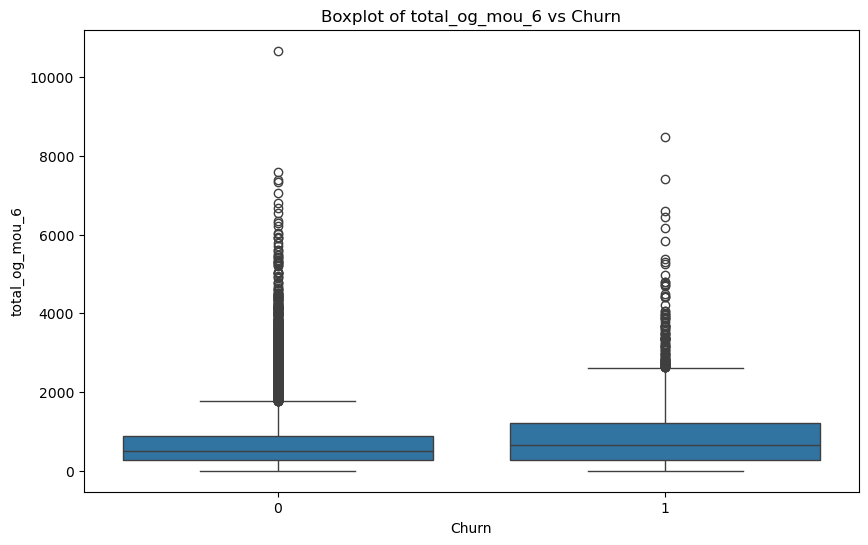

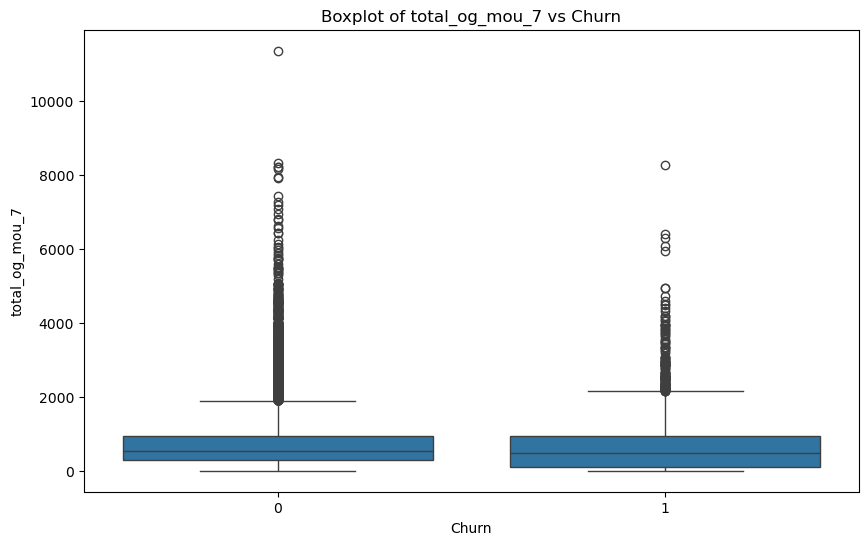

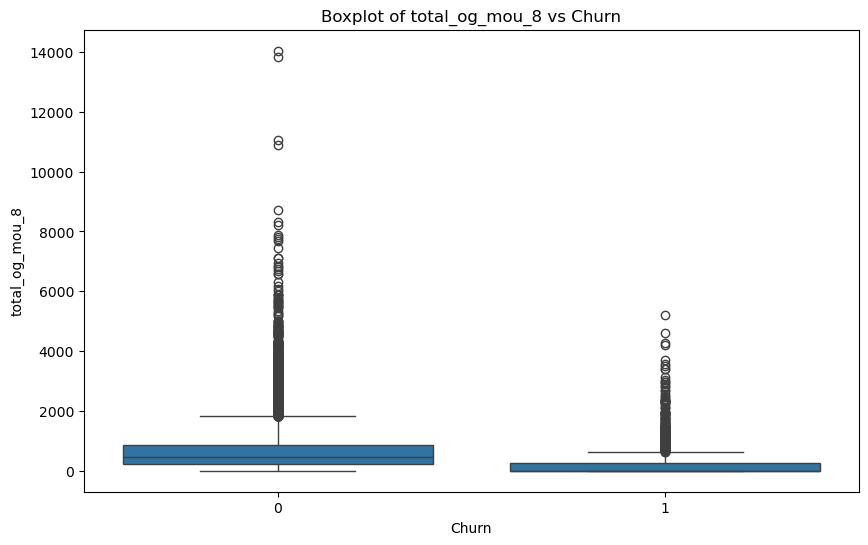

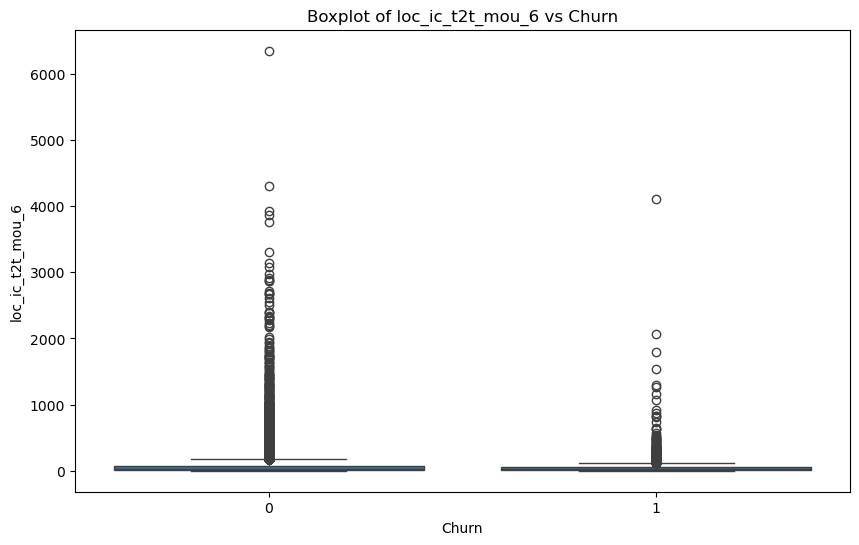

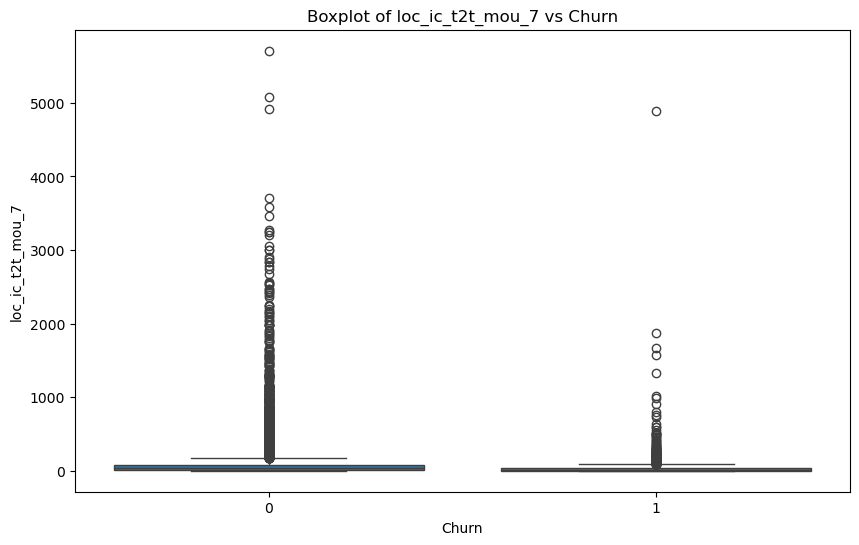

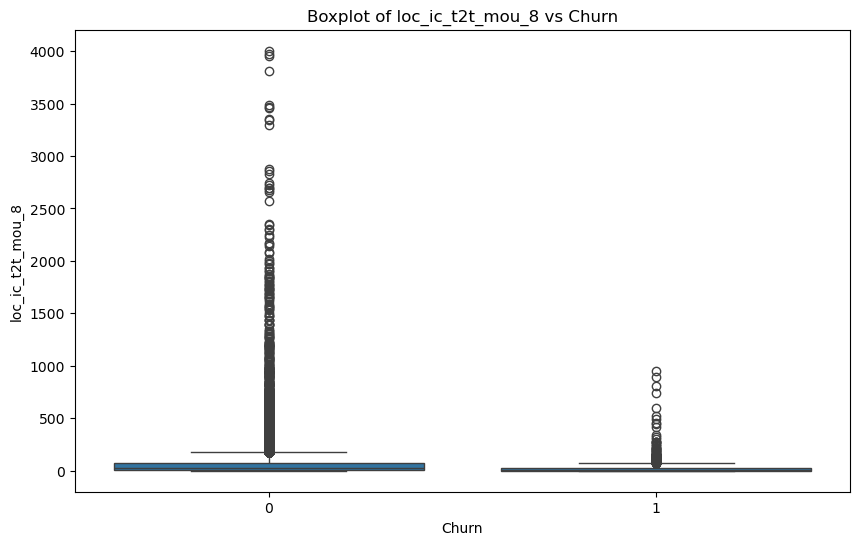

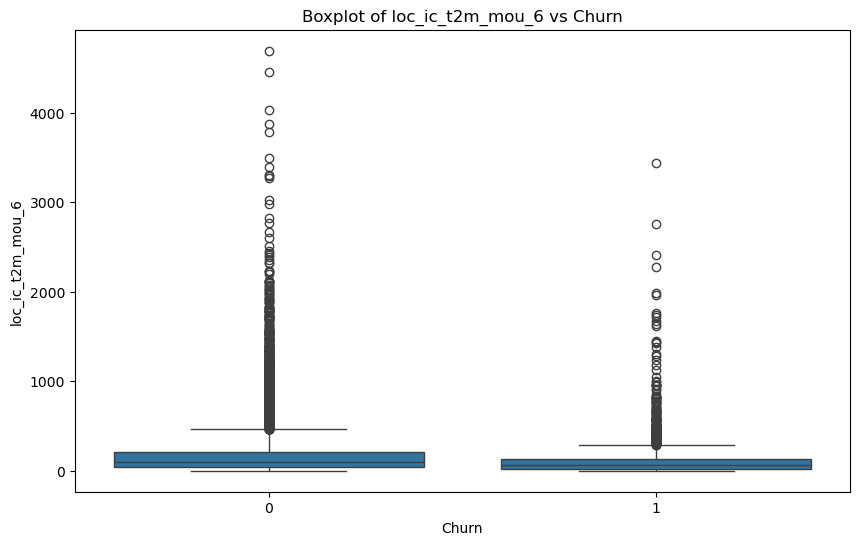

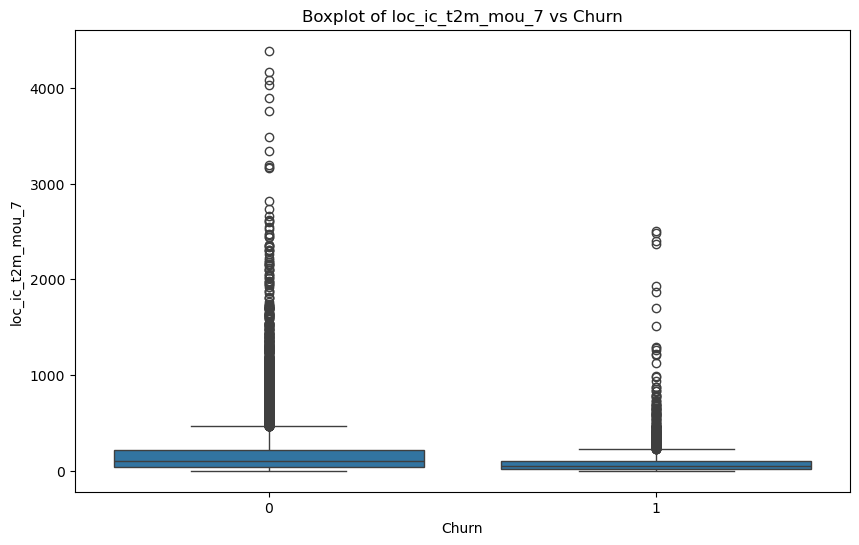

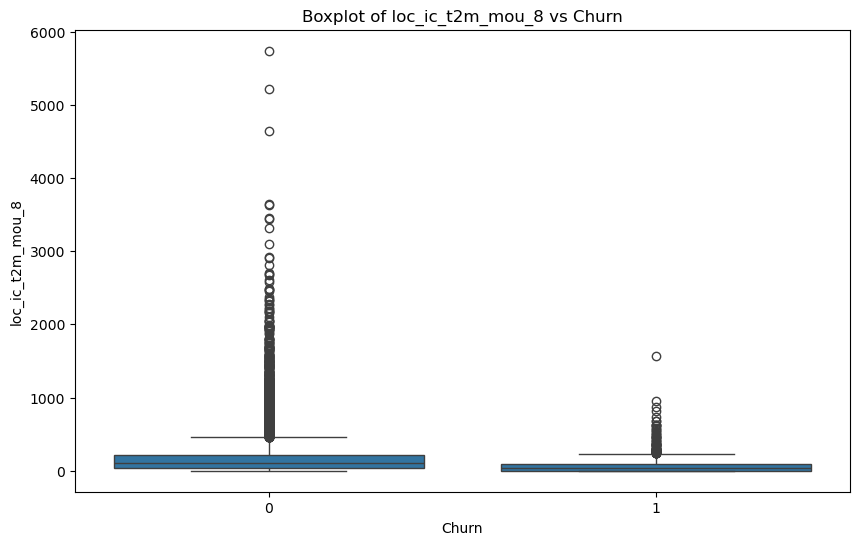

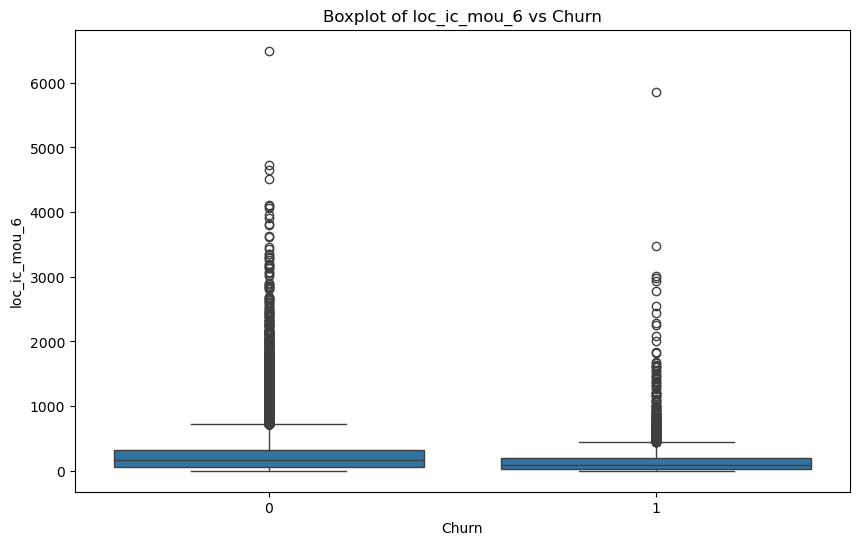

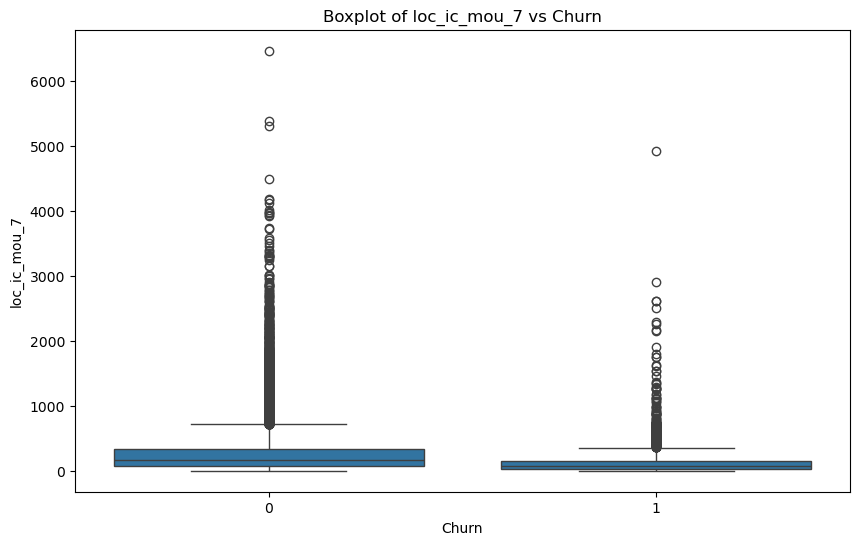

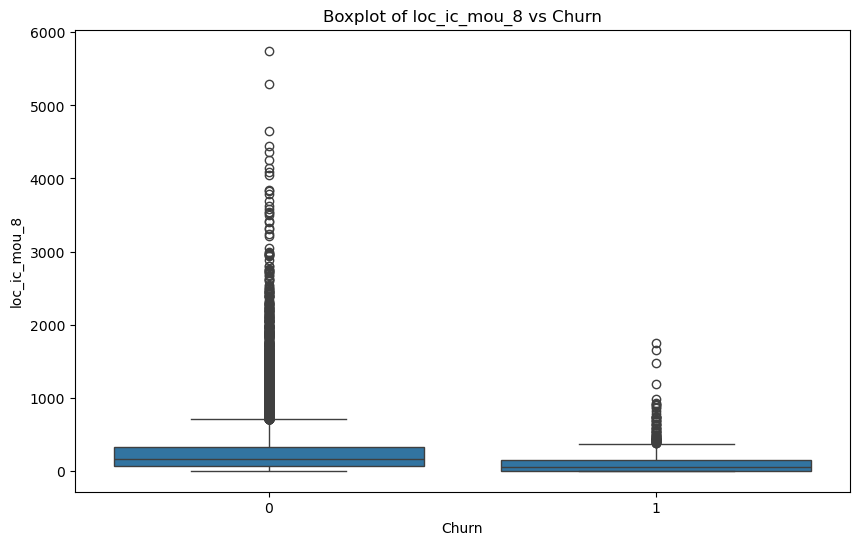

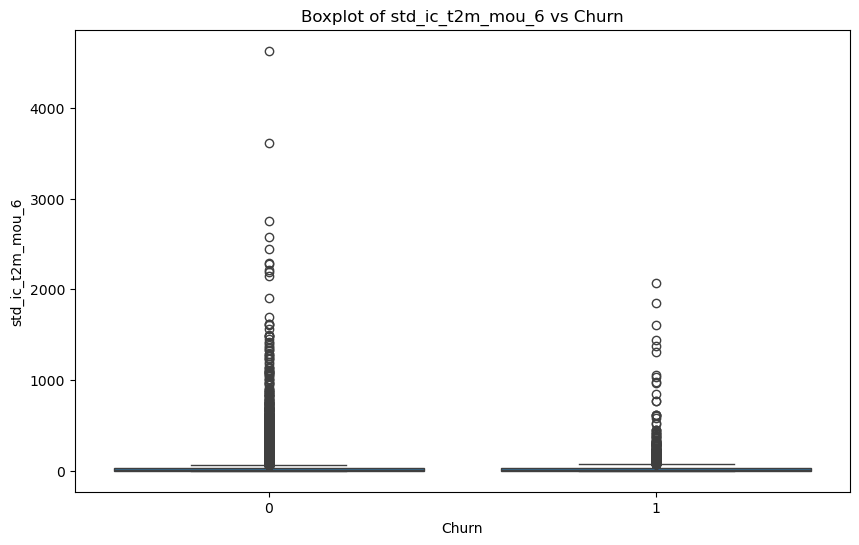

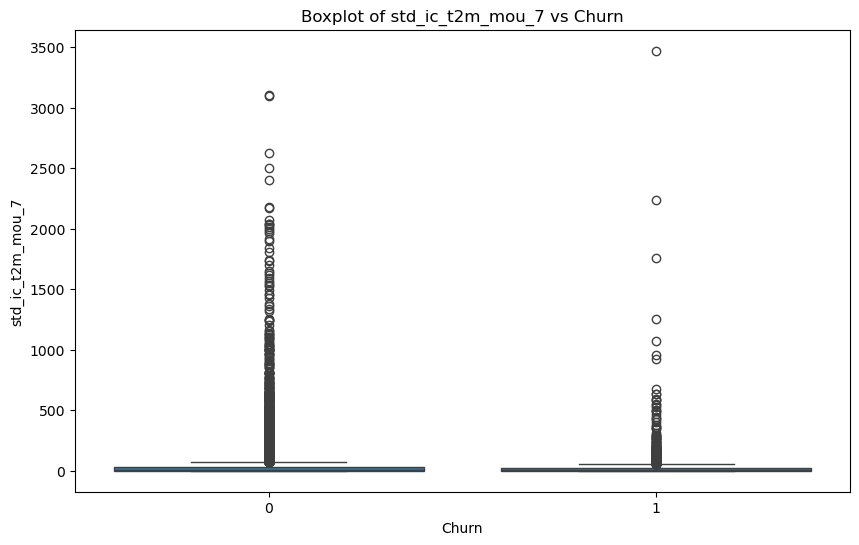

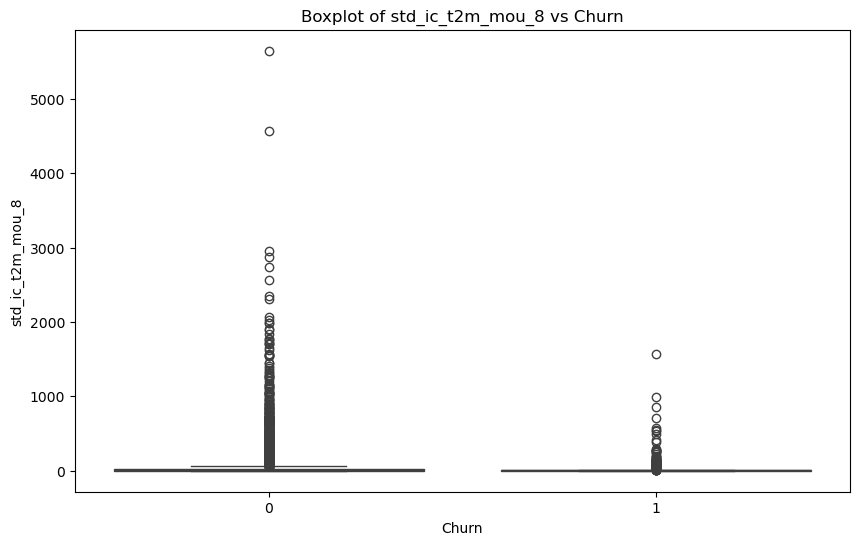

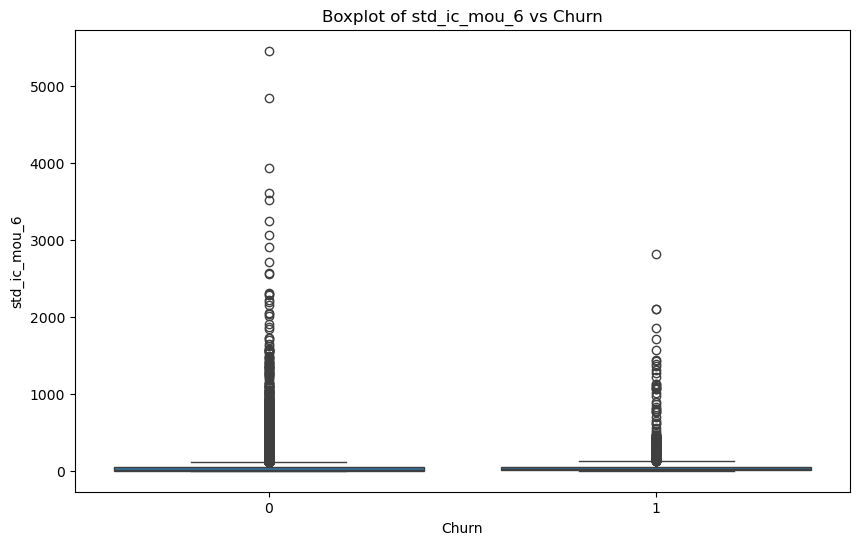

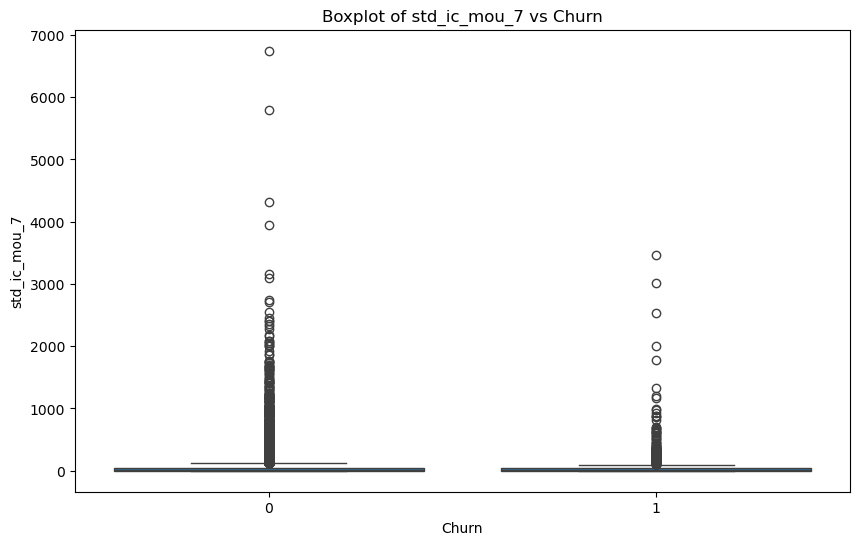

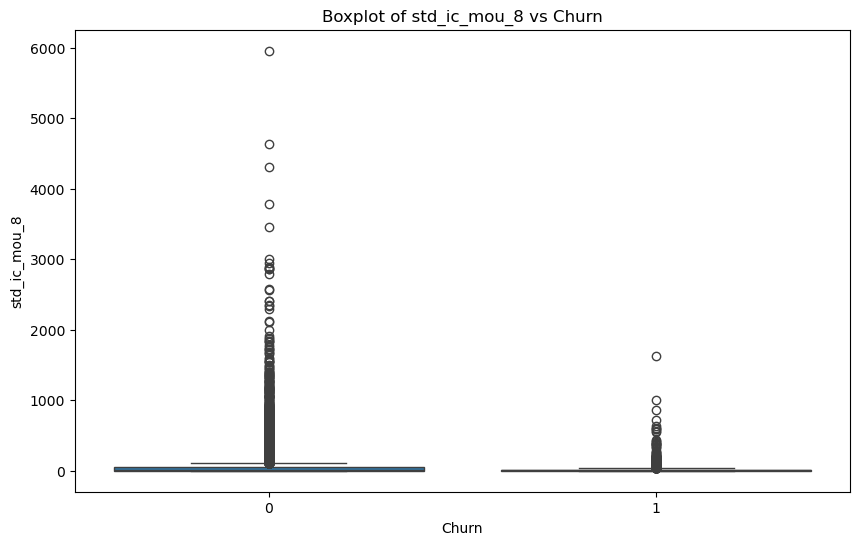

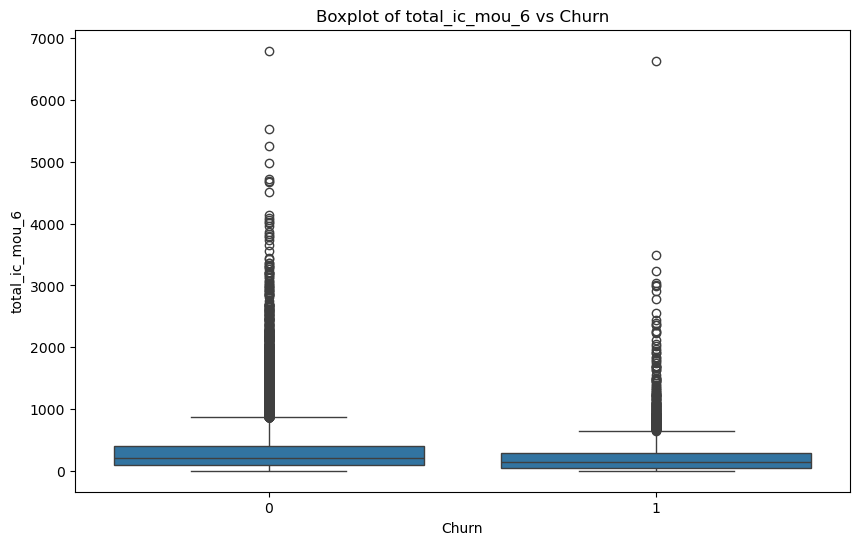

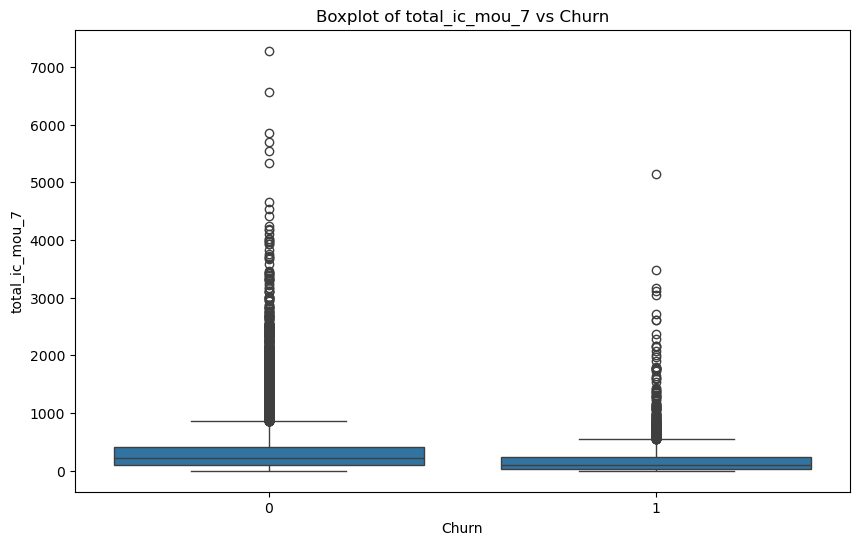

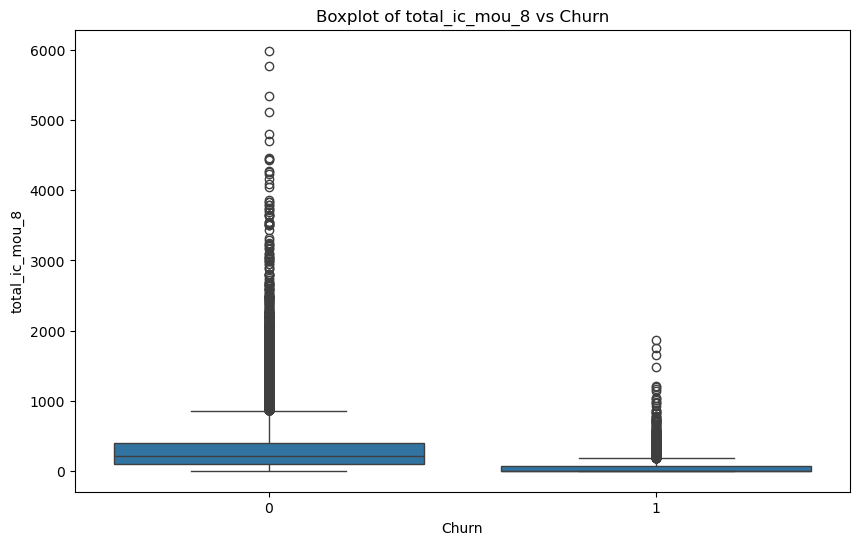

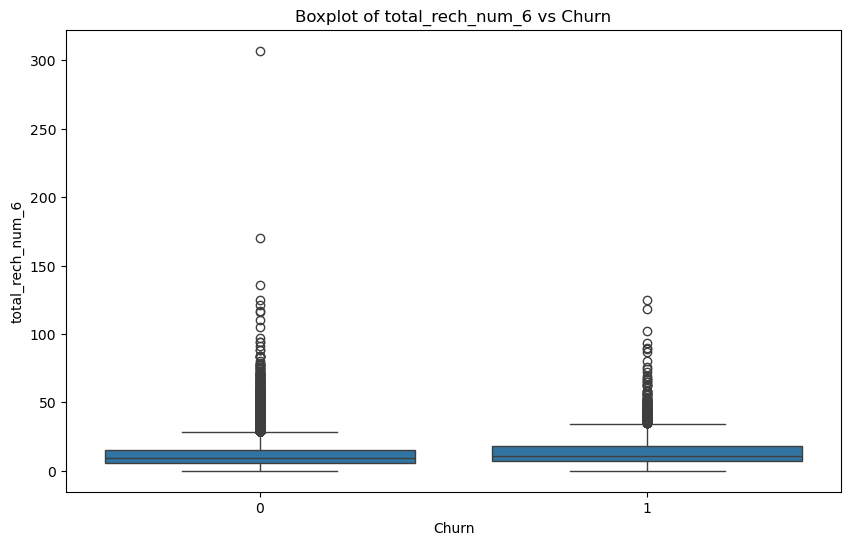

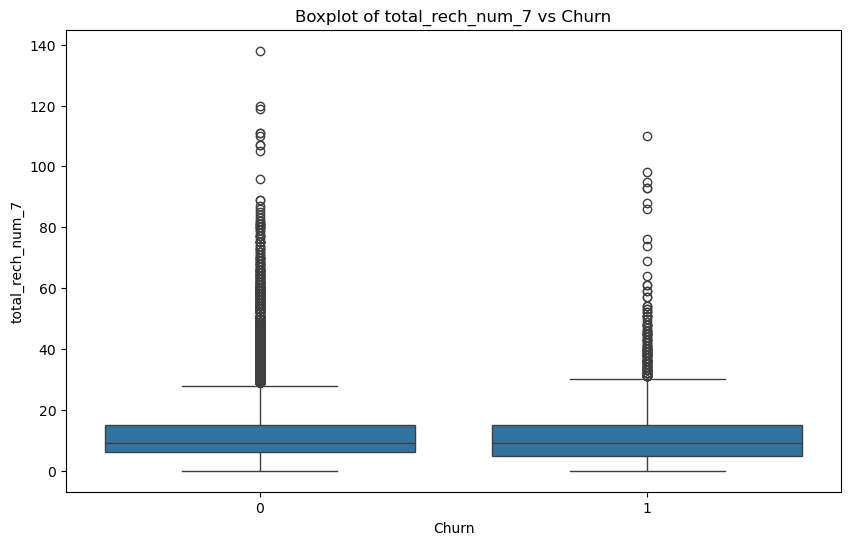

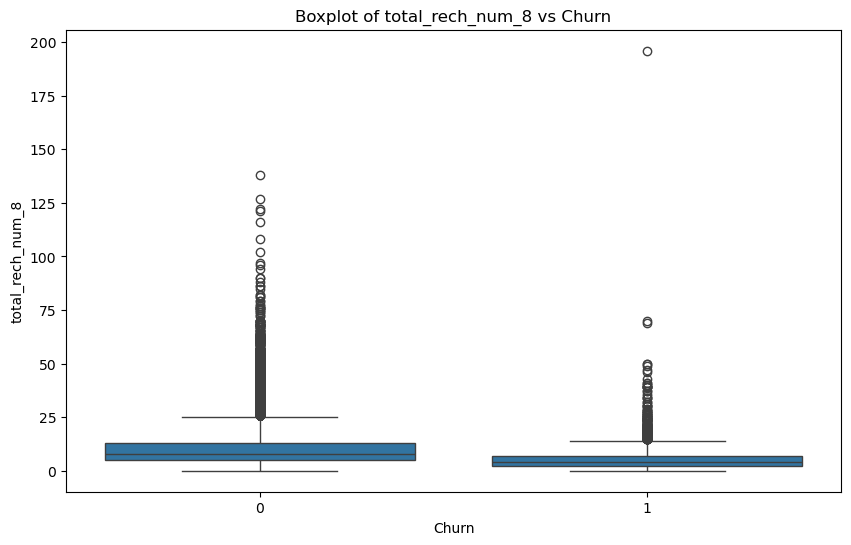

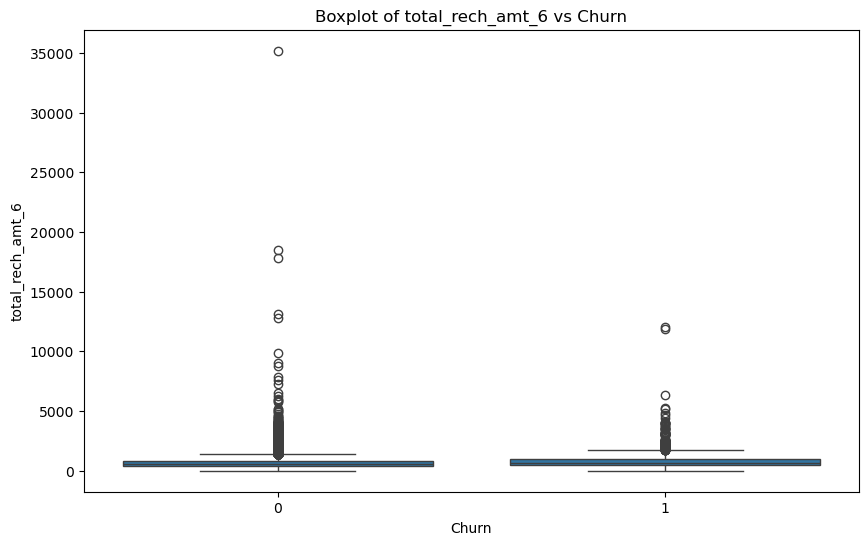

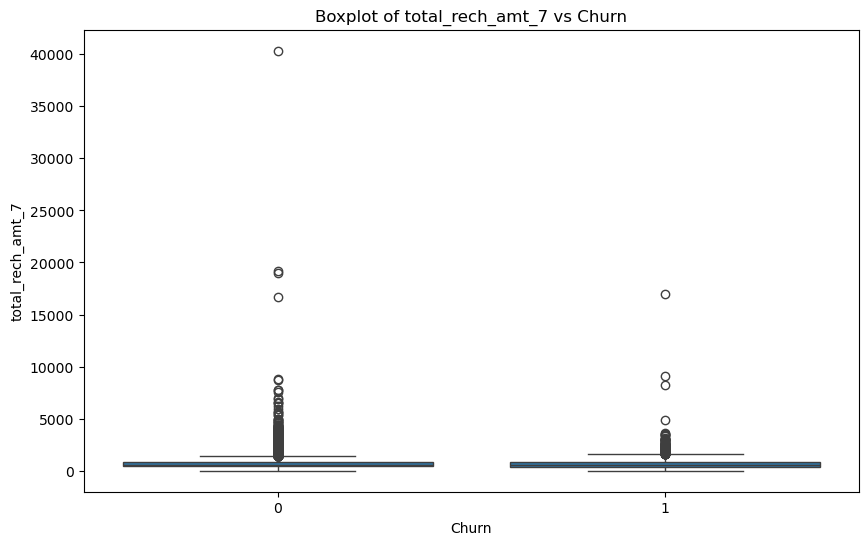

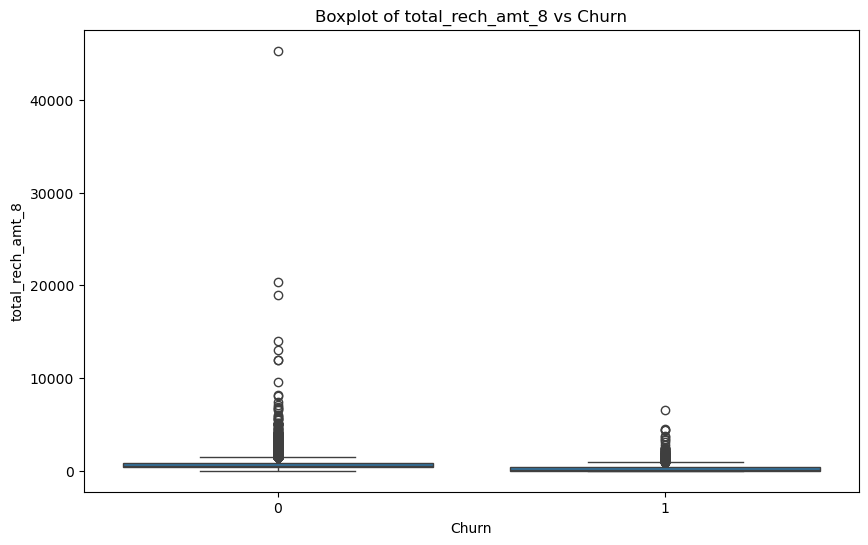

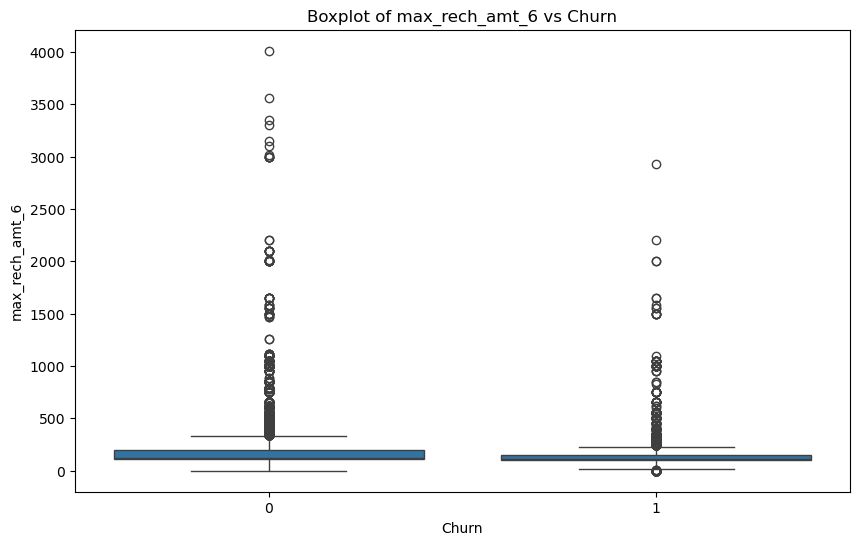

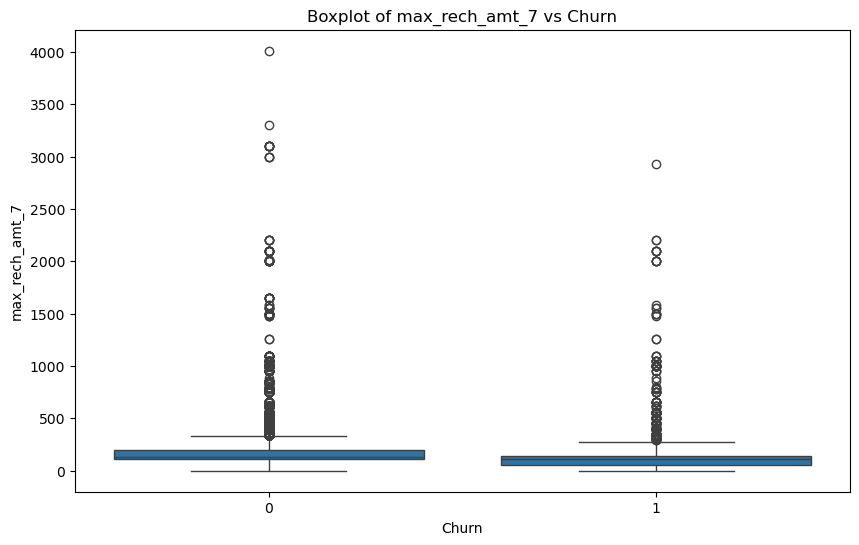

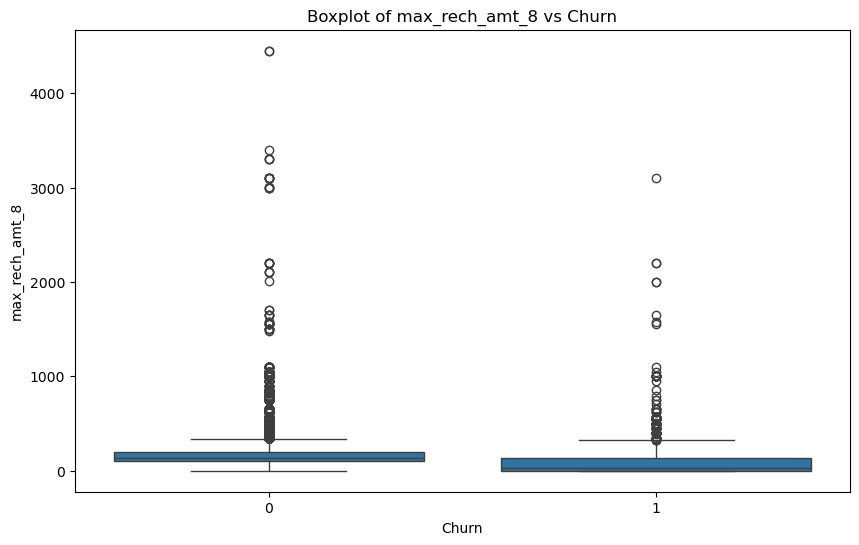

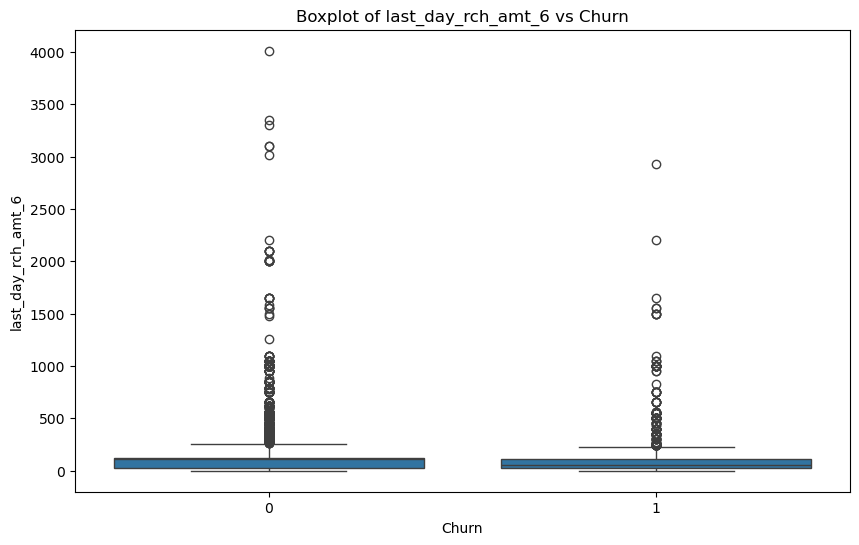

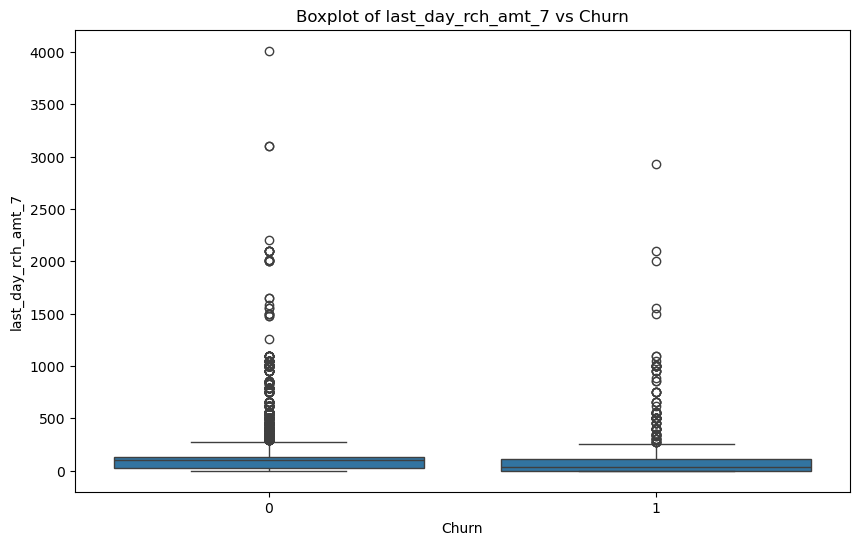

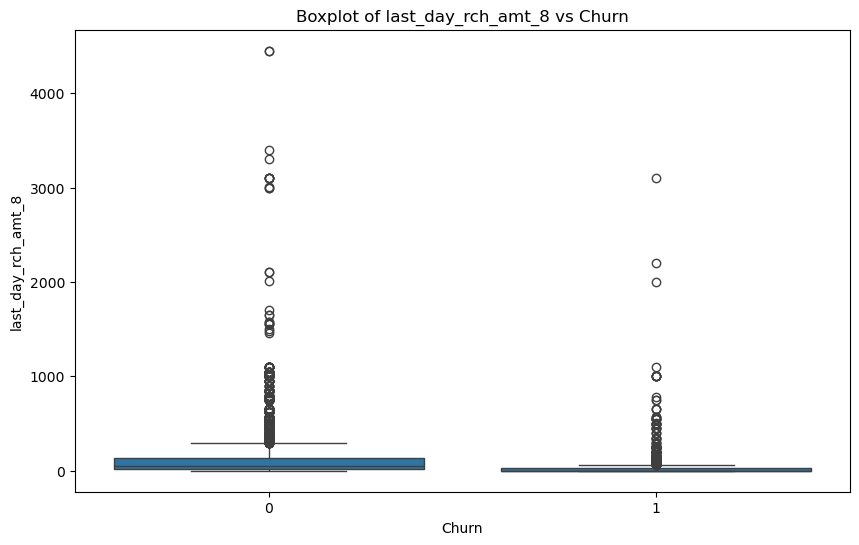

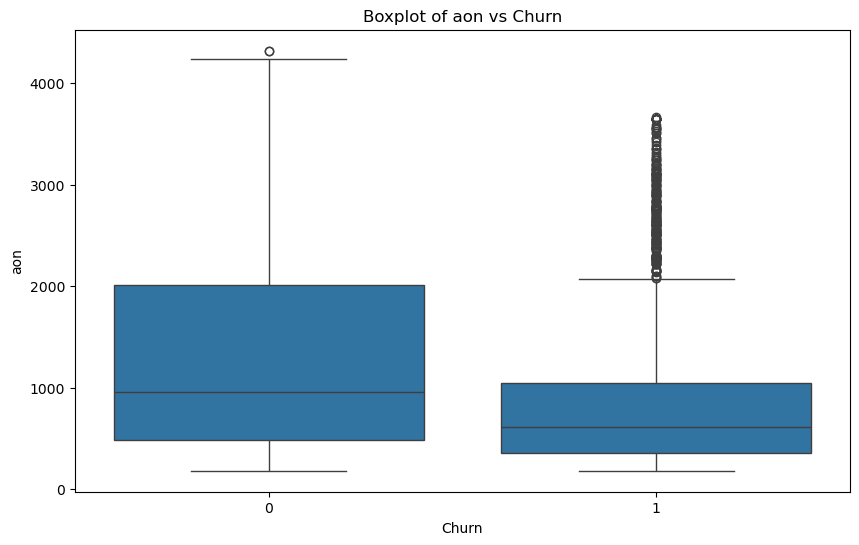

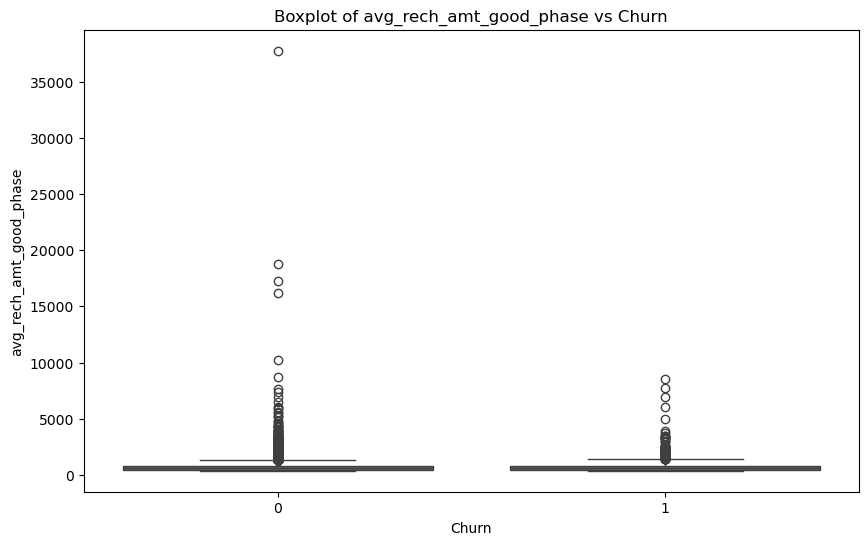

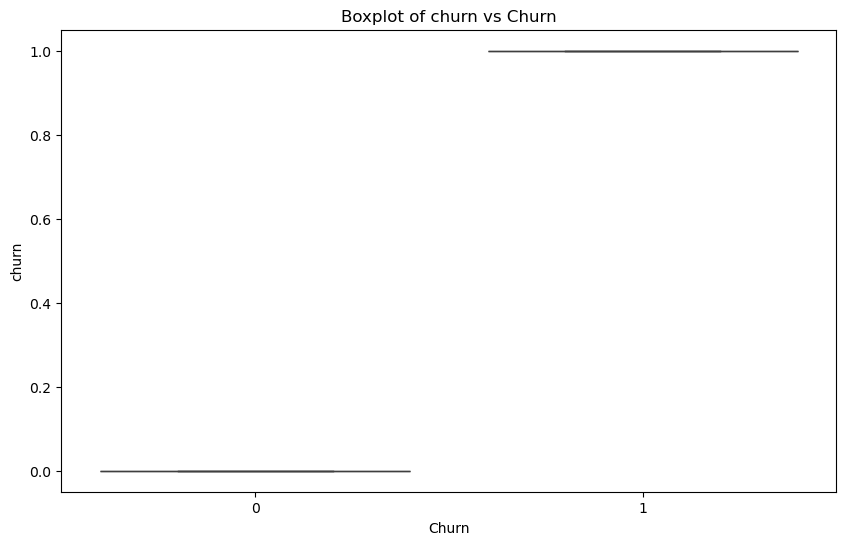

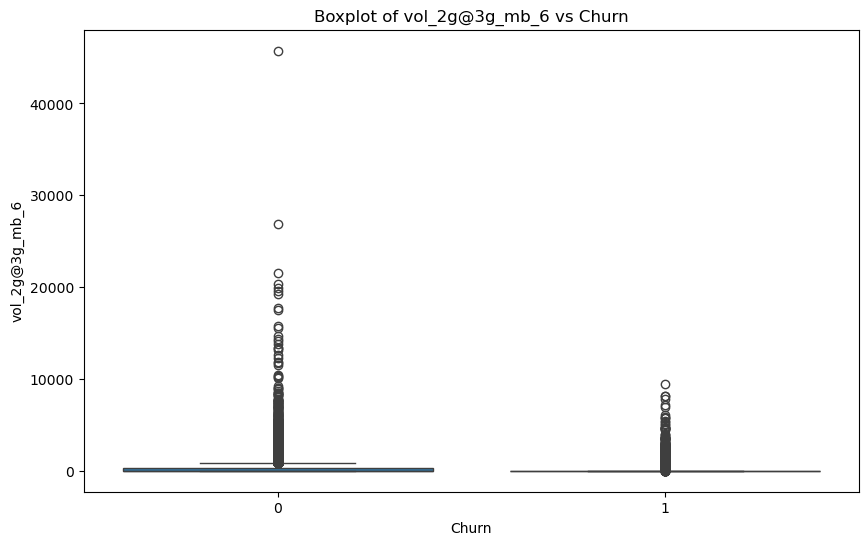

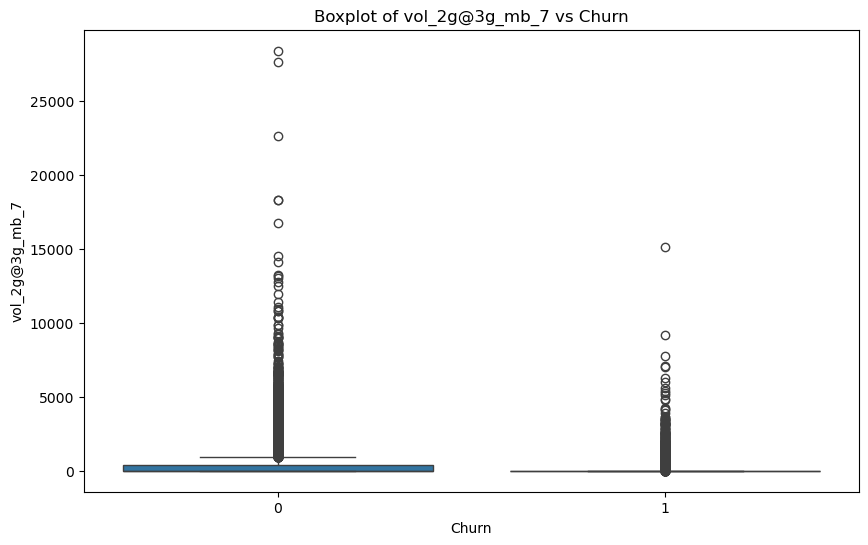

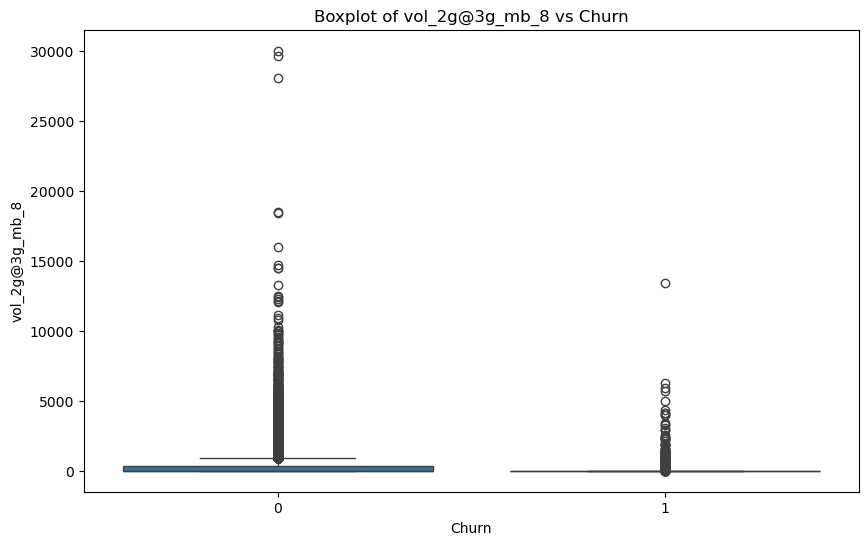

In [38]:
# Boxplots for numerical variables with churn
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=col, data=high_value_customers)
    plt.title(f"Boxplot of {col} vs Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()


In [39]:
# Summary statistics grouped by churn
churn_summary = high_value_customers.groupby('churn')[numerical_cols].describe().T
print(churn_summary)


churn                                     0             1
arpu_6                  count  27418.000000   2593.000000
                        mean     578.637360    678.716970
                        std      429.988265    551.792864
                        min    -2258.709000   -209.465000
                        25%      362.218000    396.507000
                        50%      489.324000    573.396000
                        75%      690.891750    819.460000
                        max    27731.088000  11505.508000
arpu_7                  count  27418.000000   2593.000000
                        mean     592.788162    550.511946
                        std      457.265996    517.241221
                        min    -2014.045000   -158.963000
                        25%      369.610500    289.641000
                        50%      496.182500    464.674000
                        75%      701.418000    691.588000
                        max    35145.834000  13224.119000
arpu_8        

Correlation with Churn:
 churn                      1.000000
std_og_mou_6               0.140127
std_og_t2m_mou_6           0.107309
total_og_mou_6             0.084416
onnet_mou_6                0.077345
total_rech_num_6           0.072270
offnet_mou_6               0.067125
arpu_6                     0.063513
total_rech_amt_6           0.063337
std_og_mou_7               0.055546
std_og_t2m_mou_7           0.044461
std_ic_mou_6               0.018757
avg_rech_amt_good_phase    0.016692
onnet_mou_7                0.011338
std_ic_t2m_mou_6           0.010586
offnet_mou_7               0.000487
last_day_rch_amt_6        -0.006976
max_rech_amt_6            -0.008532
total_rech_num_7          -0.009651
std_ic_mou_7              -0.012129
total_og_mou_7            -0.014031
std_ic_t2m_mou_7          -0.014138
arpu_7                    -0.025660
vol_2g@3g_mb_6            -0.029372
total_rech_amt_7          -0.031739
max_rech_amt_7            -0.032289
loc_og_t2t_mou_6          -0.036279
loc

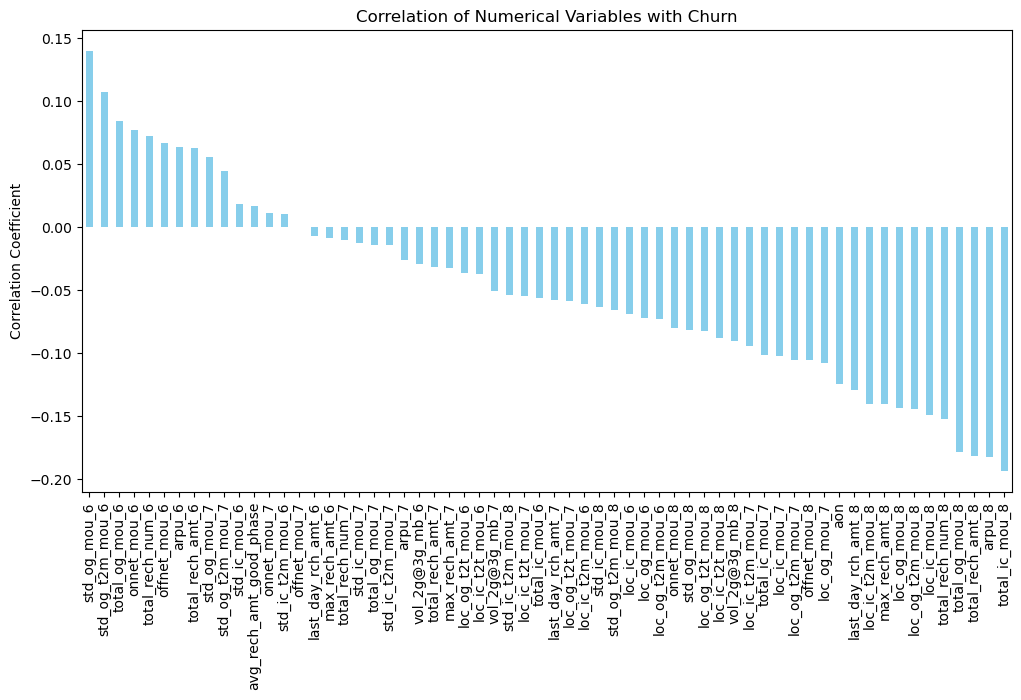

In [40]:
# Correlation of numerical variables with churn
correlation_with_target = high_value_customers.corr()['churn'].sort_values(ascending=False)
print("Correlation with Churn:\n", correlation_with_target)

# Bar plot of correlations
plt.figure(figsize=(12, 6))
correlation_with_target.drop('churn').plot(kind='bar', color='skyblue')
plt.title("Correlation of Numerical Variables with Churn")
plt.ylabel("Correlation Coefficient")
plt.show()


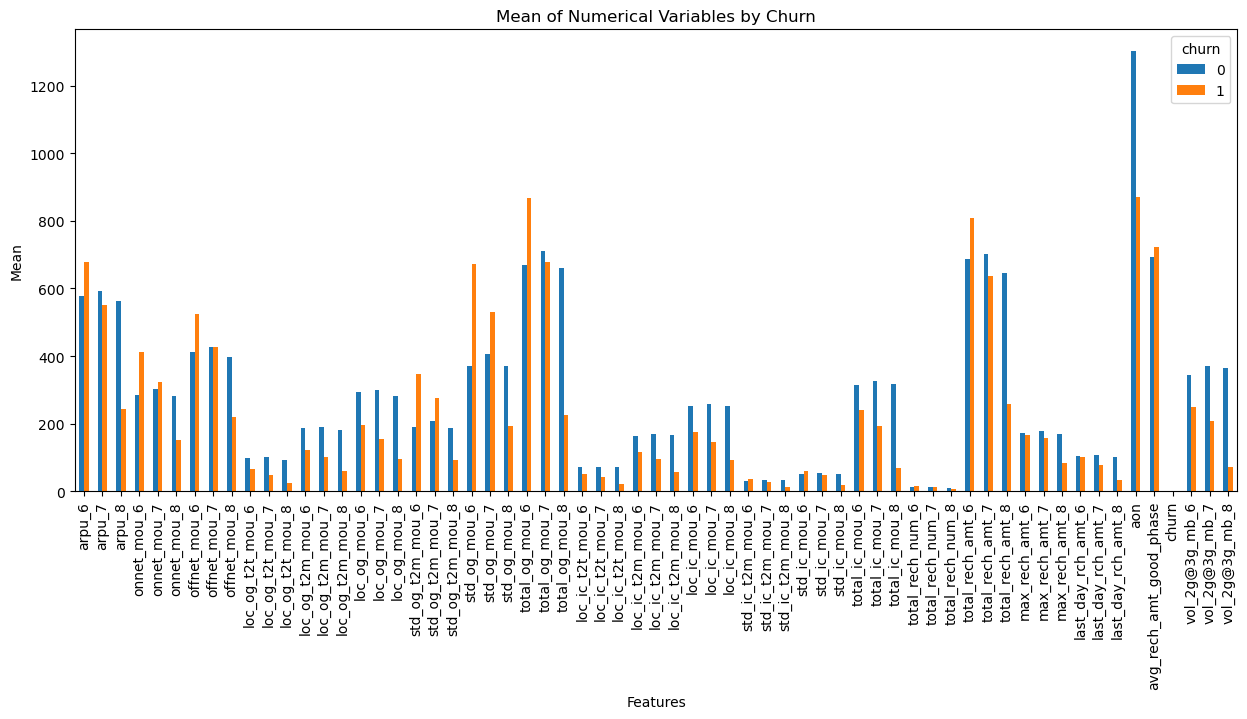

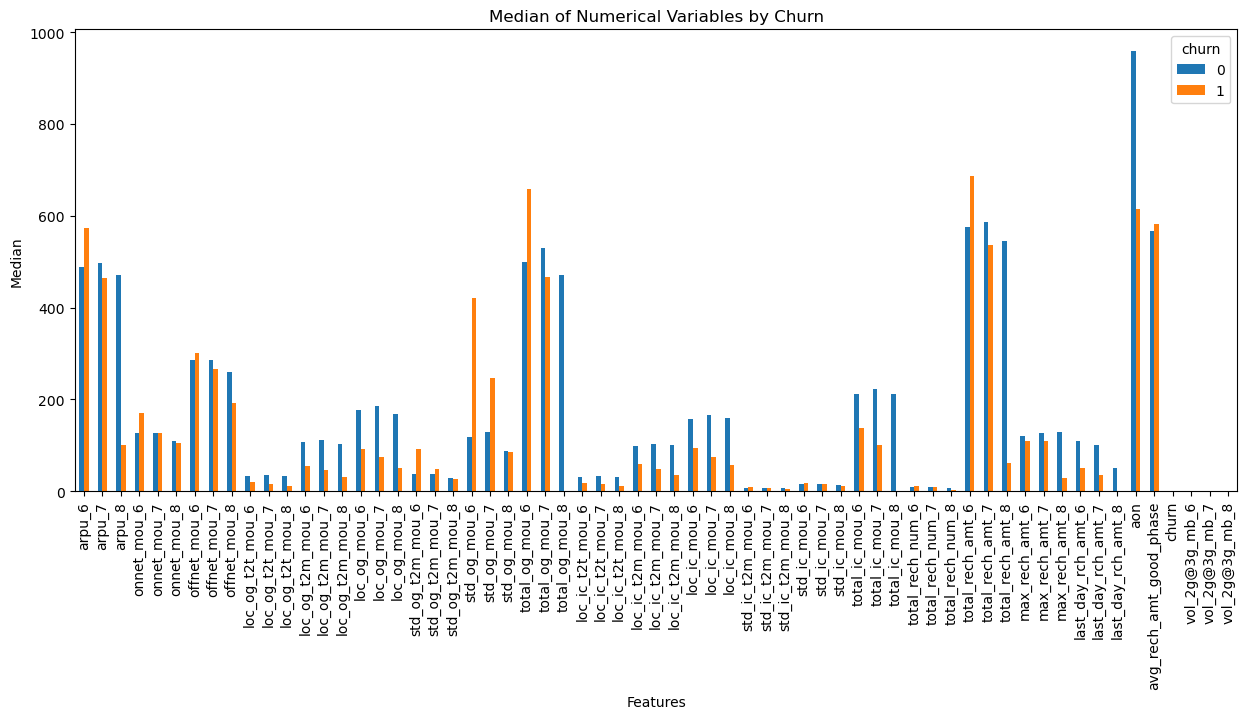

In [41]:
# Compare mean/median for each numerical variable by churn
churn_means = high_value_customers.groupby('churn')[numerical_cols].mean().T
churn_medians = high_value_customers.groupby('churn')[numerical_cols].median().T

# Visualize means
churn_means.plot(kind='bar', figsize=(15, 6), title="Mean of Numerical Variables by Churn")
plt.ylabel("Mean")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()

# Visualize medians
churn_medians.plot(kind='bar', figsize=(15, 6), title="Median of Numerical Variables by Churn")
plt.ylabel("Median")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()


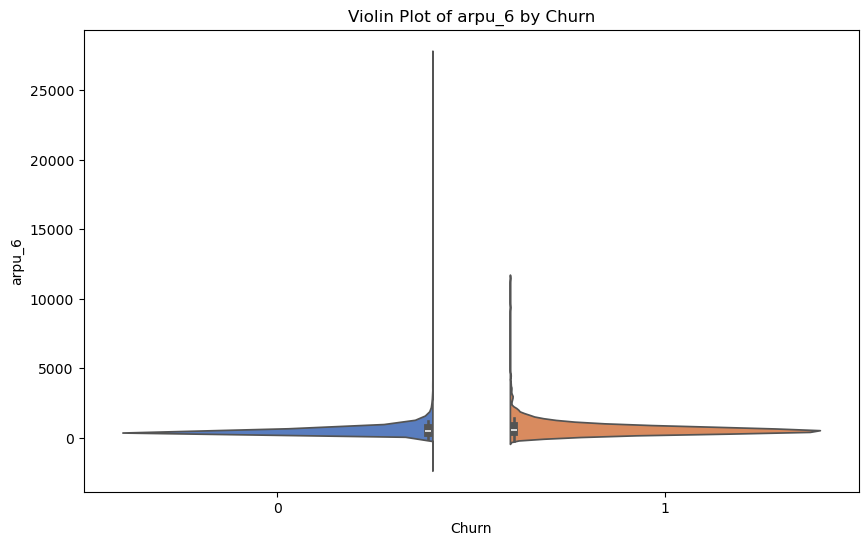

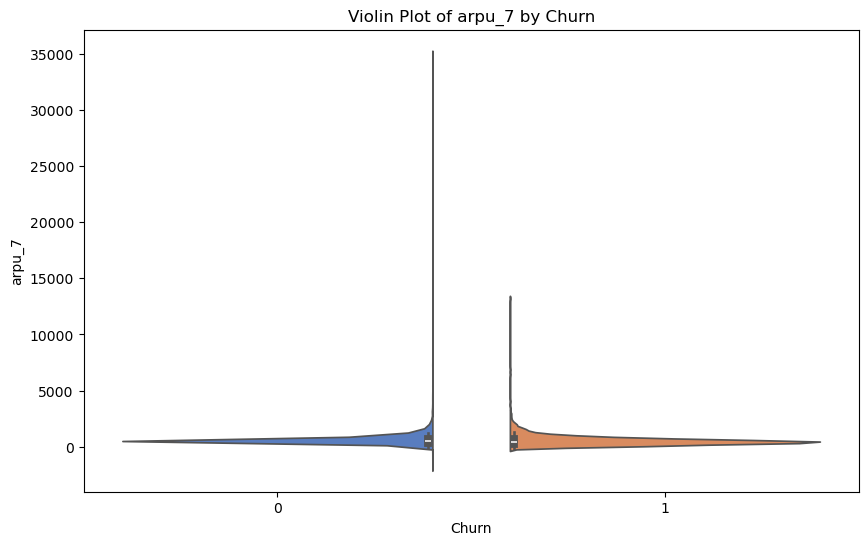

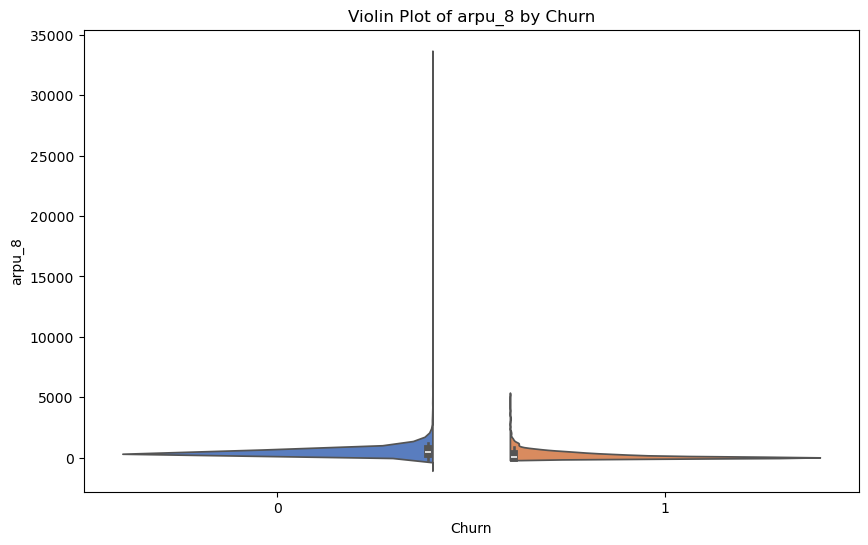

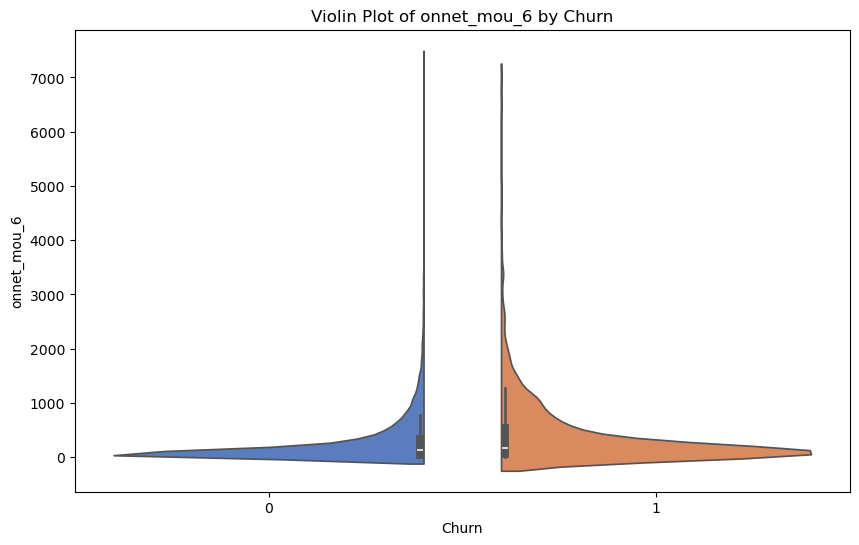

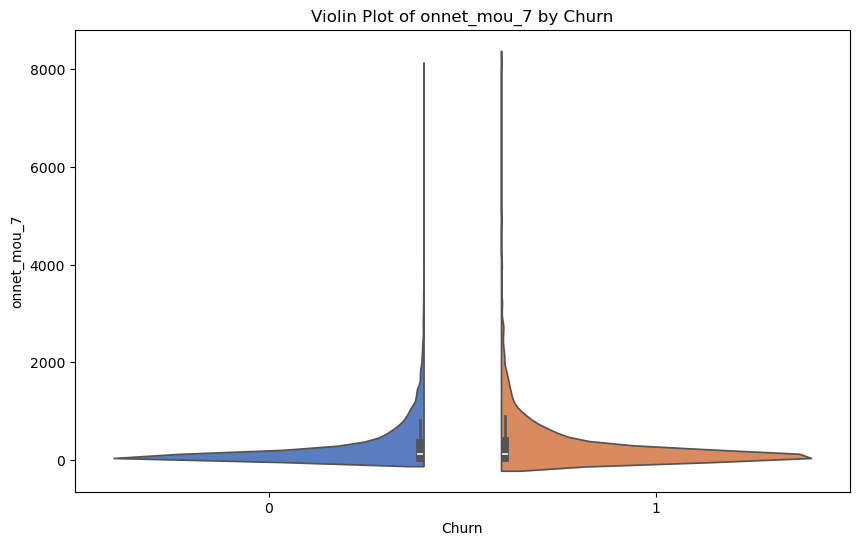

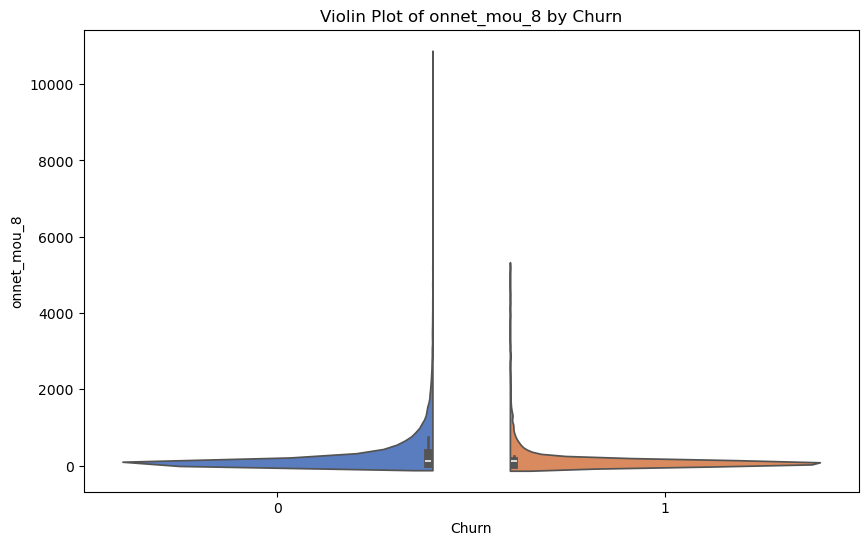

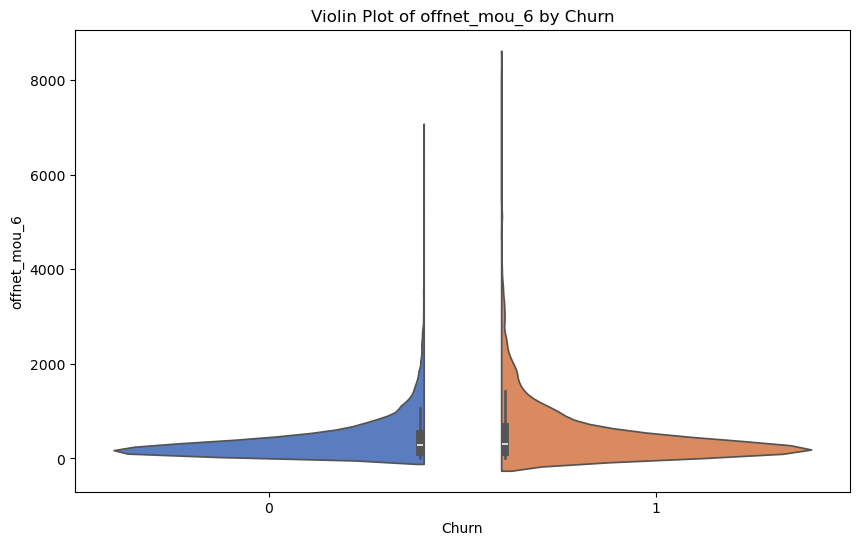

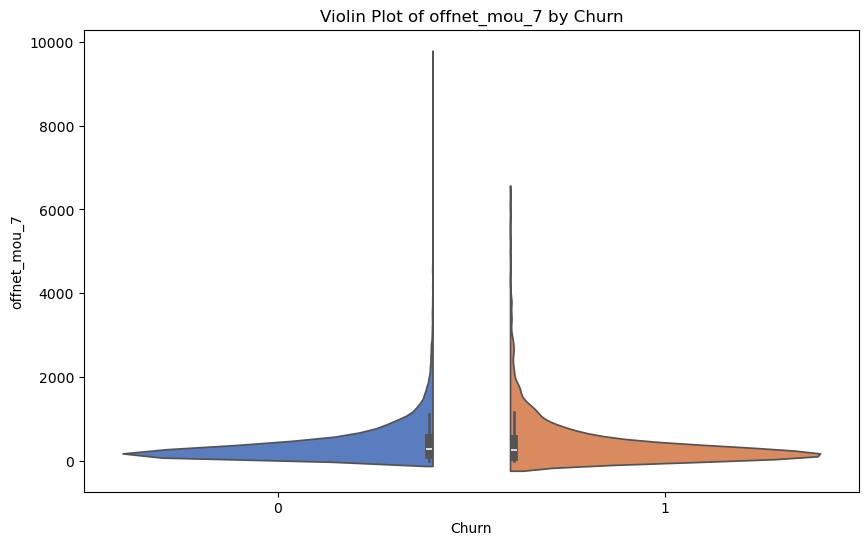

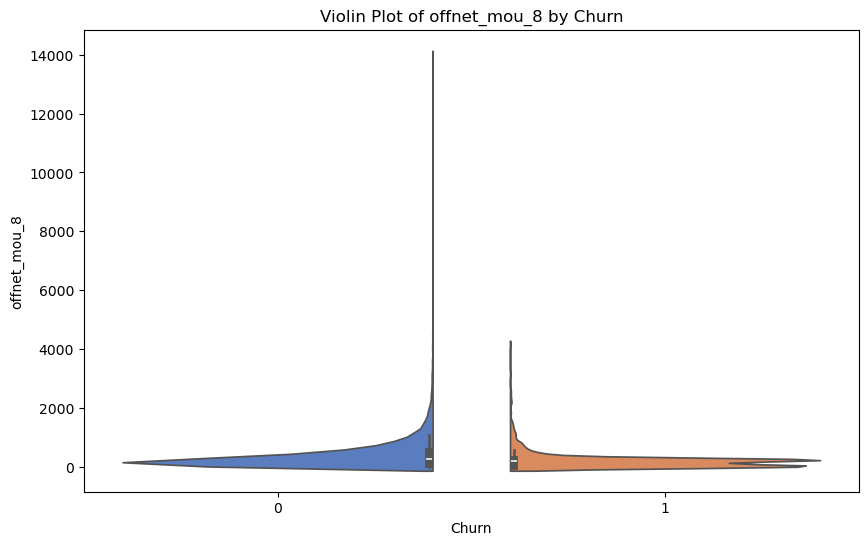

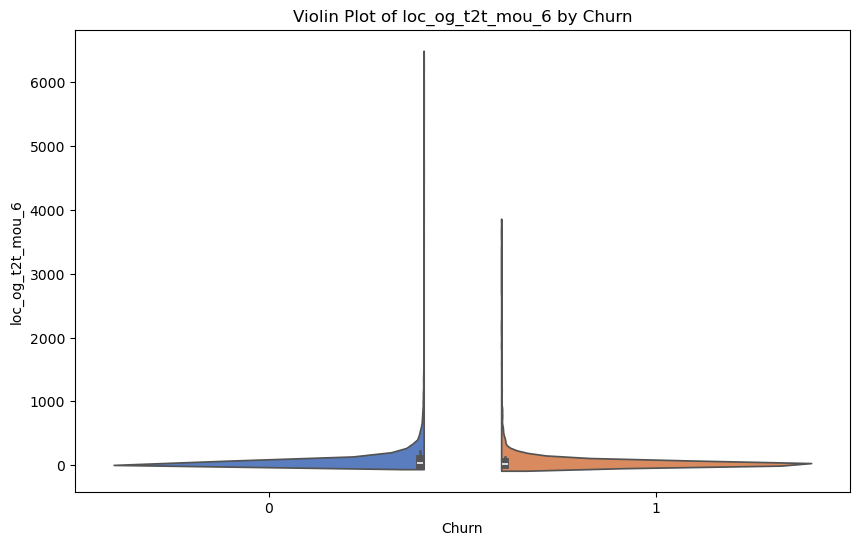

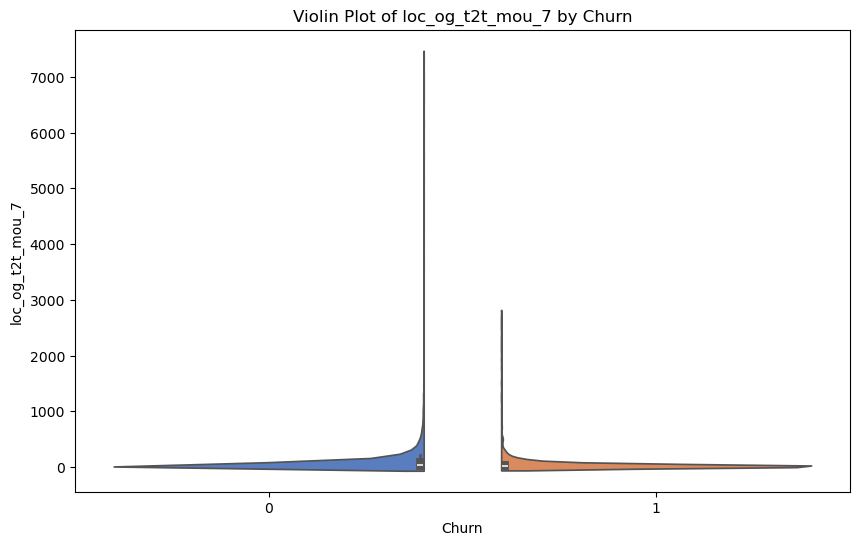

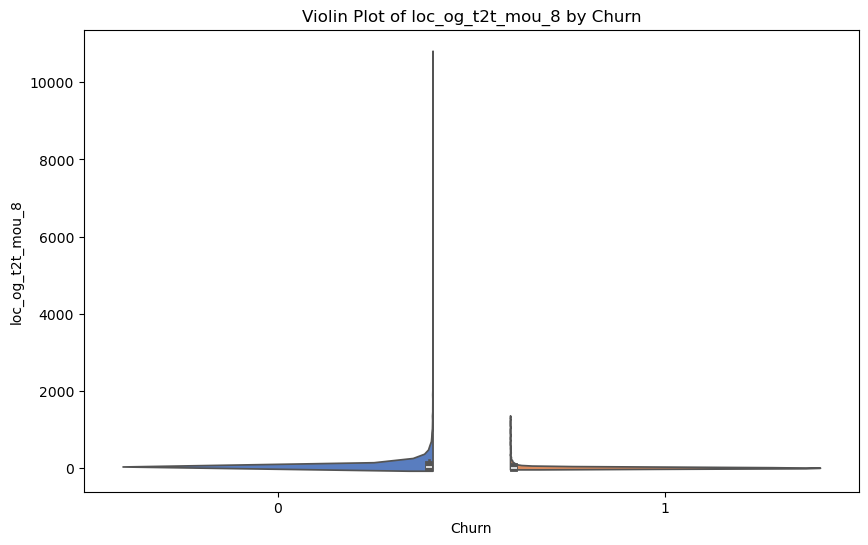

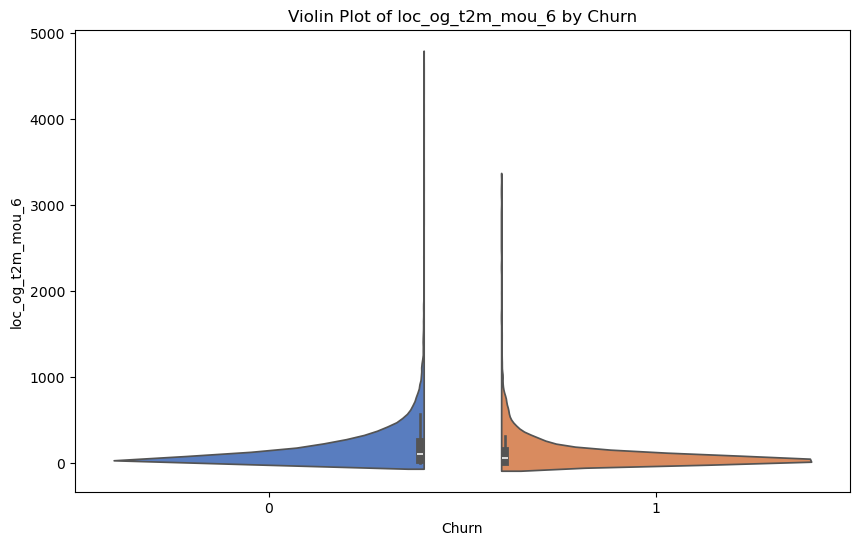

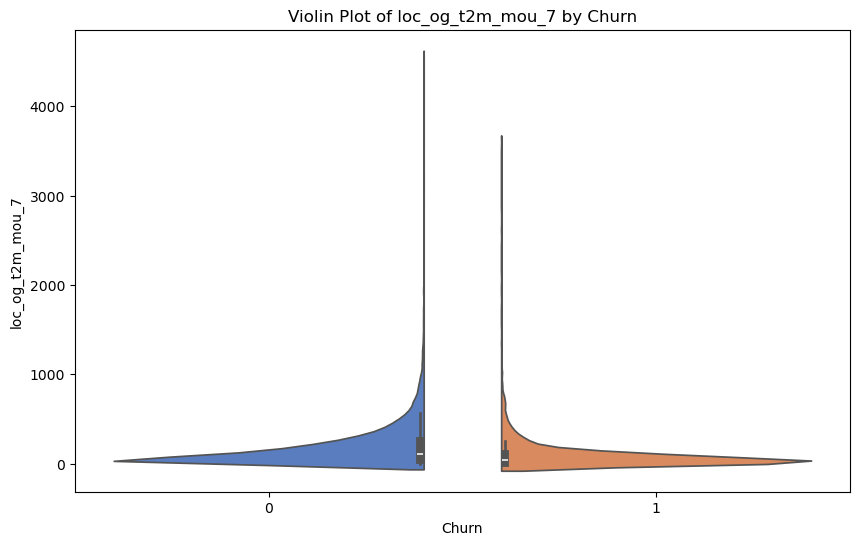

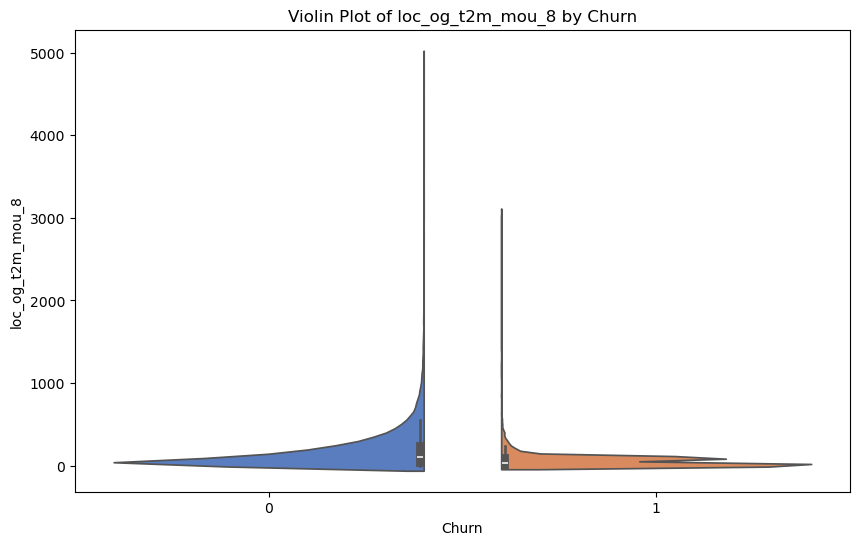

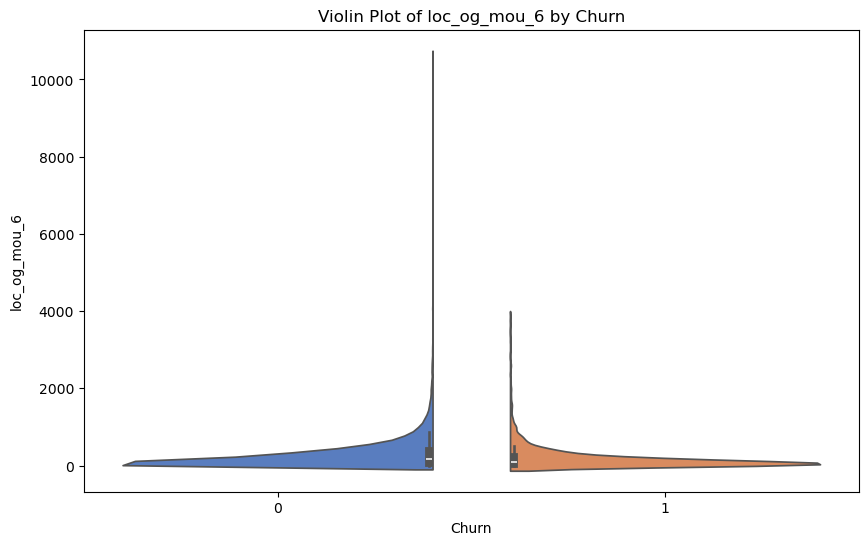

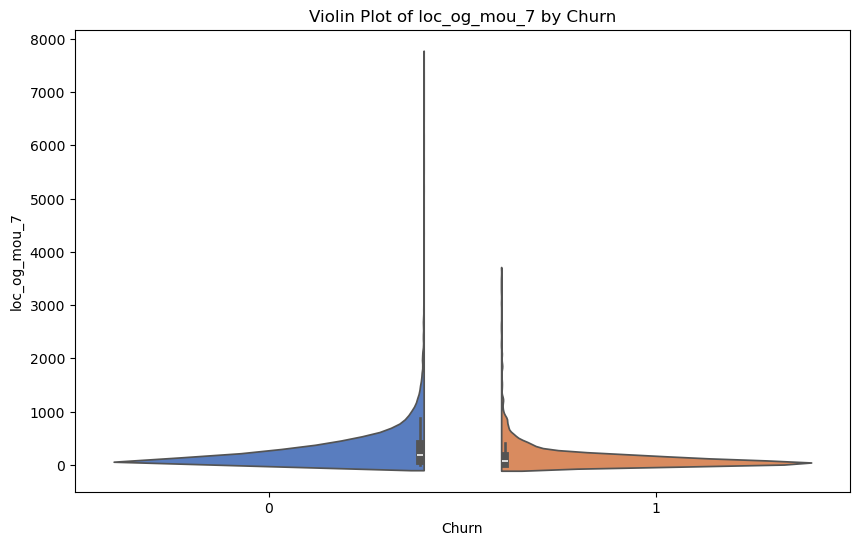

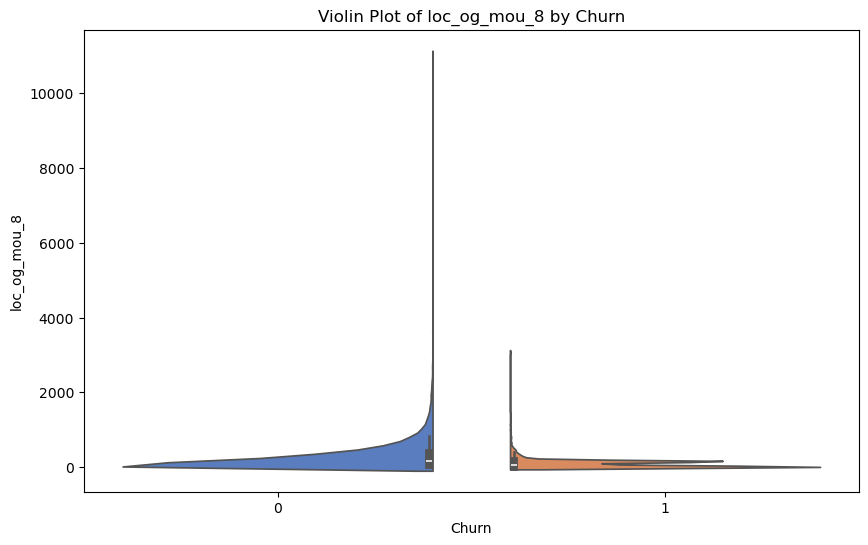

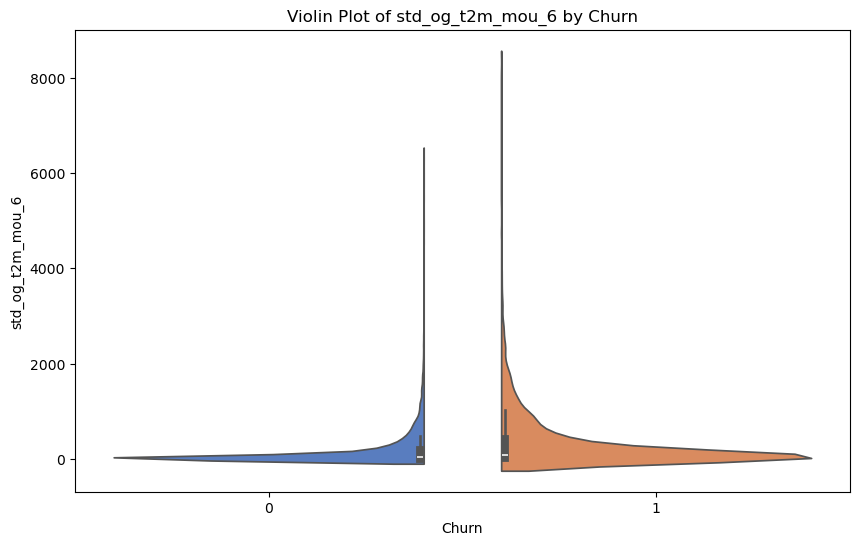

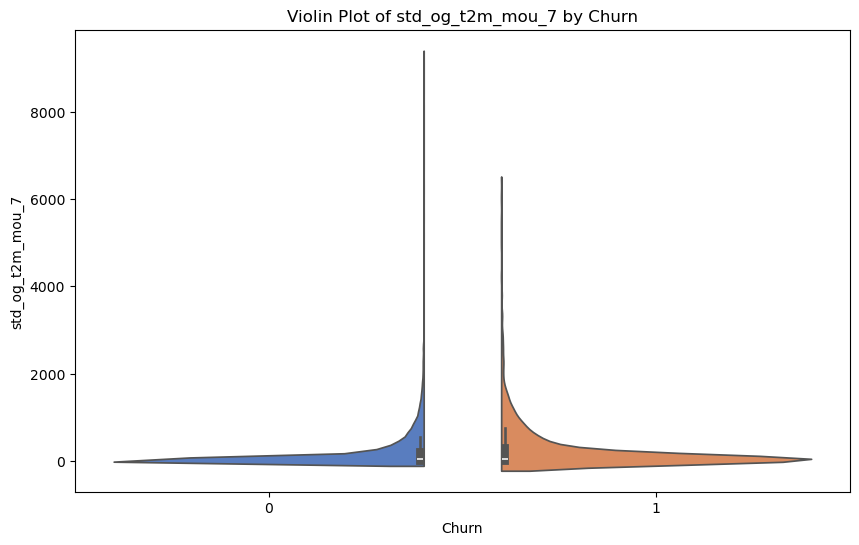

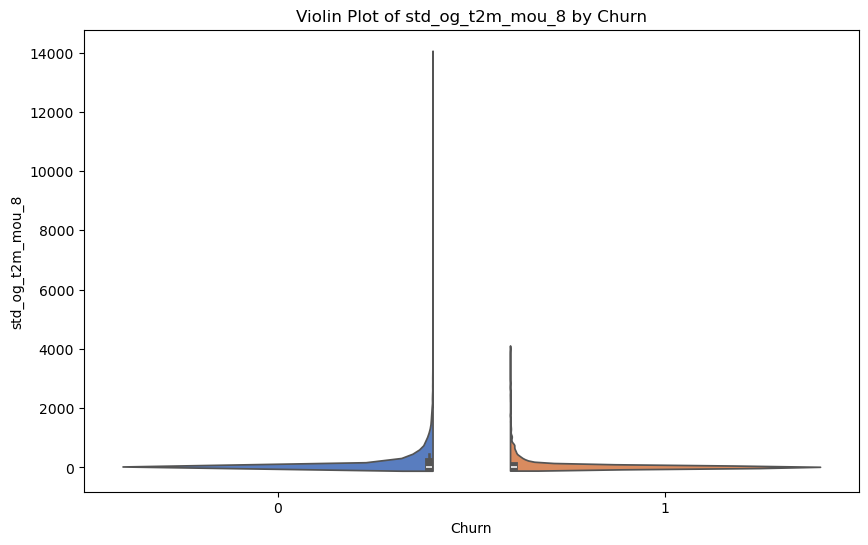

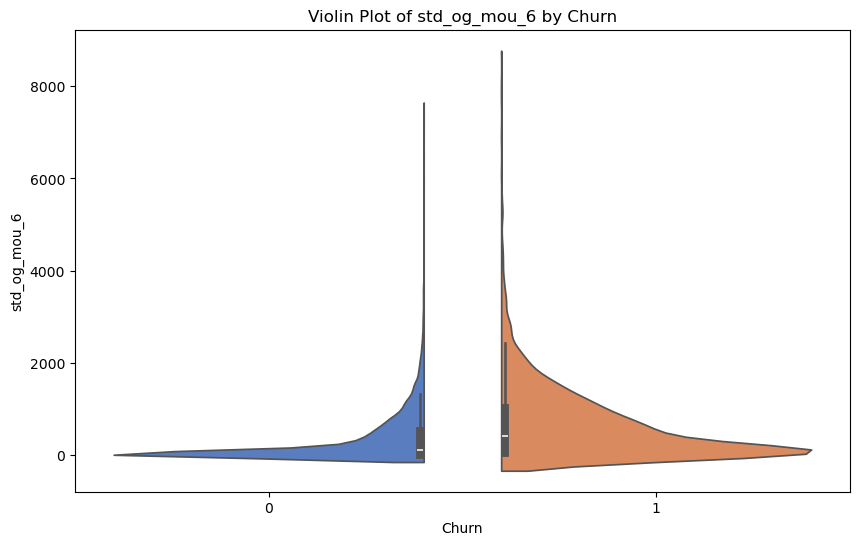

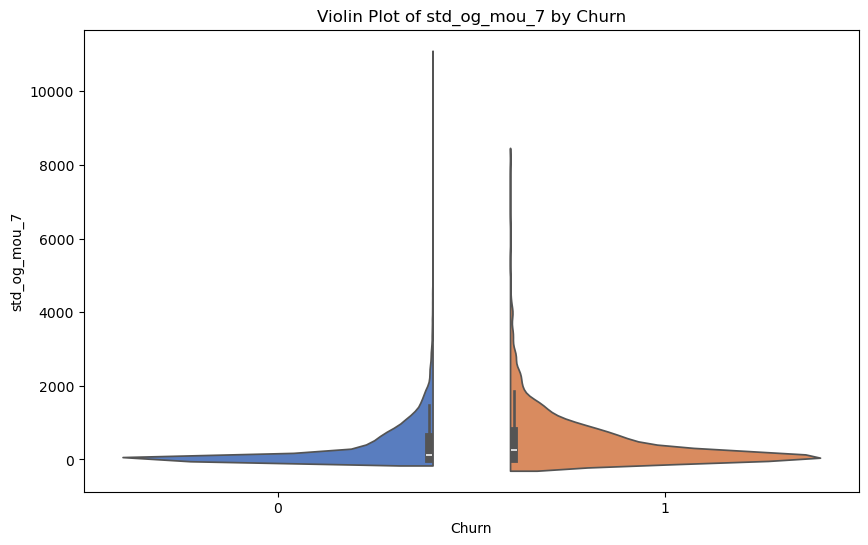

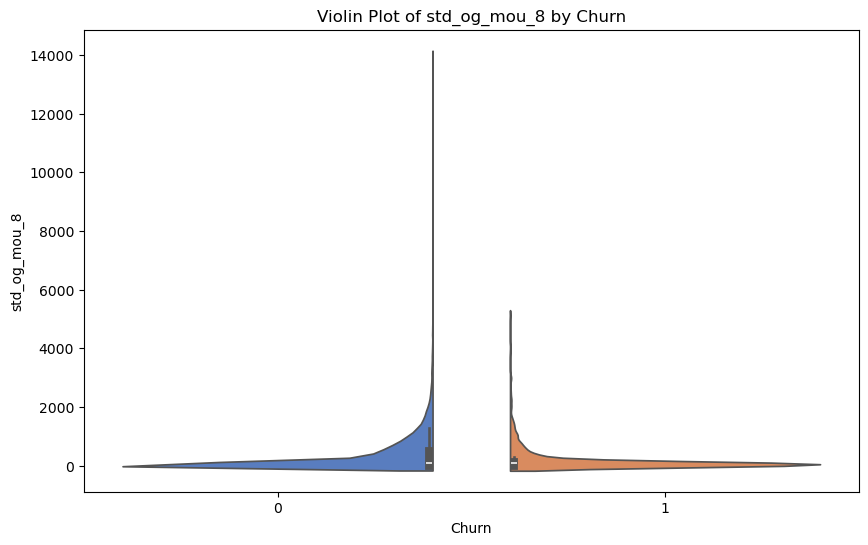

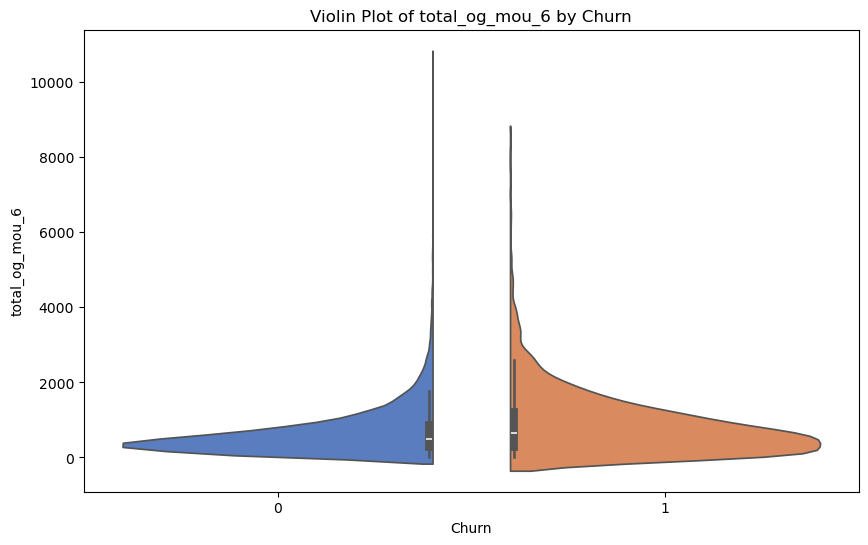

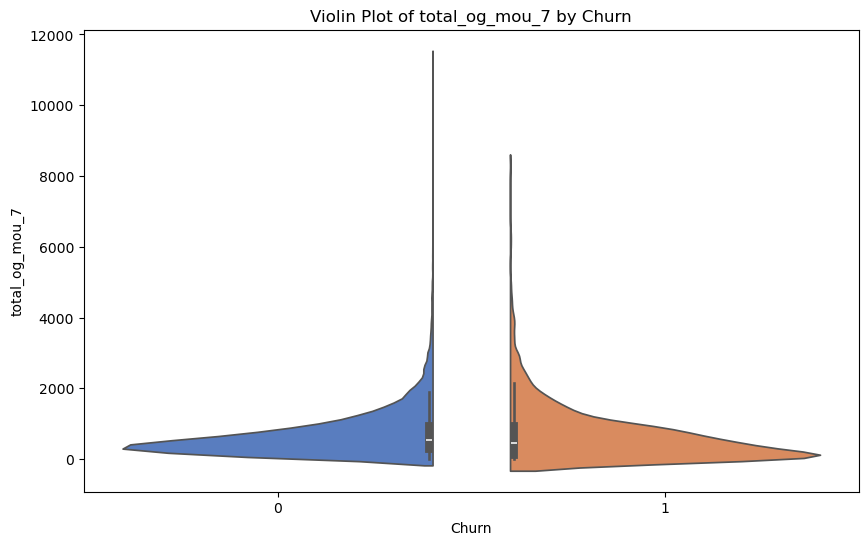

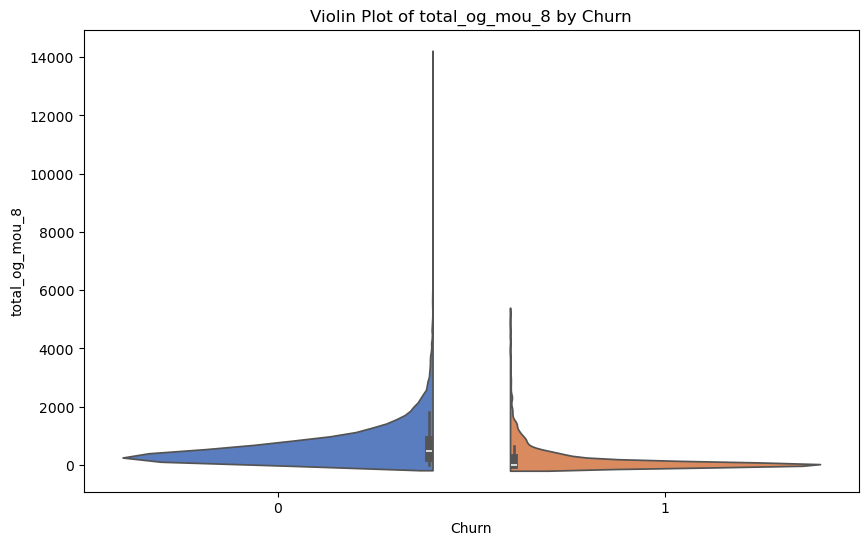

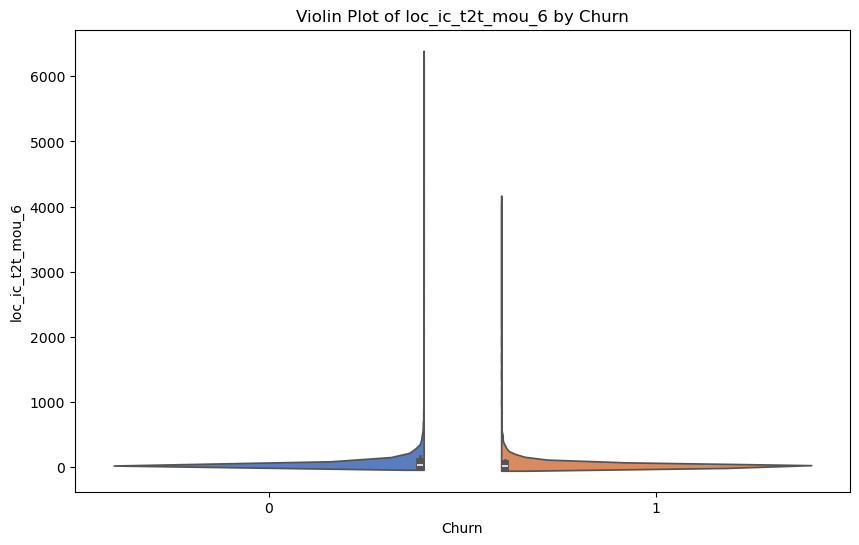

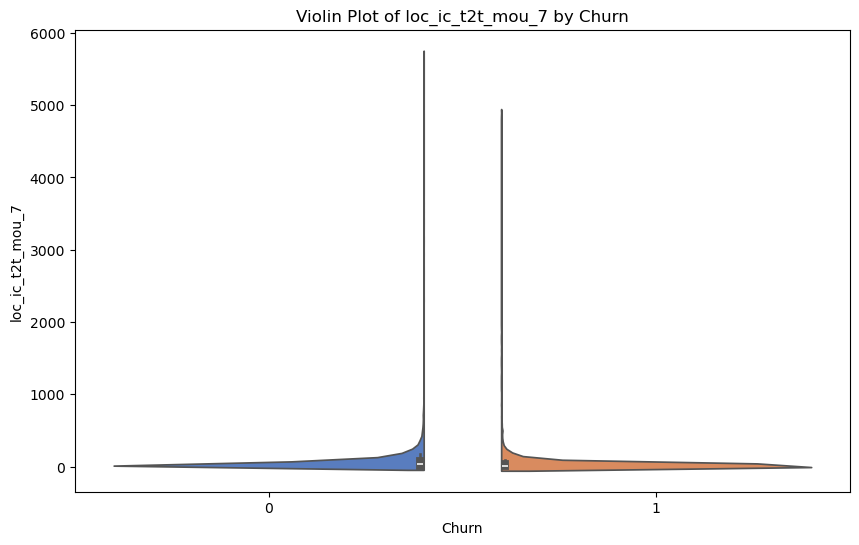

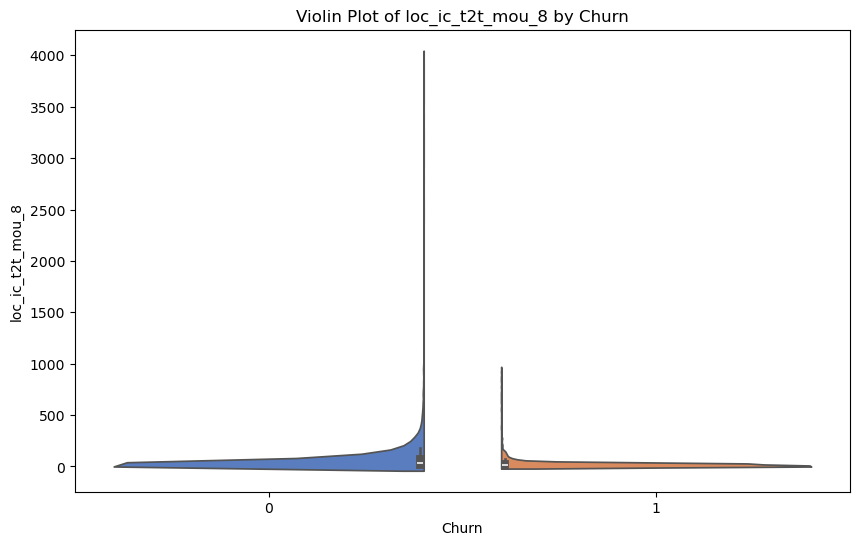

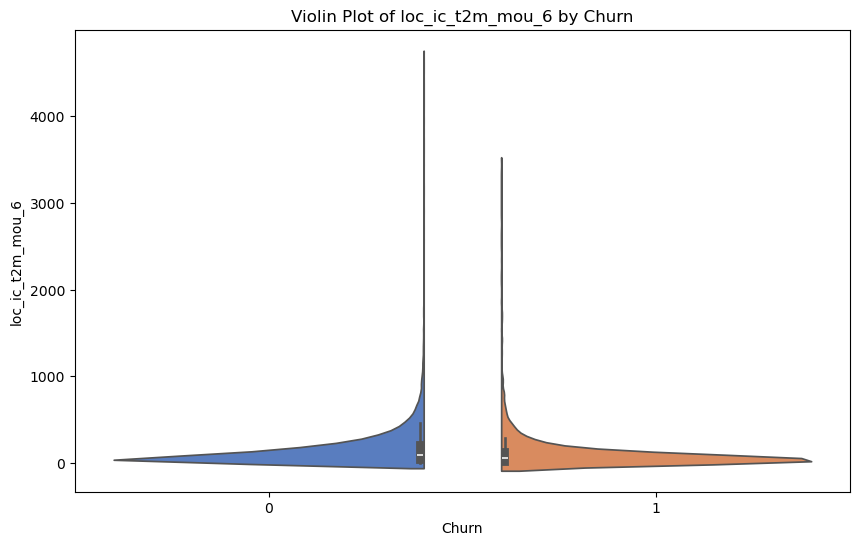

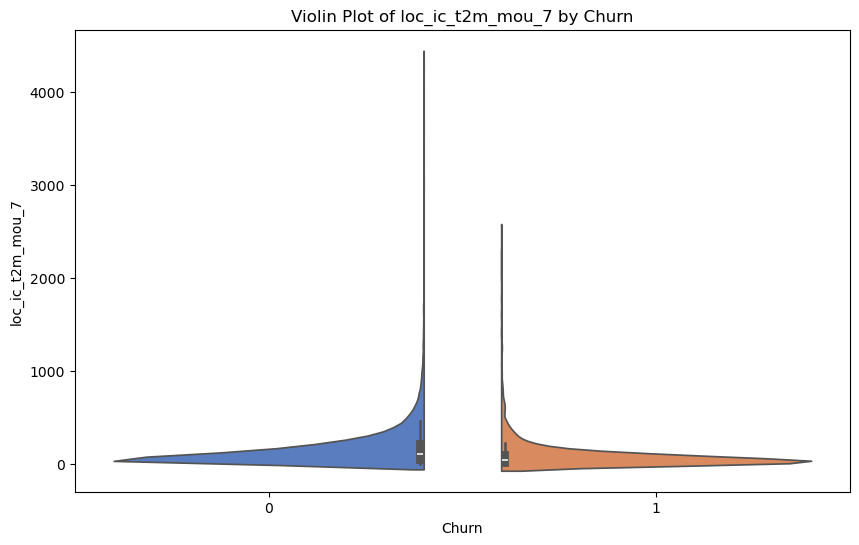

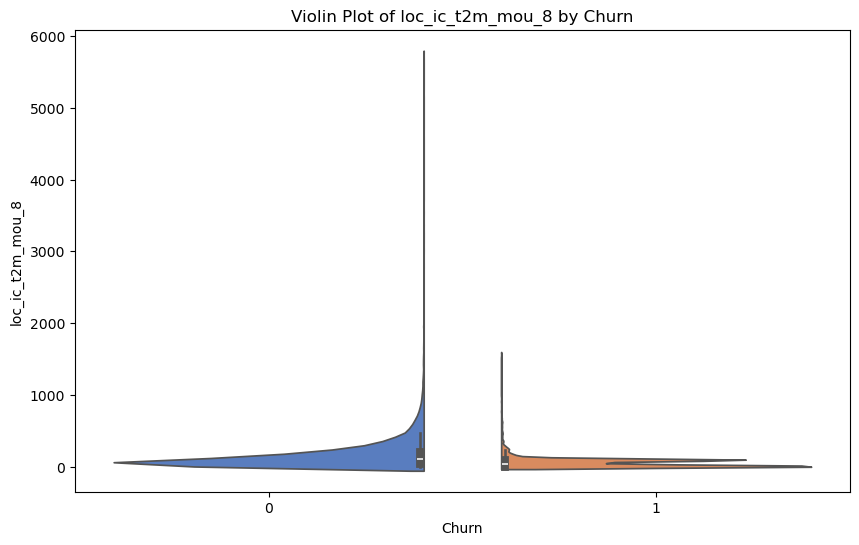

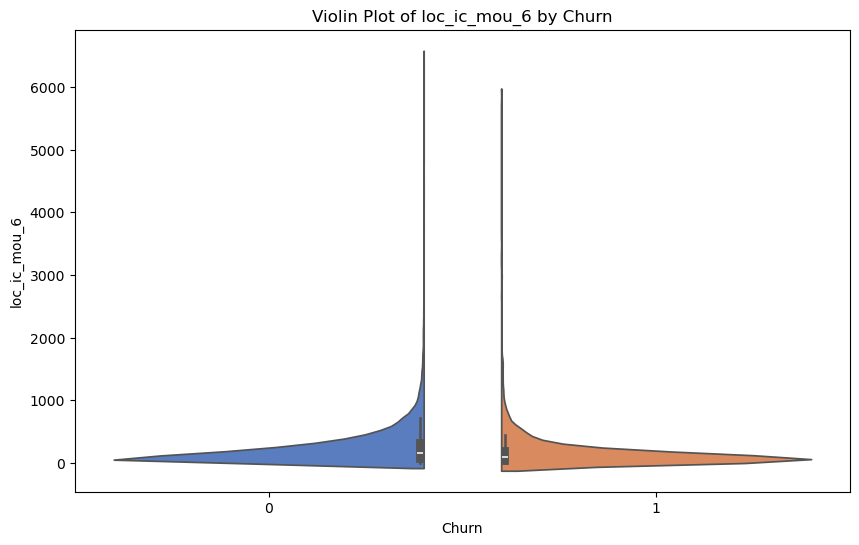

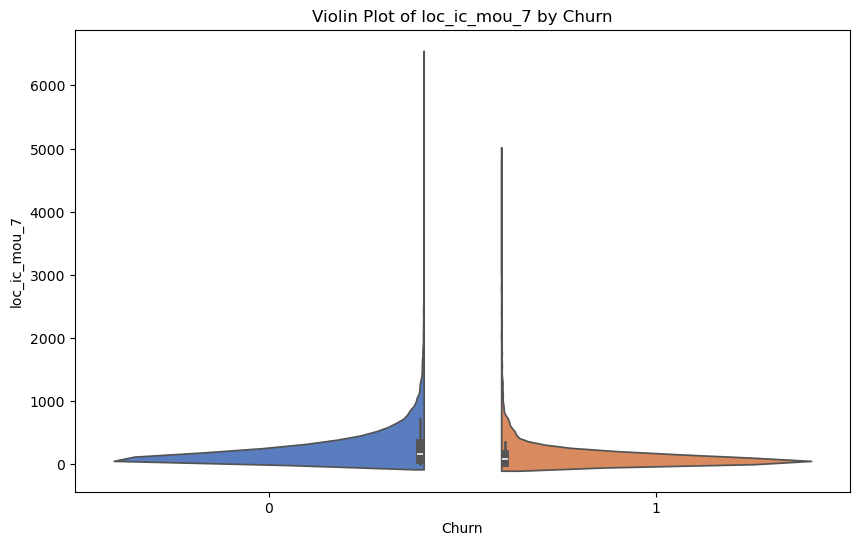

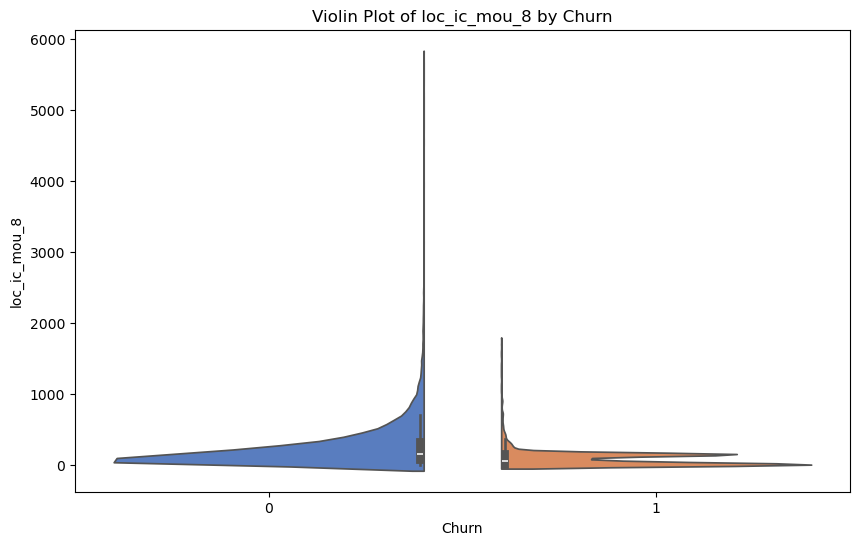

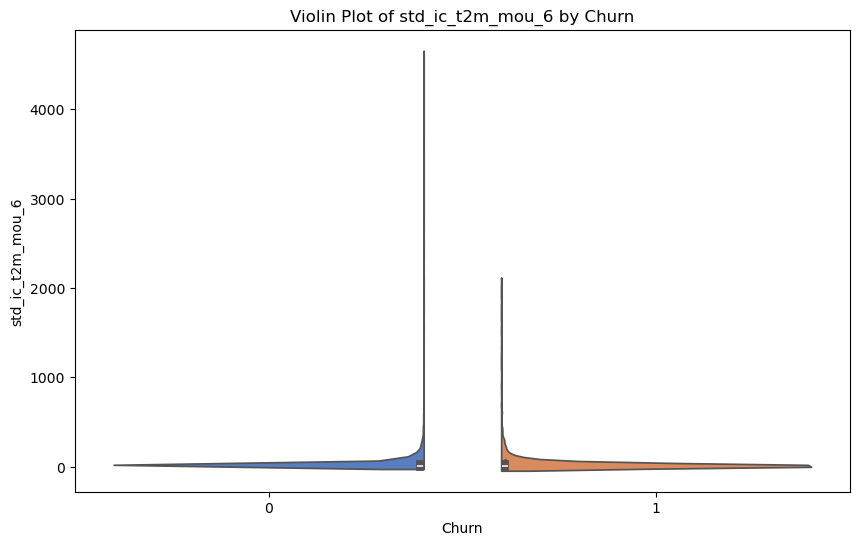

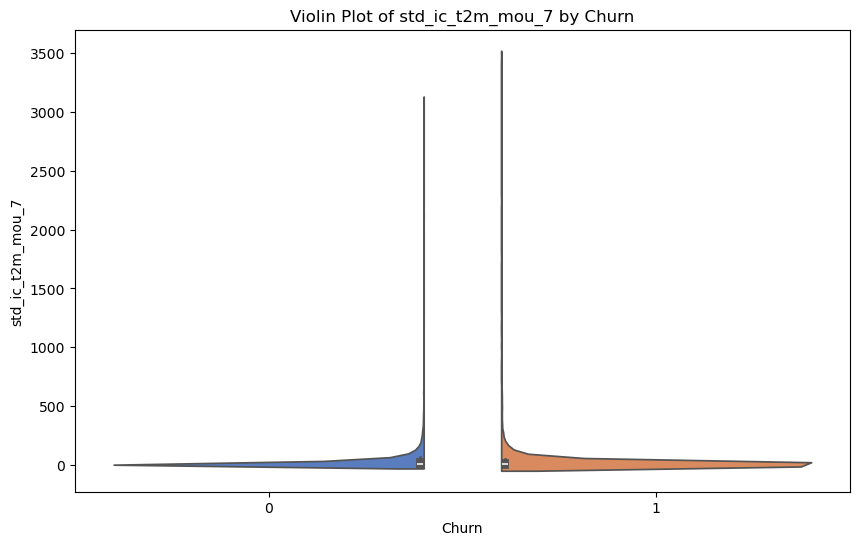

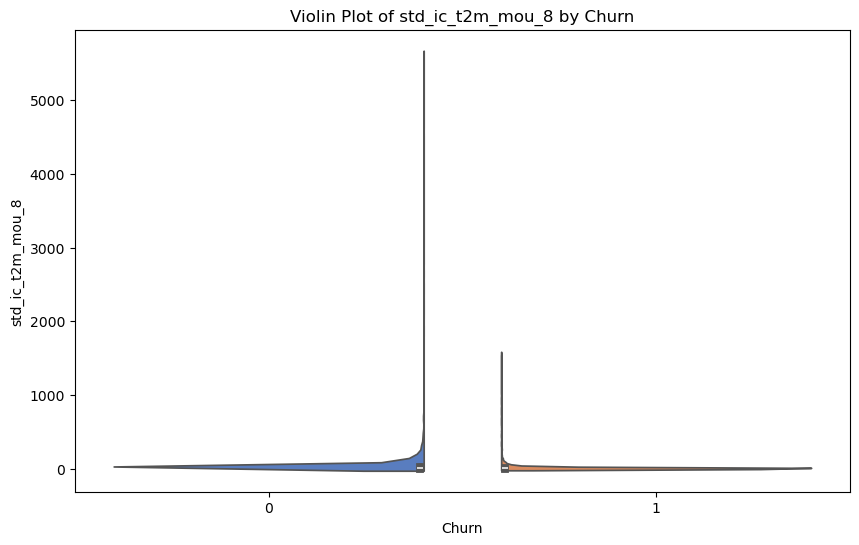

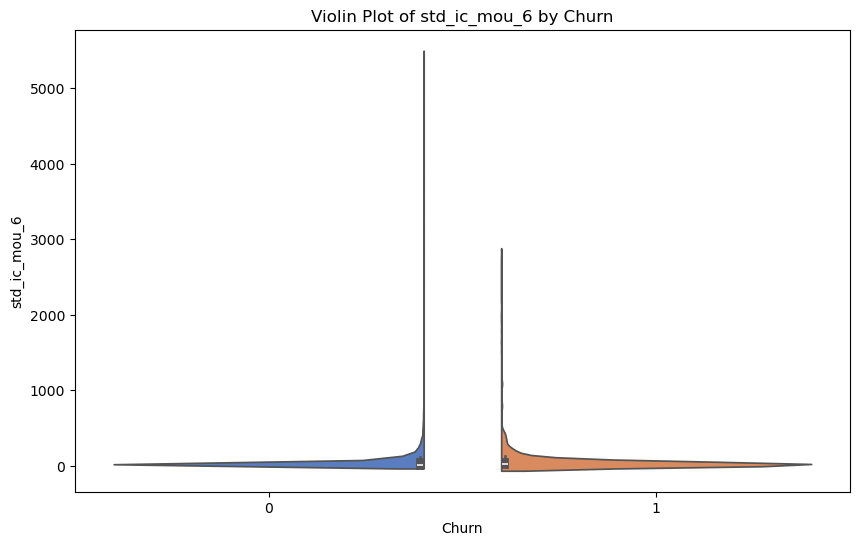

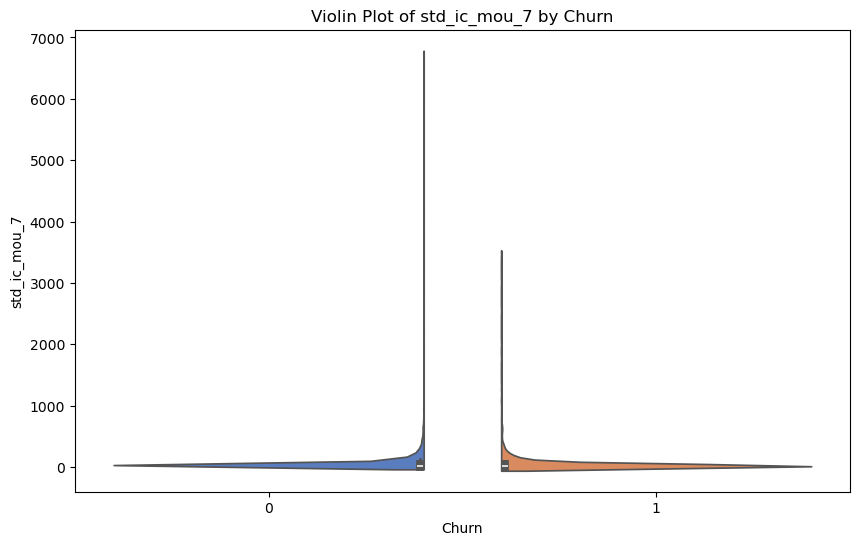

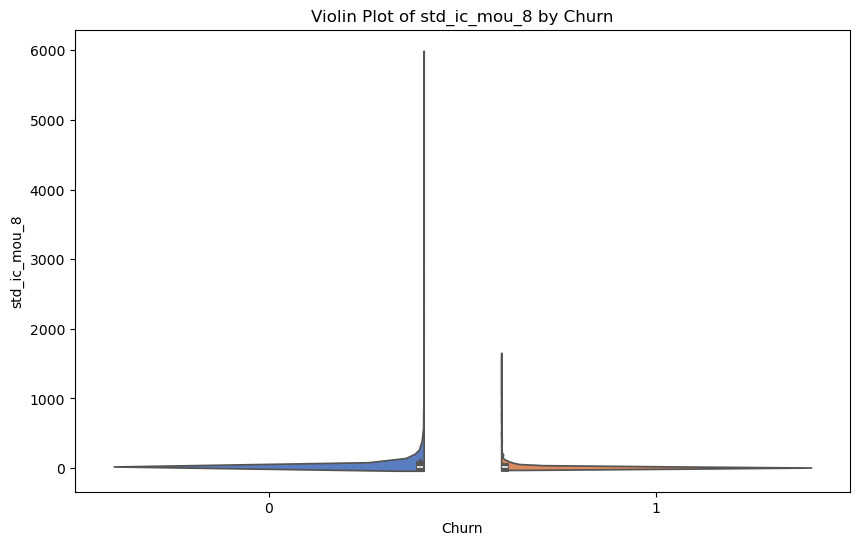

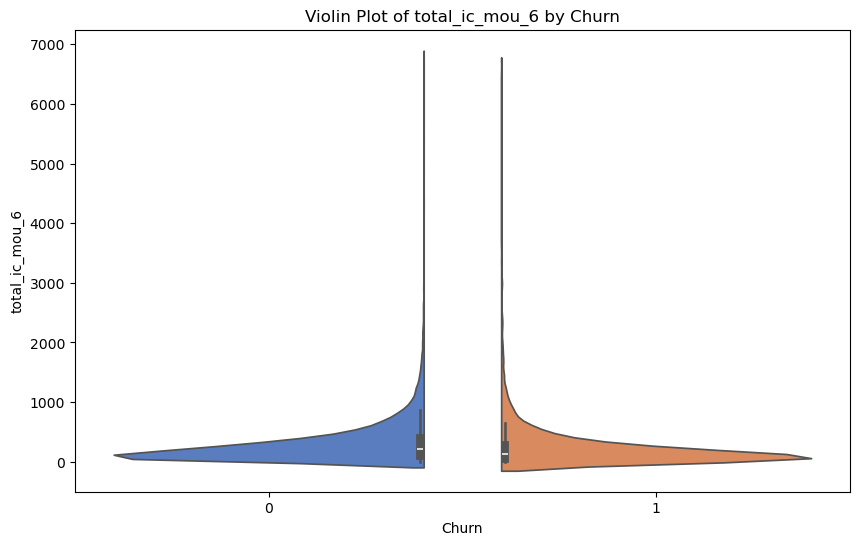

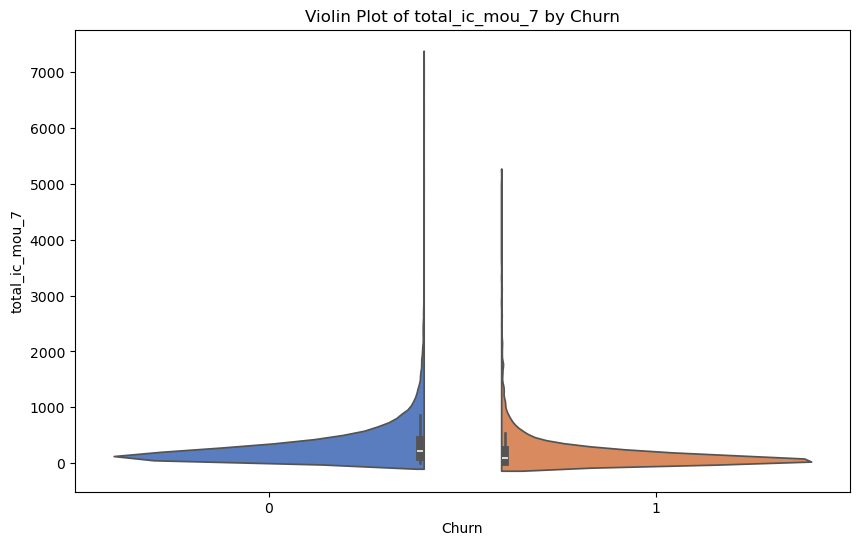

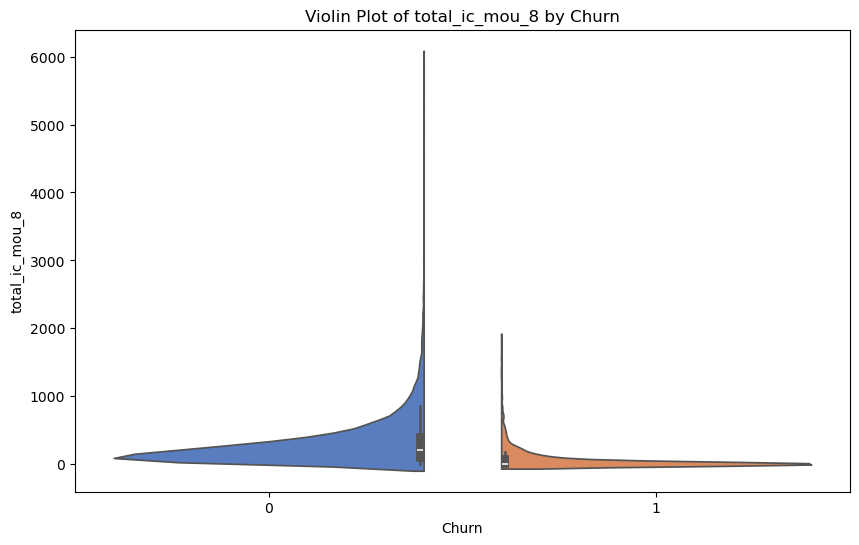

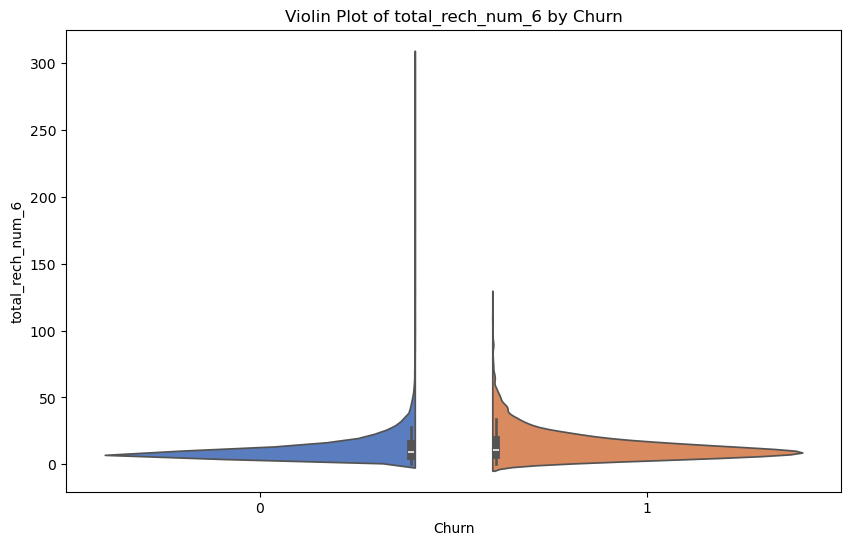

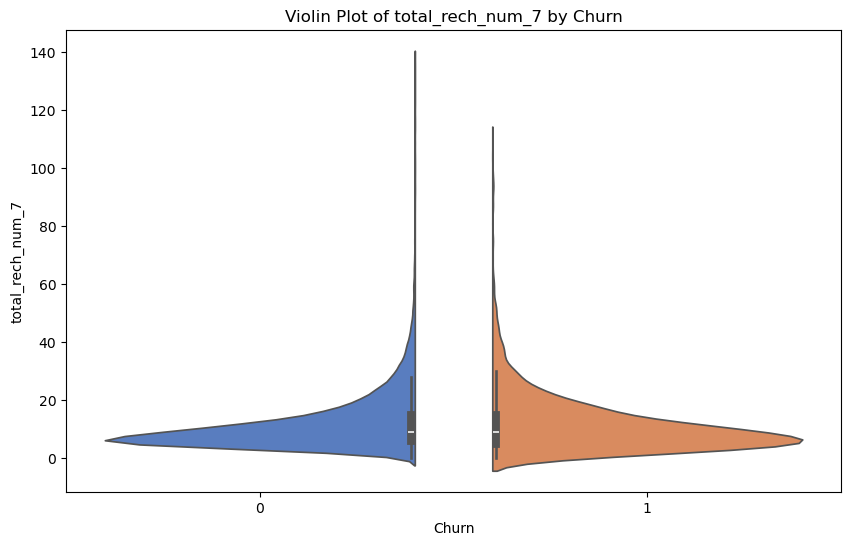

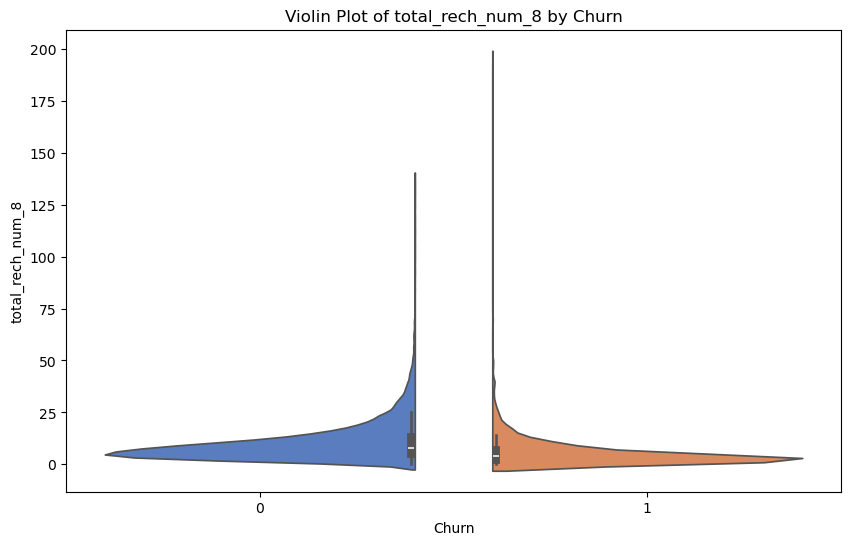

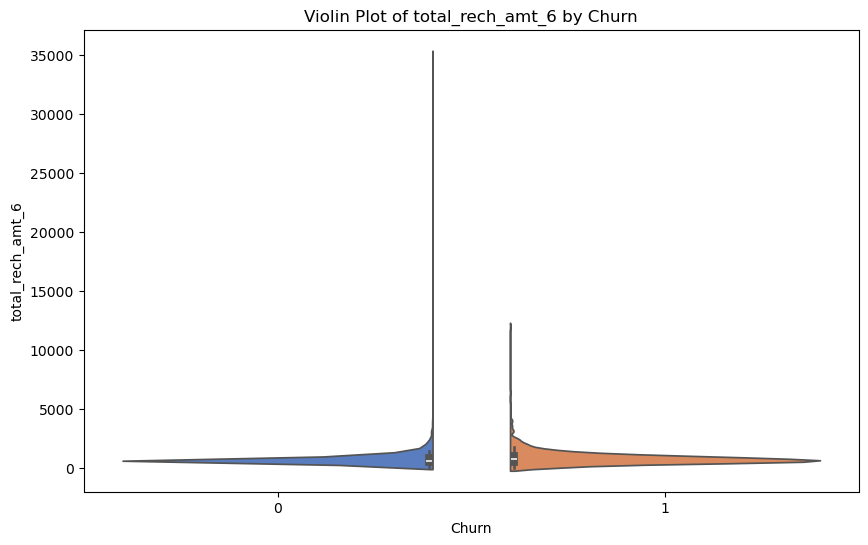

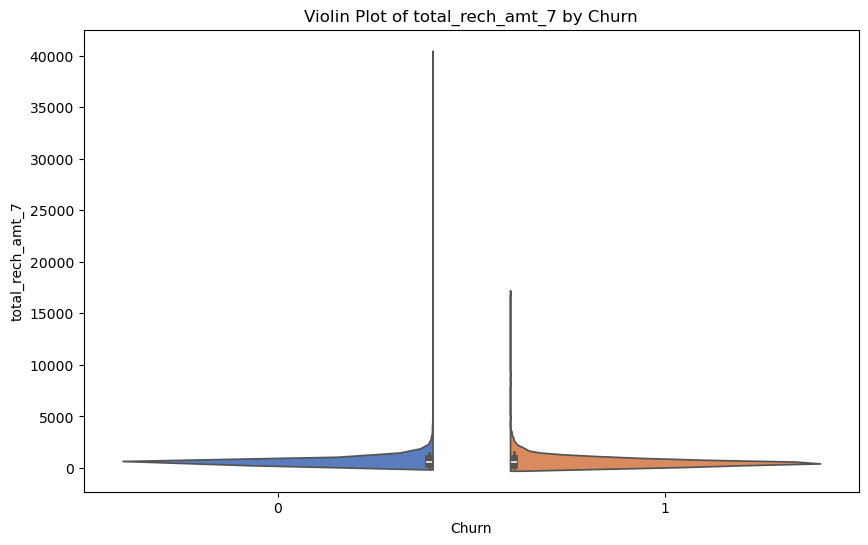

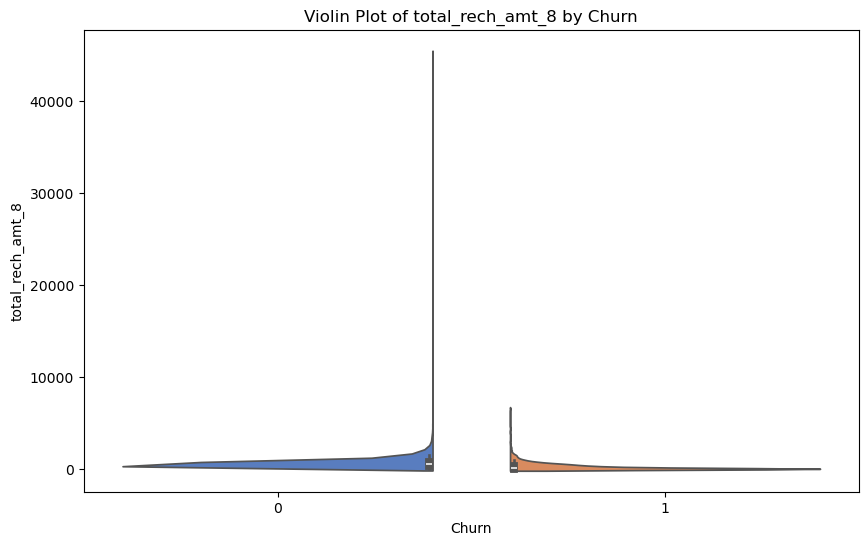

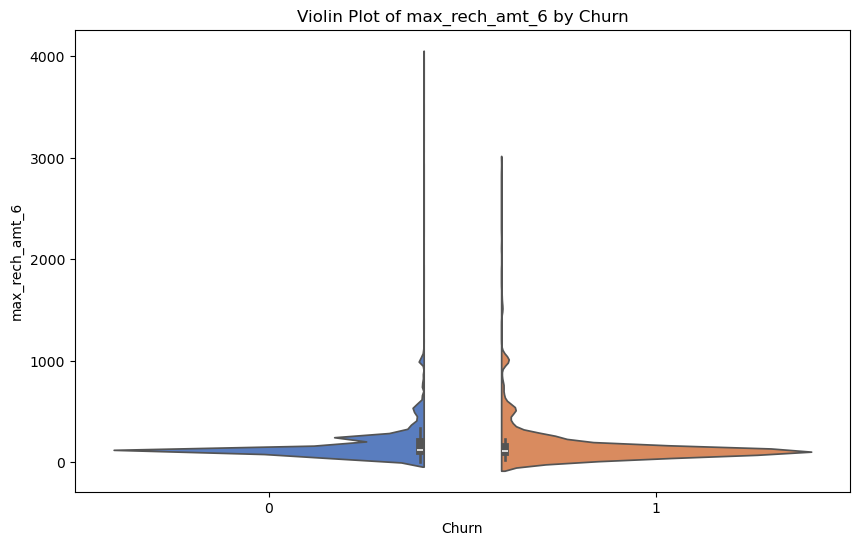

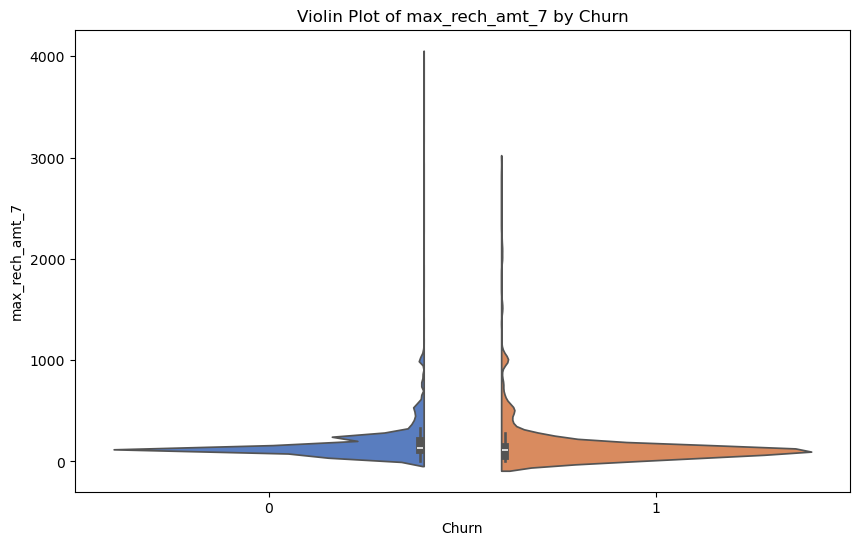

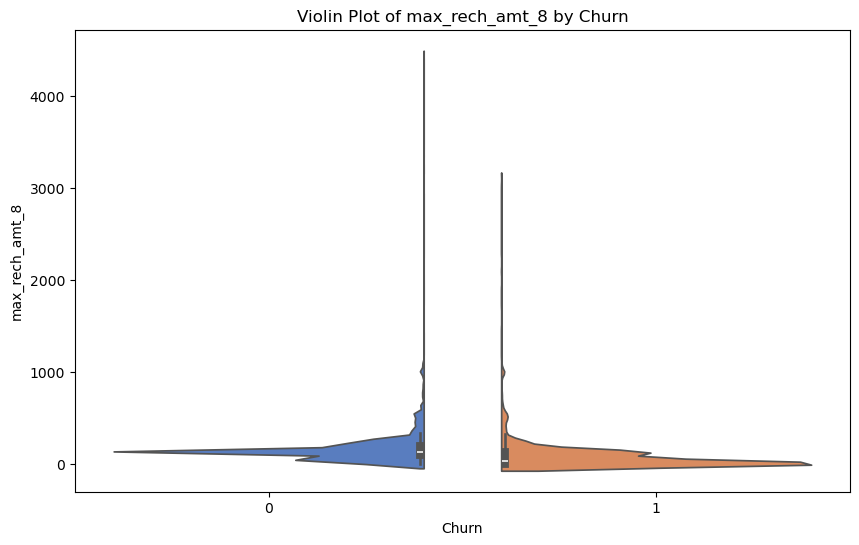

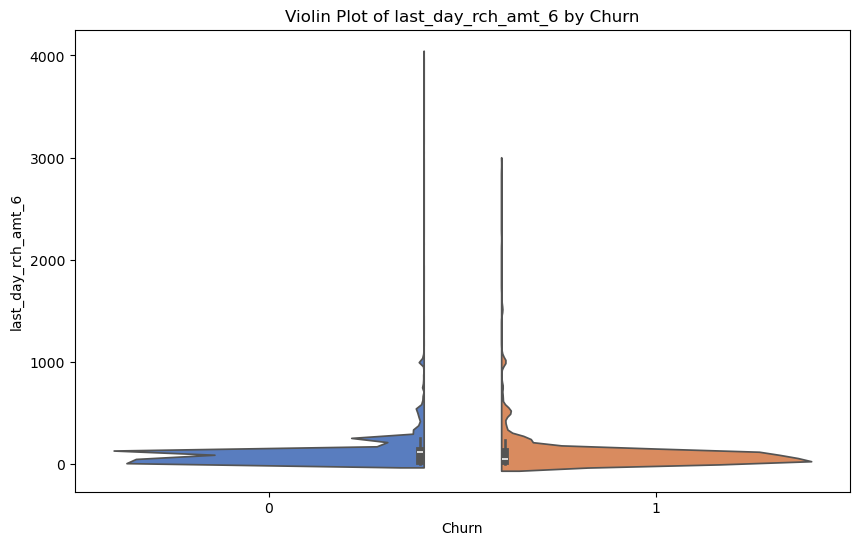

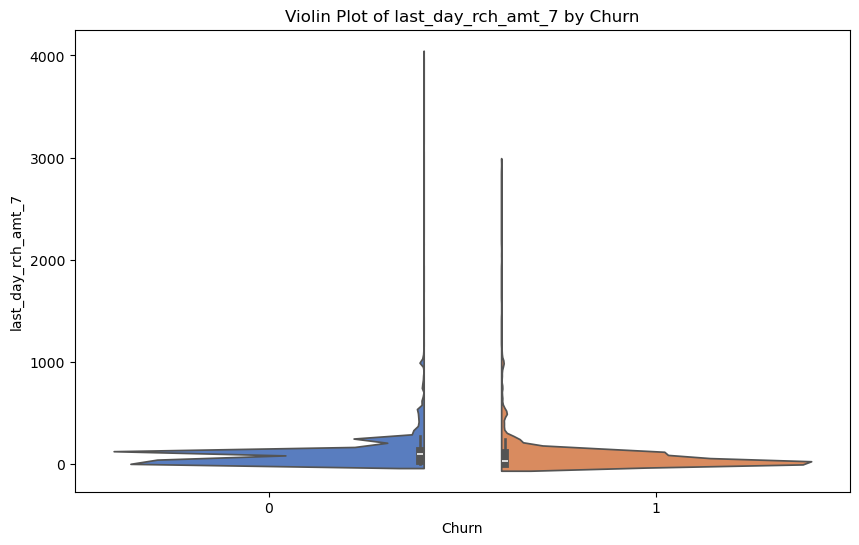

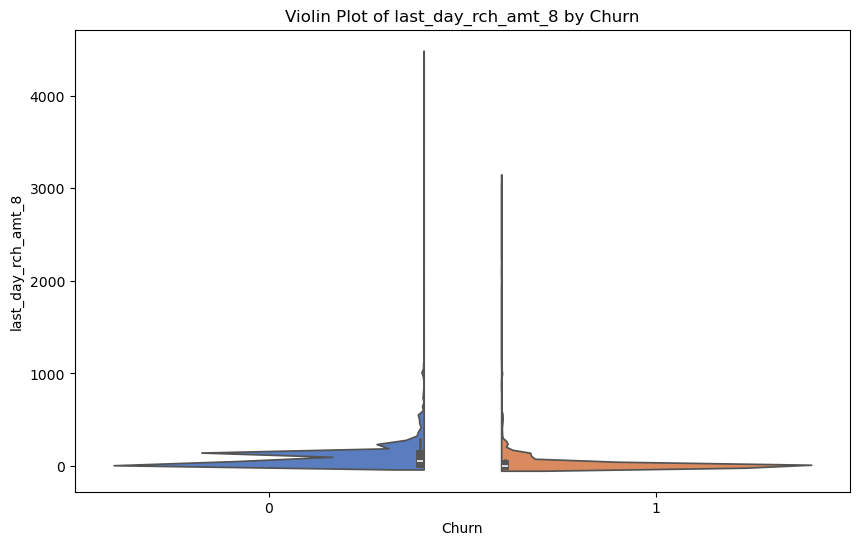

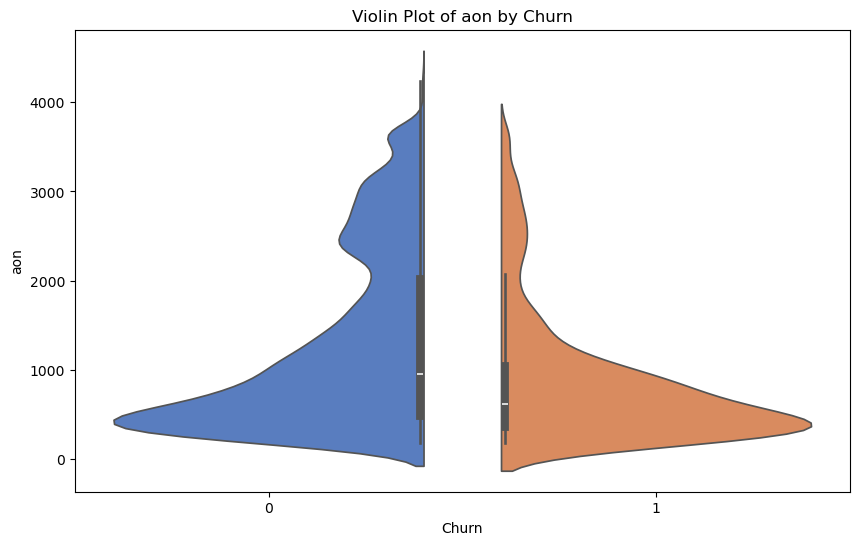

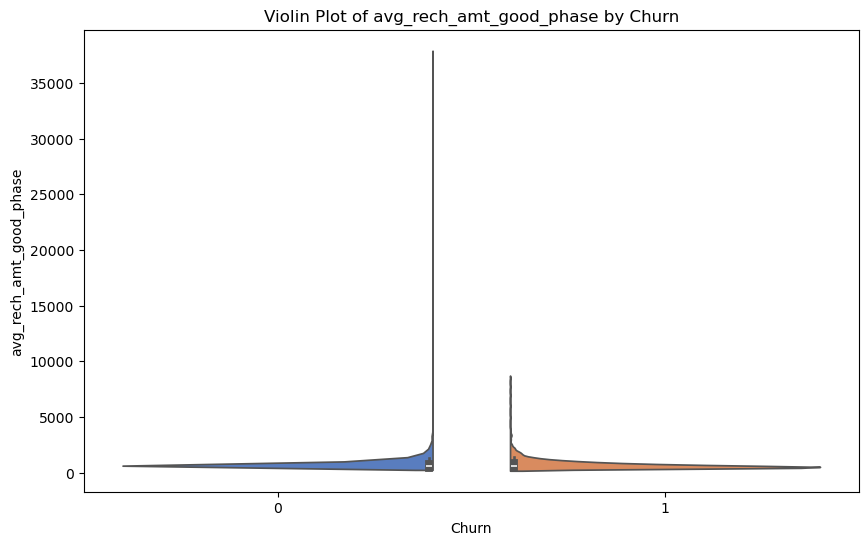

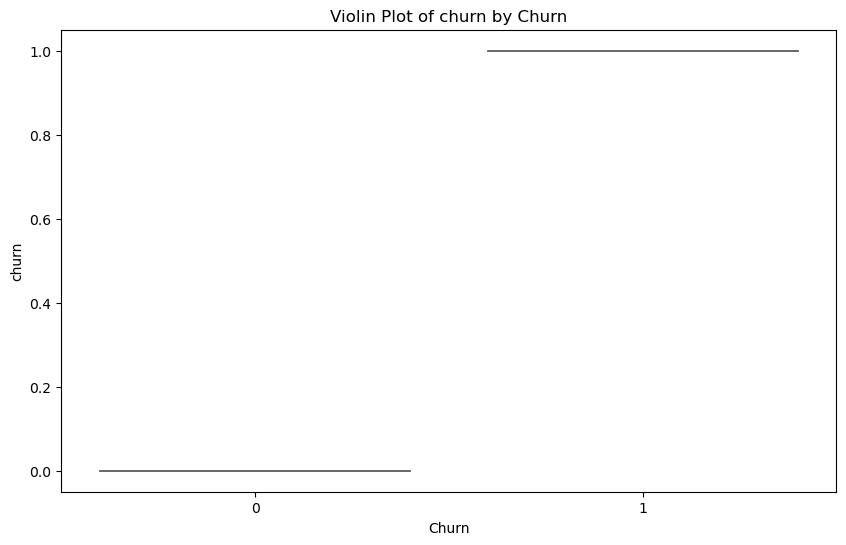

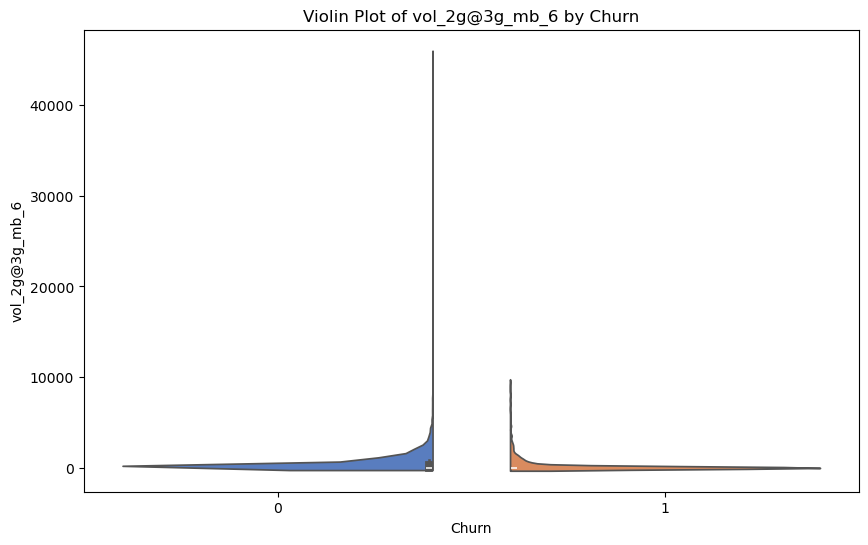

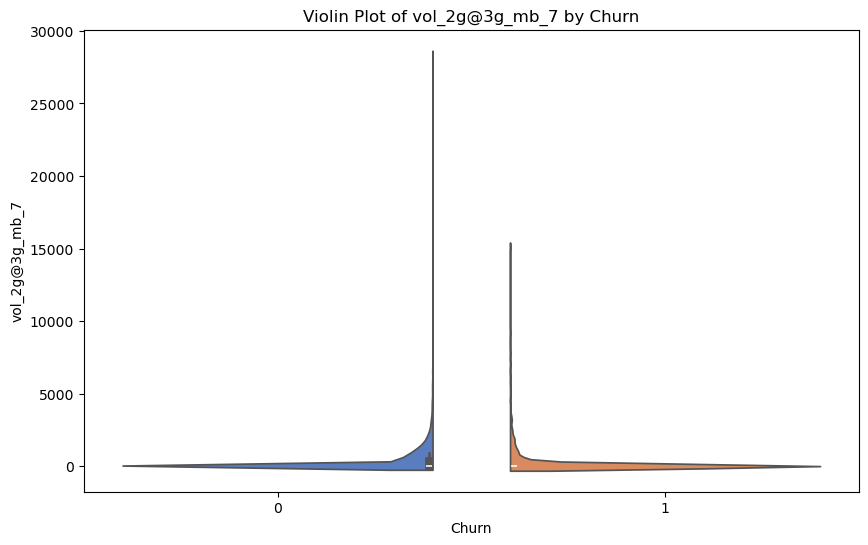

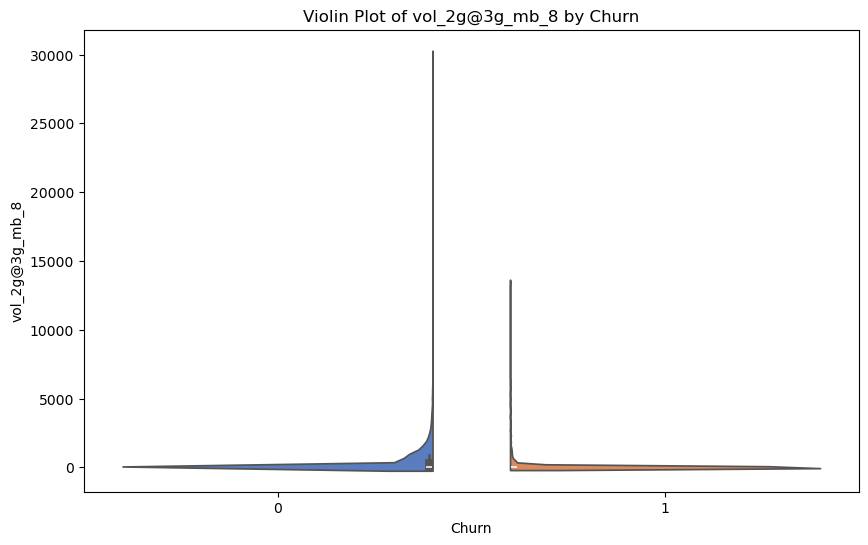

In [42]:
# Violin plots to visualize spread of numerical variables by churn
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='churn', y=col, data=high_value_customers, split=True, palette="muted")
    plt.title(f"Violin Plot of {col} by Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()


# PCA model

Predefined functions for further use

In [45]:

def accu_sensi_spec(df,Target_col,Target_prob_col):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i]= df[Target_prob_col].map(lambda x: 1 if x > i else 0)
    # y_train_pred_final.head()
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df[Target_col], df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

#FOR ROC CURVE
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


#precision_recall_curve
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

def draw_precision_recall(actual, probs):
    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(actual, probs)
    
    # Calculate AUC for the Precision-Recall curve
    pr_auc = auc(recall, precision)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, label='PR curve (AUC = %0.2f)' % pr_auc)
    #plt.plot([1, 0], [1, 0], 'k--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.show()

# Usage example:
# draw_precision_recall(actual=y_true, probs=y_pred_proba)


Applying logistic regression on the data on our Principal components

Churn Rate: 8.64%
Class distribution in training set:
churn
0    0.913586
1    0.086414
Name: proportion, dtype: float64

Class distribution in test set:
churn
0    0.913635
1    0.086365
Name: proportion, dtype: float64

Class distribution after SMOTE:
churn
0    0.5
1    0.5
Name: proportion, dtype: float64


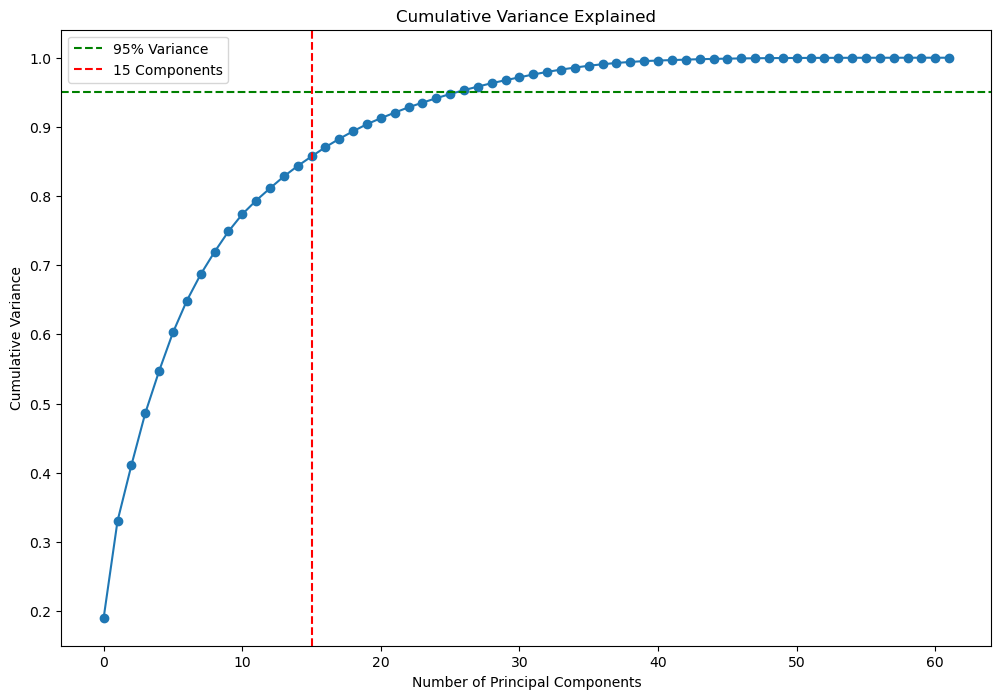


Shape of Train PCA: (41126, 15)
Shape of Test PCA: (7503, 15)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72      6855
           1       0.17      0.93      0.29       648

    accuracy                           0.60      7503
   macro avg       0.58      0.75      0.50      7503
weighted avg       0.92      0.60      0.68      7503


ROC-AUC Score: 0.87


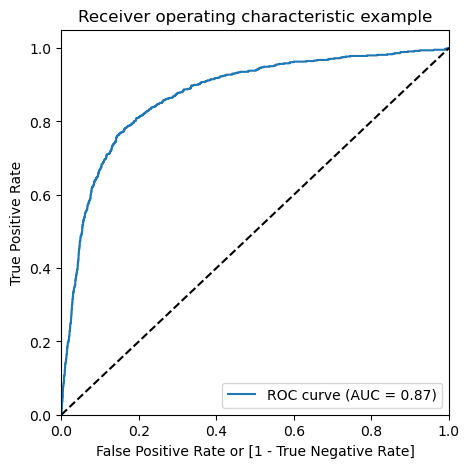

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# 1. Check churn rate
churn_rate = (sum(high_value_customers['churn']) / len(high_value_customers)) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# 2. Create Train and Test Sets
y = high_value_customers['churn']
X = high_value_customers.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=56
)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# 3. Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# 4. Standardize the Variables
scaler = StandardScaler()

# Standardize the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# 5. Perform PCA
pca = PCA(random_state=42)
pca.fit(X_train_resampled_scaled)

# Plot explained variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[12, 8])
plt.plot(var_cumu, marker="o")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% Variance")
plt.axvline(x=15, color="r", linestyle="--", label="15 Components")
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.legend()
plt.show()

# Apply PCA with 15 components
pca_final = IncrementalPCA(n_components=15)
df_train_pca = pca_final.fit_transform(X_train_resampled_scaled)
df_test_pca = pca_final.transform(X_test_scaled)

print("\nShape of Train PCA:", df_train_pca.shape)
print("Shape of Test PCA:", df_test_pca.shape)

# 6. Train Logistic Regression Model
learner_pca = LogisticRegression(class_weight="balanced", random_state=42)
model_pca = learner_pca.fit(df_train_pca, y_train_resampled)

# 7. Evaluate Model
pred_probs_test = model_pca.predict_proba(df_test_pca)[:, 1]
y_pred = (pred_probs_test > 0.3).astype(int)  # Adjust threshold to improve recall

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, pred_probs_test)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Call the evaluation functions
draw_roc(y_test, pred_probs_test)



Applying others LogisticRegression and RandomForestClassifier using GridSearchCV for best results

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Standardize the features
scaler = StandardScaler()

# Standardize the training data
X_train_resampled_scaled = scaler.fit_transform(df_train_pca)

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(df_test_pca)

# 2. Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled_scaled, y_train_resampled)
best_log_reg = grid_search.best_estimator_

# 3. Evaluate the best Logistic Regression model
pred_probs_test_best = best_log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (pred_probs_test_best > 0.3).astype(int)

print("\nBest Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_best))

roc_auc_best = roc_auc_score(y_test, pred_probs_test_best)
print(f"\nBest ROC-AUC Score: {roc_auc_best:.2f}")

# 4. Train and Evaluate Random Forest Classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_resampled_scaled, y_train_resampled)

# 5. Evaluate Random Forest model
pred_probs_test_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = (pred_probs_test_rf > 0.3).astype(int)

print("\nRandom Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, pred_probs_test_rf)
print(f"\nRandom Forest ROC-AUC Score: {roc_auc_rf:.2f}")



Best Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72      6855
           1       0.17      0.93      0.29       648

    accuracy                           0.60      7503
   macro avg       0.58      0.75      0.50      7503
weighted avg       0.92      0.60      0.68      7503


Best ROC-AUC Score: 0.87

Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      6855
           1       0.29      0.82      0.43       648

    accuracy                           0.82      7503
   macro avg       0.64      0.82      0.66      7503
weighted avg       0.92      0.82      0.85      7503


Random Forest ROC-AUC Score: 0.88


# Model for variable selections

Starting with simple logistic regression

In [52]:
# 2. Create Train and Test Sets
y = high_value_customers['churn']
X = high_value_customers.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=56
)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# 4. Standardize the Variables
scaler = StandardScaler()

# Standardize the training data
X_train_scaled = scaler.fit_transform(X_train)

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Class distribution in training set:
churn
0    0.913586
1    0.086414
Name: proportion, dtype: float64

Class distribution in test set:
churn
0    0.913635
1    0.086365
Name: proportion, dtype: float64


Applying RFE for feature selection

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd

# Ensure X_train_scaled is converted back to a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Initialize Logistic Regression
logreg = LogisticRegression()

# Initialize the RFE with the estimator (logreg) and the number of features to select (25)
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train_scaled_df, y_train)

# Print the feature rankings
feature_ranking = list(zip(X_train_scaled_df.columns, rfe.support_, rfe.ranking_))
print(feature_ranking)

# Select only the columns that are supported (selected by RFE)
selected_columns = X_train_scaled_df.columns[rfe.support_]

# Use only the selected columns
X_train_scaled_selected = X_train_scaled_df[selected_columns]
print(f"Selected Columns: {selected_columns.tolist()}")

# If needed, apply the same transformation to the test set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_selected = X_test_scaled_df[selected_columns]


[('arpu_6', False, 23), ('arpu_7', True, 1), ('arpu_8', False, 13), ('onnet_mou_6', True, 1), ('onnet_mou_7', False, 9), ('onnet_mou_8', True, 1), ('offnet_mou_6', True, 1), ('offnet_mou_7', True, 1), ('offnet_mou_8', False, 8), ('loc_og_t2t_mou_6', False, 32), ('loc_og_t2t_mou_7', False, 25), ('loc_og_t2t_mou_8', True, 1), ('loc_og_t2m_mou_6', False, 7), ('loc_og_t2m_mou_7', True, 1), ('loc_og_t2m_mou_8', True, 1), ('loc_og_mou_6', False, 6), ('loc_og_mou_7', False, 36), ('loc_og_mou_8', True, 1), ('std_og_t2m_mou_6', False, 21), ('std_og_t2m_mou_7', True, 1), ('std_og_t2m_mou_8', True, 1), ('std_og_mou_6', False, 5), ('std_og_mou_7', False, 33), ('std_og_mou_8', True, 1), ('total_og_mou_6', True, 1), ('total_og_mou_7', False, 10), ('total_og_mou_8', True, 1), ('loc_ic_t2t_mou_6', False, 3), ('loc_ic_t2t_mou_7', False, 4), ('loc_ic_t2t_mou_8', False, 24), ('loc_ic_t2m_mou_6', True, 1), ('loc_ic_t2m_mou_7', False, 34), ('loc_ic_t2m_mou_8', True, 1), ('loc_ic_mou_6', False, 2), ('loc_ic

Model 1

In [56]:
# Adding constant
X_train_sm=sm.add_constant(X_train_scaled_selected,has_constant='add')
X_test_sm=sm.add_constant(X_test_scaled_selected,has_constant='add')

model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
res1=model1.fit()
print(res1.summary(),'\n')

vif=pd.DataFrame()
vif['Feature']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22508
Model:                            GLM   Df Residuals:                    22482
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4209.4
Date:                Tue, 07 Jan 2025   Deviance:                       8418.7
Time:                        17:31:56   Pearson chi2:                 5.88e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1929
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8246      0

Model 2

In [58]:

X_train_sm2=X_train_sm.drop(["loc_og_t2m_mou_8","loc_ic_t2m_mou_6","loc_ic_mou_8"],axis=1)
X_test_sm2=X_test_sm.drop(["loc_og_t2m_mou_8","loc_ic_t2m_mou_6","loc_ic_mou_8"],axis=1)

model2=sm.GLM(np.array(y_train),X_train_sm2,family=sm.families.Binomial())
res2=model2.fit()
print(res2.summary(),'\n')

vif=pd.DataFrame()
vif['Feature']=X_train_sm2.columns
vif['VIF']=[variance_inflation_factor(X_train_sm2.values,i) for i in range(X_train_sm2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22508
Model:                            GLM   Df Residuals:                    22485
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4209.7
Date:                Tue, 07 Jan 2025   Deviance:                       8419.4
Time:                        17:31:59   Pearson chi2:                 5.94e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1929
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8249      0

Model 3

In [60]:

X_train_sm3=X_train_sm2.drop(["std_og_mou_8","total_og_mou_6"],axis=1)
X_test_sm3=X_test_sm2.drop(["std_og_mou_8","total_og_mou_6"],axis=1)

model3=sm.GLM(np.array(y_train),X_train_sm3,family=sm.families.Binomial())
res3=model3.fit()
print(res3.summary(),'\n')

vif=pd.DataFrame()
vif['Feature']=X_train_sm3.columns
vif['VIF']=[variance_inflation_factor(X_train_sm3.values,i) for i in range(X_train_sm3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22508
Model:                            GLM   Df Residuals:                    22487
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4295.9
Date:                Tue, 07 Jan 2025   Deviance:                       8591.8
Time:                        17:32:01   Pearson chi2:                 6.77e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1867
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9187      0

Model 4

In [62]:

X_train_sm4=X_train_sm3.drop(["total_og_mou_8","loc_og_t2t_mou_8","loc_og_mou_8"],axis=1)
X_test_sm4=X_test_sm3.drop(["total_og_mou_8","loc_og_t2t_mou_8","loc_og_mou_8"],axis=1)

model4=sm.GLM(np.array(y_train),X_train_sm4,family=sm.families.Binomial())
res4=model4.fit()
print(res4.summary(),'\n')

vif=pd.DataFrame()
vif['Feature']=X_train_sm4.columns
vif['VIF']=[variance_inflation_factor(X_train_sm4.values,i) for i in range(X_train_sm4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22508
Model:                            GLM   Df Residuals:                    22490
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4451.9
Date:                Tue, 07 Jan 2025   Deviance:                       8903.8
Time:                        17:32:03   Pearson chi2:                 2.43e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1753
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1081      0

Model 5

In [64]:

X_train_sm5=X_train_sm4.drop(["offnet_mou_7"],axis=1)
X_test_sm5=X_test_sm4.drop(["offnet_mou_7"],axis=1)

model5=sm.GLM(np.array(y_train),X_train_sm5,family=sm.families.Binomial())
res5=model5.fit()
print(res4.summary(),'\n')

vif=pd.DataFrame()
vif['Feature']=X_train_sm5.columns
vif['VIF']=[variance_inflation_factor(X_train_sm5.values,i) for i in range(X_train_sm5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22508
Model:                            GLM   Df Residuals:                    22490
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4451.9
Date:                Tue, 07 Jan 2025   Deviance:                       8903.8
Time:                        17:32:05   Pearson chi2:                 2.43e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1753
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1081      0

From all the models Model 3 gives us the best accuracy , so we will go with Model 3

In [66]:
# Getting the predicted values on the train set
y_train_pred=res3.predict(X_train_sm3)

y_train_pred = y_train_pred.values.reshape(-1) 

# Display the first few results
print(y_train_pred[:10])

[7.54350452e-02 6.62341415e-04 2.09770521e-02 9.42448140e-01
 1.13643440e-02 4.99207616e-03 4.35882902e-03 4.19415464e-01
 5.25490965e-03 1.30872744e-01]


In [67]:
#Creating dataframe y_train_pred_final
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})

y_train_pred_final.head()

churn  churn_Prob
0      0    0.075435
1      0    0.000662
2      0    0.020977
3      1    0.942448
4      0    0.011364

In [68]:
#Creating predicted column
y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

churn  churn_Prob  predicted
0      0    0.075435          0
1      0    0.000662          0
2      0    0.020977          0
3      1    0.942448          1
4      0    0.011364          0

In [69]:
# Print the accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)
print(f"Accuracy: {accuracy}")

# Print the classification report
classification_report = metrics.classification_report(y_train_pred_final.churn, y_train_pred_final.predicted)
print("Classification Report:\n", classification_report)

Accuracy: 0.9331348853740892
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     20563
           1       0.74      0.35      0.47      1945

    accuracy                           0.93     22508
   macro avg       0.84      0.67      0.72     22508
weighted avg       0.92      0.93      0.92     22508



     prob  accuracy     sensi     speci
0.0   0.0  0.086414  1.000000  0.000000
0.1   0.1  0.842856  0.807198  0.846229
0.2   0.2  0.913231  0.686889  0.934640
0.3   0.3  0.929403  0.566067  0.963770
0.4   0.4  0.931935  0.426735  0.979721
0.5   0.5  0.933135  0.347558  0.988523
0.6   0.6  0.931447  0.291517  0.991976
0.7   0.7  0.926160  0.190746  0.995720
0.8   0.8  0.918340  0.074036  0.998201
0.9   0.9  0.914786  0.022622  0.999173


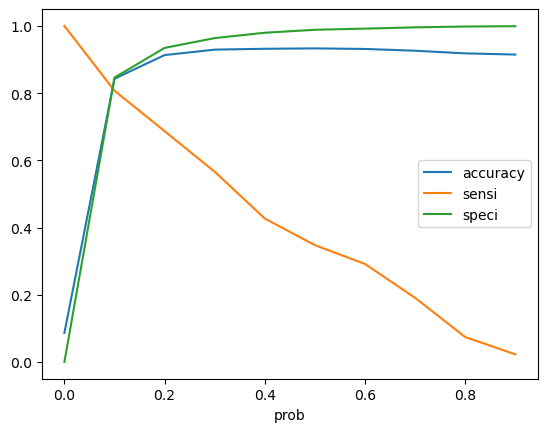

In [70]:
#drawing accu_sensi_spec graph to get best threshold
accu_sensi_spec(y_train_pred_final,"churn","churn_Prob")

In [71]:
#After accu_sensi_spec again creating final predicted column
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

churn  churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.075435          0    1    0    0    0    0    0    0    0    0   
1      0    0.000662          0    1    0    0    0    0    0    0    0    0   
2      0    0.020977          0    1    0    0    0    0    0    0    0    0   
3      1    0.942448          1    1    1    1    1    1    1    1    1    1   
4      0    0.011364          0    1    0    0    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                0  
2    0                0  
3    1                1  
4    0                0

In [72]:
# Print the accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)
print(f"Accuracy: {accuracy}")

# Print the classification report
classification_report = metrics.classification_report(y_train_pred_final.churn, y_train_pred_final.final_predicted)
print("Classification Report:\n", classification_report)

Accuracy: 0.8428558734672117
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     20563
           1       0.33      0.81      0.47      1945

    accuracy                           0.84     22508
   macro avg       0.66      0.83      0.69     22508
weighted avg       0.92      0.84      0.87     22508



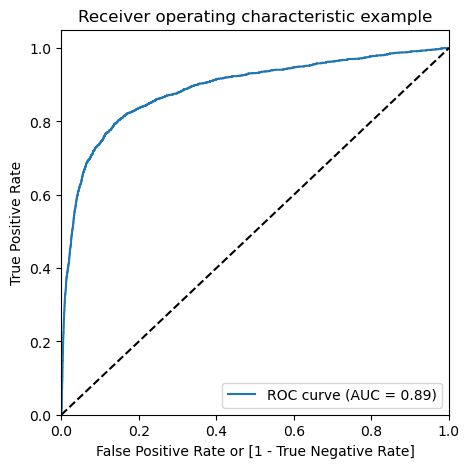

In [73]:

draw_roc(y_train_pred_final.churn,y_train_pred_final.churn_Prob)

Now performing on Test data

In [75]:
y_test_pred=res3.predict(X_test_sm3)
y_test_pred=y_test_pred.values.reshape(-1)
y_test_pred

array([0.0345191 , 0.03787701, 0.33534362, ..., 0.00076023, 0.02899002,
       0.22930159])

In [76]:
#Creating Dataframe y_test_pred_final
y_test_pred_final=pd.DataFrame({'churn':y_test.values, 'churn_Prob':y_test_pred})
y_test_pred_final.head()

churn  churn_Prob
0      0    0.034519
1      0    0.037877
2      1    0.335344
3      0    0.030219
4      0    0.057513

In [77]:
y_test_pred_final['final_predicted']=y_test_pred_final.churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_final.head()

churn  churn_Prob  final_predicted
0      0    0.034519                0
1      0    0.037877                0
2      1    0.335344                1
3      0    0.030219                0
4      0    0.057513                0

In [78]:
# Print the classification report
classification_report = metrics.classification_report(y_test_pred_final.churn, y_test_pred_final.final_predicted)
print("Classification Report:\n", classification_report)


# Print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted)
print("Confusion Matrix:\n", confusion_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      6855
           1       0.33      0.82      0.47       648

    accuracy                           0.84      7503
   macro avg       0.65      0.83      0.69      7503
weighted avg       0.92      0.84      0.87      7503

Confusion Matrix:
 [[5763 1092]
 [ 118  530]]


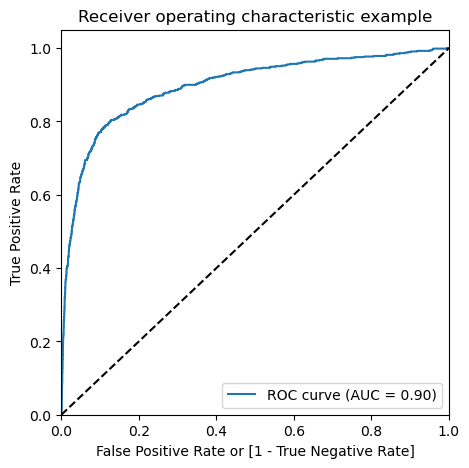

In [79]:
draw_roc(y_test_pred_final.churn,y_test_pred_final.churn_Prob)

Identifying important predictors

Feature Importance (Top Features):
                           Feature  Coefficient  Importance
total_og_mou_8      total_og_mou_8    -3.533337    3.533337
total_ic_mou_8      total_ic_mou_8    -3.244687    3.244687
onnet_mou_8            onnet_mou_8     1.984584    1.984584
std_og_t2m_mou_8  std_og_t2m_mou_8     1.741951    1.741951
loc_og_mou_8          loc_og_mou_8     1.726107    1.726107
loc_og_t2t_mou_8  loc_og_t2t_mou_8    -1.323217    1.323217
std_ic_t2m_mou_8  std_ic_t2m_mou_8     0.876980    0.876980
offnet_mou_7          offnet_mou_7     0.826501    0.826501
loc_ic_t2m_mou_8  loc_ic_t2m_mou_8     0.821558    0.821558
total_ic_mou_7      total_ic_mou_7     0.750565    0.750565


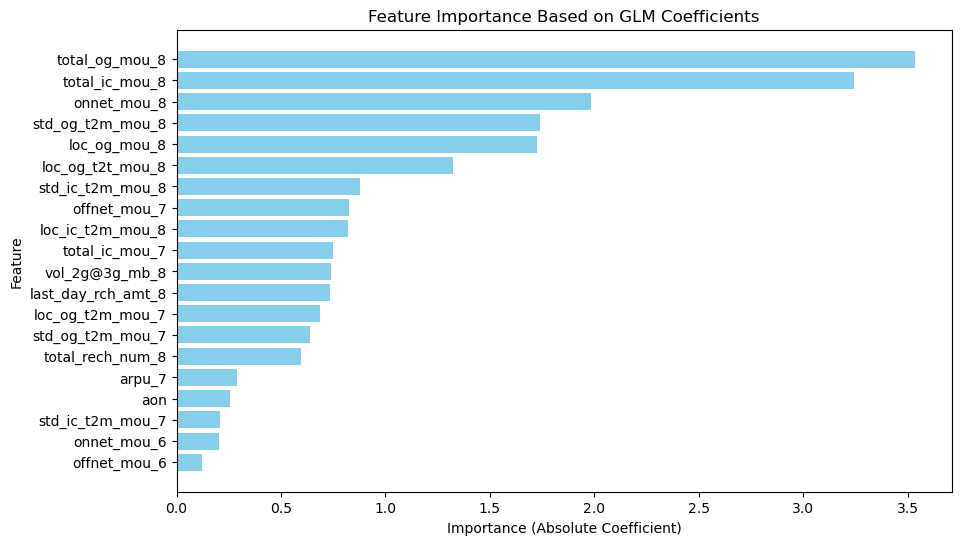

In [81]:
import pandas as pd
import numpy as np

# Extract the coefficients and feature names
coefficients = res3.params  # Coefficients from the fitted GLM model
features = X_train_sm3.columns  # Feature names

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Exclude the 'const' feature
feature_importance = feature_importance[feature_importance['Feature'] != 'const']

# Add the absolute value of coefficients for ranking
feature_importance['Importance'] = feature_importance['Coefficient'].abs()

# Sort by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top features
print("Feature Importance (Top Features):")
print(feature_importance.head(10))

# Plot the feature importance (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance Based on GLM Coefficients')
plt.gca().invert_yaxis()
plt.show()


### Feature-wise Explanation

1) total_og_mou_8 (-3.533337):
Negative coefficient: Higher outgoing minutes reduce churn likelihood.
Customers making frequent outgoing calls are likely more engaged and satisfied.

2) total_ic_mou_8 (-3.244687):
Negative coefficient: Higher incoming minutes reduce churn.
Receiving frequent calls indicates strong personal or professional connections, reducing churn.

3) onnet_mou_8 (1.984584):
Positive coefficient: High on-net minutes (same network) slightly increase churn.
These users may find better deals elsewhere or feel limited by network-restricted plans.

4) std_og_t2m_mou_8 (1.741951):
Positive coefficient: Higher STD (outgoing to mobile) calls increase churn risk.
Long-distance callers may face high costs, prompting them to switch.

5) loc_og_mou_8 (1.726107):
Positive coefficient: High local outgoing calls slightly increase churn.
Similar to on-net, dissatisfaction with call rates or plan options may cause churn.

6) loc_og_t2t_mou_8 (-1.323217):
Negative coefficient: Higher local on-net calls reduce churn.
Indicates satisfaction with calling within the same network.

7) std_ic_t2m_mou_8 (0.876980):
Positive coefficient: More STD incoming calls increase churn risk.
Could signal dissatisfaction with long-distance calling costs or quality.

8) offnet_mou_7 (0.826501):
Positive coefficient: High off-net calls (to other networks) increase churn.
Suggests dissatisfaction with inter-network rates or network quality.

9) loc_ic_t2m_mou_8 (0.821558):
Positive coefficient: Higher local incoming calls from mobiles slightly increase churn.
Could be linked to dissatisfaction with local call rates or service issues.

10) total_ic_mou_7 (0.750565):
Positive coefficient: More total incoming calls in the previous month slightly increase churn.
Indicates dissatisfaction with service despite heavy incoming usage.


### Strategies to Manage Customer Churn

1) Encourage Outgoing Usage:
    - Offer discounts or bonus minutes on outgoing calls, especially local and STD calls, to keep users engaged.


2) Focus on High Incoming Users:
    - Provide attractive plans to users with high incoming calls to convert them into active outgoing users.


3) Optimize On-Net and Off-Net Plans:
    - Address dissatisfaction with on-net and off-net call rates by offering competitive and flexible plans.

4) Target Long-Distance Callers:
    - Introduce affordable STD and inter-network calling plans to retain customers making high STD calls.

5) Personalized Offers:
    - Use analytics to identify customers with decreasing engagement and provide personalized retention offers.

6) Improve Network Quality:
    - Ensure superior call quality for both local and STD calls, reducing dissatisfaction and encouraging loyalty.

7) Reward Loyal Customers:
    -  Offer loyalty rewards, exclusive discounts, or early access to better plans for long-term users.

By addressing cost concerns, improving service quality, and engaging users, churn rates can be reduced effectively.